In [1]:
from sage.interfaces.gap import  get_gap_memory_pool_size, set_gap_memory_pool_size
set_gap_memory_pool_size(24364842180)



W = WeylGroup("B9", prefix="s")
[s1,s2,s3,s4,s5,s6,s7,s8,s9] = W.simple_reflections()

##################################################################################

n = rank(W)
w0 = W.long_element()
e = W(1)


####### Kazhdan-Lusztig polynomials ##########################

# A faster implementation of KL-polynomials (using the optional package Coxeter 3) is given by this
# Fokko Ducloux’s Coxeter3 C++ library.

# Had to install it: I just typed "sage -i coxeter3" in the terminal.

# It seems that one can direcly coerce from WeylGroup to CoxeterGroup and vice versa.
# I will therefore use CoxeterGroup to calculate KL-polynomials, but for all other Bruhat business I will use WeylGroup.

R.<q> = LaurentPolynomialRing(QQ)

KL = KazhdanLusztigPolynomial(W,q)  # KL-polynomials implemented in standard Sage way
# http://doc.sagemath.org/html/en/reference/combinat/sage/combinat/kazhdan_lusztig.html


CoxeterPackage = CoxeterGroup(W, implementation="coxeter3")

def KLP(x,y):
    '''Returns the KL-polynomial, implemented in "Coxeter3" package by Fokko du Cloux.
    http://math.univ-lyon1.fr/~ducloux/coxeter/coxeter3/english/coxeter3_e.html'''
    
    if x not in W:
        x = convert_from_123(x)
    if y not in W:
        y = convert_from_123(y)
    
    return CoxeterPackage.kazhdan_lusztig_polynomial(CoxeterPackage(x), CoxeterPackage(y))
    # If "coxeter3" is not installed, remove the line 'CoxeterPackage = CoxeterGroup(W, implementation="coxeter3")'
    # and in this function return KL.P(x,y)

#Point:
#    - standard Sage way: KL.P(x,y)
#    - faster way: KLP(x,y) 


def mu(w,x):
    '''Returns the KL mu-function with arguments w,x.
    By Humphrey's BGG book p. 175 and p. 169, for w<x we have:
    mu(x,w) = mu(w0*w,w0*x),
    mu(w,x) = dim Exit^1 (L_w,L_x) = dim Exit^1(L_x,L_w) = dim Exit^1(Delta_x,L_w).'''

    if w not in W:
        w = convert_from_123(w)
    if x not in W:
        x = convert_from_123(x)
        
    if w.bruhat_le(x):
        poly_dict = KLP(w,x).dict()       
        j = (x.length()-w.length()-1)/2 
        if j not in poly_dict.keys():
            return 0
        return poly_dict[j]

    return 0


def convert_to_123(w):
    '''Converts an element from W to the "123" string notation.
    Does not work with coefficients, as "convert_to_123_long".'''
    
    if w == W(1):
        return "e"
    
    return str(w).replace("s","").replace("*","")


def convert_from_123(string):
    '''Converts one element from W in the "123" string notation to the usual "s1*s2*s3" notation.'''
    
    if type(string)== Integer:
        string = str(string)
        
    if string == "e":
        return W(1)
    
    string = "*".join([char for char in string])
    
    for i in range(1,n+1):
        string = string.replace(str(i),"s%s"%i)
    
    return eval(string)


def DR(w):
    '''Returns the set of simple right descents of w.'''
    
    return {W.simple_reflections()[i] for i in w.descents()}


def DL(w):
    '''Returns the set of simple left   descents of w.'''
        
    return DR(w.inverse())


def AL(w):
    '''Returns the set of simple left ascends of w.'''
    
    DescLe = list(DL(w))
    AscLe = [s for s in W.simple_reflections() if s not in DescLe]
    return set(AscLe)


def AR(w):
    '''Returns the set of simple right ascends of w.'''
    
    DescRi = list(DR(w))
    AscRi = [s for s in W.simple_reflections() if s not in DescRi]
    return set(AscRi)



# W_poset = W.bruhat_poset()

def W_subposet(L):
    '''This is equivalent to W.bruhat_poset().subposet(),
    but without calculating the full W.bruhat_poset().'''
    
    def br_le(x,y):
        return x.bruhat_le(y)    
    return Poset((L,br_le))




def join(S):
    SS = [convert_from_123(a) for a in S if a not in W] + [a for a in S if a in W]
    
    U = set(W.bruhat_interval(SS[0],w0))
    for a in SS[1:]:
        U = U.intersection(set(W.bruhat_interval(a,w0)))
        
    minU = (W_poset.subposet(list(U))).minimal_elements()
    
    if len(minU)==1:
        j = minU[0]
        return eval(convert_to_123(str(j)))
    else:
        return minU

def JM(w):
    if w not in W:
        w = convert_from_123(w)
    result = W_poset.subposet([x for x in join_irreducibles if x.bruhat_le(w) ]).maximal_elements()
    return [convert_from_123(convert_to_123(x)) for x in result]

def BM(w):
    if w not in W:
        w = convert_from_123(w)
    return W_poset.subposet([x for x in bigrassmannians if x.bruhat_le(w) ]).maximal_elements()

def JM2(w):
    if w not in W:
        w = convert_from_123(w)
    DLw = DL(w)
    DRw = DR(w)
    result = []
    for x in JM(w):
        x = convert_from_123(convert_to_123(x))
        if list(DL(x))[0] in DLw and list(DR(x))[0] in DRw:
            result.append(x)
    return result









In [40]:

######################## B9 ########################

#sum_J KL = 489

#bigrassmannians: 615

bigrassmannians = [s9, s8, s7, s6, s5, s4, s3, s2, s1, s9*s8, s8*s9, s8*s7, s7*s8, s7*s6, s6*s7, s6*s5, s5*s6, s5*s4, s4*s5, s4*s3, s3*s4, s3*s2, s2*s3, s2*s1, s1*s2, s9*s8*s9, s9*s8*s7, s8*s9*s8, s8*s7*s6, s7*s8*s9, s7*s6*s5, s6*s7*s8, s6*s5*s4, s5*s6*s7, s5*s4*s3, s4*s5*s6, s4*s3*s2, s3*s4*s5, s3*s2*s1, s2*s3*s4, s1*s2*s3, s9*s8*s7*s6, s8*s9*s7*s8, s8*s9*s8*s7, s8*s7*s6*s5, s7*s8*s9*s8, s7*s8*s6*s7, s7*s6*s5*s4, s6*s7*s8*s9, s6*s7*s5*s6, s6*s5*s4*s3, s5*s6*s7*s8, s5*s6*s4*s5, s5*s4*s3*s2, s4*s5*s6*s7, s4*s5*s3*s4, s4*s3*s2*s1, s3*s4*s5*s6, s3*s4*s2*s3, s2*s3*s4*s5, s2*s3*s1*s2, s1*s2*s3*s4, s9*s8*s9*s7*s8, s9*s8*s7*s6*s5, s8*s9*s7*s8*s9, s8*s9*s8*s7*s6, s8*s7*s6*s5*s4, s7*s8*s9*s8*s7, s7*s6*s5*s4*s3, s6*s7*s8*s9*s8, s6*s5*s4*s3*s2, s5*s6*s7*s8*s9, s5*s4*s3*s2*s1, s4*s5*s6*s7*s8, s3*s4*s5*s6*s7, s2*s3*s4*s5*s6, s1*s2*s3*s4*s5, s9*s8*s9*s7*s8*s9, s9*s8*s7*s6*s5*s4, s8*s9*s7*s8*s6*s7, s8*s9*s8*s7*s6*s5, s8*s7*s6*s5*s4*s3, s7*s8*s9*s6*s7*s8, s7*s8*s9*s8*s6*s7, s7*s8*s9*s8*s7*s6, s7*s8*s6*s7*s5*s6, s7*s6*s5*s4*s3*s2, s6*s7*s8*s9*s8*s7, s6*s7*s8*s5*s6*s7, s6*s7*s5*s6*s4*s5, s6*s5*s4*s3*s2*s1, s5*s6*s7*s8*s9*s8, s5*s6*s7*s4*s5*s6, s5*s6*s4*s5*s3*s4, s4*s5*s6*s7*s8*s9, s4*s5*s6*s3*s4*s5, s4*s5*s3*s4*s2*s3, s3*s4*s5*s6*s7*s8, s3*s4*s5*s2*s3*s4, s3*s4*s2*s3*s1*s2, s2*s3*s4*s5*s6*s7, s2*s3*s4*s1*s2*s3, s1*s2*s3*s4*s5*s6, s9*s8*s9*s7*s8*s6*s7, s9*s8*s7*s6*s5*s4*s3, s8*s9*s7*s8*s9*s7*s8, s8*s9*s8*s7*s6*s5*s4, s8*s7*s6*s5*s4*s3*s2, s7*s8*s9*s6*s7*s8*s9, s7*s8*s9*s8*s7*s6*s5, s7*s6*s5*s4*s3*s2*s1, s6*s7*s8*s9*s8*s7*s6, s5*s6*s7*s8*s9*s8*s7, s4*s5*s6*s7*s8*s9*s8, s3*s4*s5*s6*s7*s8*s9, s2*s3*s4*s5*s6*s7*s8, s1*s2*s3*s4*s5*s6*s7, s9*s8*s7*s6*s5*s4*s3*s2, s8*s9*s7*s8*s9*s6*s7*s8, s8*s9*s7*s8*s6*s7*s5*s6, s8*s9*s8*s7*s6*s5*s4*s3, s8*s7*s6*s5*s4*s3*s2*s1, s7*s8*s9*s8*s6*s7*s5*s6, s7*s8*s6*s7*s5*s6*s4*s5, s7*s8*s9*s8*s7*s6*s5*s4, s6*s7*s8*s9*s5*s6*s7*s8, s6*s7*s8*s9*s8*s5*s6*s7, s6*s7*s8*s9*s8*s7*s5*s6, s6*s7*s8*s9*s8*s7*s6*s5, s6*s7*s5*s6*s4*s5*s3*s4, s5*s6*s7*s8*s4*s5*s6*s7, s5*s6*s7*s8*s9*s8*s7*s6, s5*s6*s4*s5*s3*s4*s2*s3, s4*s5*s6*s7*s8*s9*s8*s7, s4*s5*s6*s7*s3*s4*s5*s6, s4*s5*s3*s4*s2*s3*s1*s2, s3*s4*s5*s6*s7*s8*s9*s8, s3*s4*s5*s6*s2*s3*s4*s5, s2*s3*s4*s5*s6*s7*s8*s9, s2*s3*s4*s5*s1*s2*s3*s4, s1*s2*s3*s4*s5*s6*s7*s8, s9*s8*s9*s7*s8*s9*s6*s7*s8, s9*s8*s9*s7*s8*s6*s7*s5*s6, s9*s8*s7*s6*s5*s4*s3*s2*s1, s8*s9*s7*s8*s9*s6*s7*s8*s9, s8*s9*s7*s8*s9*s7*s8*s6*s7, s8*s9*s8*s7*s6*s5*s4*s3*s2, s7*s8*s9*s6*s7*s8*s9*s7*s8, s7*s8*s9*s6*s7*s8*s5*s6*s7, s7*s8*s9*s8*s7*s6*s5*s4*s3, s6*s7*s8*s9*s5*s6*s7*s8*s9, s6*s7*s8*s5*s6*s7*s4*s5*s6, s6*s7*s8*s9*s8*s7*s6*s5*s4, s5*s6*s7*s8*s9*s8*s7*s6*s5, s5*s6*s7*s4*s5*s6*s3*s4*s5, s4*s5*s6*s7*s8*s9*s8*s7*s6, s4*s5*s6*s3*s4*s5*s2*s3*s4, s3*s4*s5*s6*s7*s8*s9*s8*s7, s3*s4*s5*s2*s3*s4*s1*s2*s3, s2*s3*s4*s5*s6*s7*s8*s9*s8, s1*s2*s3*s4*s5*s6*s7*s8*s9, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9, s8*s9*s7*s8*s6*s7*s5*s6*s4*s5, s8*s9*s8*s7*s6*s5*s4*s3*s2*s1, s7*s8*s9*s8*s6*s7*s5*s6*s4*s5, s7*s8*s6*s7*s5*s6*s4*s5*s3*s4, s7*s8*s9*s8*s7*s6*s5*s4*s3*s2, s6*s7*s8*s9*s8*s7*s5*s6*s4*s5, s6*s7*s8*s9*s8*s7*s6*s5*s4*s3, s6*s7*s5*s6*s4*s5*s3*s4*s2*s3, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8, s5*s6*s7*s8*s9*s8*s4*s5*s6*s7, s5*s6*s7*s8*s9*s8*s7*s4*s5*s6, s5*s6*s7*s8*s9*s8*s7*s6*s4*s5, s5*s6*s7*s8*s9*s8*s7*s6*s5*s4, s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s4*s5*s6*s7*s8*s3*s4*s5*s6*s7, s4*s5*s6*s7*s8*s9*s8*s7*s6*s5, s3*s4*s5*s6*s7*s8*s9*s8*s7*s6, s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s2*s3*s4*s5*s6*s7*s8*s9*s8*s7, s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s1*s2*s3*s4*s5*s6*s7*s8*s9*s8, s9*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5, s8*s9*s7*s8*s9*s6*s7*s8*s5*s6*s7, s8*s9*s7*s8*s9*s7*s8*s6*s7*s5*s6, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8, s7*s8*s9*s6*s7*s8*s9*s7*s8*s6*s7, s7*s8*s9*s8*s7*s6*s5*s4*s3*s2*s1, s6*s7*s8*s9*s5*s6*s7*s8*s9*s7*s8, s6*s7*s8*s9*s8*s5*s6*s7*s4*s5*s6, s6*s7*s8*s9*s8*s7*s6*s5*s4*s3*s2, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9, s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3, s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4, s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5, s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6, s1*s2*s3*s4*s5*s6*s7*s8*s9*s8*s7, s9*s8*s9*s7*s8*s9*s6*s7*s8*s5*s6*s7, s8*s9*s7*s8*s9*s6*s7*s8*s9*s6*s7*s8, s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9, s7*s8*s9*s6*s7*s8*s9*s7*s8*s5*s6*s7, s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6, s7*s8*s9*s8*s6*s7*s5*s6*s4*s5*s3*s4, s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3, s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7, s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5, s6*s7*s8*s9*s8*s7*s5*s6*s4*s5*s3*s4, s6*s7*s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s6*s7*s8*s9*s8*s7*s6*s5*s4*s3*s2*s1, s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6, s5*s6*s7*s8*s9*s8*s7*s6*s4*s5*s3*s4, s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3*s2, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8, s4*s5*s6*s7*s8*s9*s8*s3*s4*s5*s6*s7, s4*s5*s6*s7*s8*s9*s8*s7*s3*s4*s5*s6, s4*s5*s6*s7*s8*s9*s8*s7*s6*s3*s4*s5, s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s3*s4, s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3, s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7, s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4, s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5, s1*s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6, s9*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8, s8*s9*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5, s7*s8*s9*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6, s6*s7*s8*s9*s5*s6*s7*s8*s9*s7*s8*s6*s7, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s7*s8, s5*s6*s7*s8*s9*s8*s7*s4*s5*s6*s3*s4*s5, s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3*s2*s1, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9, s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3*s2, s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3, s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4, s1*s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9, s8*s9*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6, s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3, s7*s8*s9*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3, s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8, s6*s7*s8*s9*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5, s6*s7*s8*s9*s8*s7*s5*s6*s4*s5*s3*s4*s2*s3, s5*s6*s7*s8*s9*s8*s4*s5*s6*s7*s3*s4*s5*s6, s5*s6*s7*s8*s9*s8*s7*s6*s4*s5*s3*s4*s2*s3, s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s3*s4*s2*s3, s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3*s2*s1, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8, s3*s4*s5*s6*s7*s8*s9*s8*s2*s3*s4*s5*s6*s7, s3*s4*s5*s6*s7*s8*s9*s8*s7*s2*s3*s4*s5*s6, s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s2*s3*s4*s5, s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s2*s3*s4, s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s2*s3, s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3*s2, s2*s3*s4*s5*s6*s7*s8*s1*s2*s3*s4*s5*s6*s7, s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3, s1*s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9, s9*s8*s9*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6, s9*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3, s8*s9*s7*s8*s9*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7, s8*s9*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s6*s7*s8, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7, s7*s8*s9*s6*s7*s8*s9*s7*s8*s5*s6*s7*s4*s5*s6, s7*s8*s9*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5, s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9, s6*s7*s8*s9*s5*s6*s7*s8*s9*s7*s8*s4*s5*s6*s7, s6*s7*s8*s9*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6, s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7, s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s7*s8, s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s4*s5*s6*s7*s8*s9*s8*s7*s6*s3*s4*s5*s2*s3*s4, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9, s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3*s2*s1, s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3*s2, s1*s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3, s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s7*s8*s9*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s6*s7*s8*s9*s5*s6*s7*s8*s9*s7*s8*s6*s7*s4*s5*s6, s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6, s6*s7*s8*s9*s8*s7*s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s5*s6*s7*s8*s9*s8*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s5*s6*s7*s8*s9*s8*s7*s6*s4*s5*s3*s4*s2*s3*s1*s2, s4*s5*s6*s7*s8*s9*s8*s7*s3*s4*s5*s6*s2*s3*s4*s5, s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s3*s4*s2*s3*s1*s2, s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s2*s3*s1*s2, s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8, s2*s3*s4*s5*s6*s7*s8*s9*s8*s1*s2*s3*s4*s5*s6*s7, s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s1*s2*s3*s4*s5*s6, s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s1*s2*s3*s4*s5, s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s1*s2*s3*s4, s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s1*s2*s3, s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3*s1*s2, s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3*s2*s1, s1*s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3*s2, s9*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7, s8*s9*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5, s8*s9*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8, s7*s8*s9*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4, s6*s7*s8*s9*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5, s6*s7*s8*s9*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7, s4*s5*s6*s7*s8*s9*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8, s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s2*s3*s4*s1*s2*s3, s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9, s1*s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3*s2*s1, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7, s9*s8*s9*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s5*s6*s7*s8, s8*s9*s7*s8*s9*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7, s7*s8*s9*s6*s7*s8*s9*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5, s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s6*s7*s8, s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s7*s8*s3*s4*s5*s6*s7, s5*s6*s7*s8*s9*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7, s4*s5*s6*s7*s8*s9*s8*s7*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s2*s3*s4*s5*s1*s2*s3*s4, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8, s8*s9*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s6*s7*s8*s4*s5*s6*s7, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6, s7*s8*s9*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7, s6*s7*s8*s9*s5*s6*s7*s8*s9*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6, s6*s7*s8*s9*s5*s6*s7*s8*s9*s7*s8*s6*s7*s4*s5*s6*s3*s4*s5, s6*s7*s8*s9*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s3*s4*s5*s6, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5, s5*s6*s7*s8*s9*s8*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7, s3*s4*s5*s6*s7*s8*s9*s8*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9, s8*s9*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s6*s7*s8*s9*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s3*s4*s5, s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8, s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s4*s5*s6*s7*s8*s9*s8*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s3*s4*s5*s6*s7*s8*s9*s8*s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9, s9*s8*s9*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6, s8*s9*s7*s8*s9*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6, s7*s8*s9*s6*s7*s8*s9*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s7*s8*s9*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7, s6*s7*s8*s9*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s7*s8*s2*s3*s4*s5*s6*s7, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s1*s2*s3*s4*s5*s6*s7, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6, s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9, s6*s7*s8*s9*s5*s6*s7*s8*s9*s7*s8*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s5*s6*s7*s8*s9*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s2*s3*s4*s5*s6, s4*s5*s6*s7*s8*s9*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s8*s9*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s6*s7*s8*s3*s4*s5*s6*s7, s6*s7*s8*s9*s5*s6*s7*s8*s9*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s6*s7*s8*s9*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s3*s4*s5*s2*s3*s4, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s2*s3*s4*s5, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5, s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6, s9*s8*s9*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7, s8*s9*s7*s8*s9*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5, s7*s8*s9*s6*s7*s8*s9*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s2*s3*s4, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s1*s2*s3*s4*s5*s6*s7, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s3*s4*s5*s6, s6*s7*s8*s9*s5*s6*s7*s8*s9*s7*s8*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s1*s2*s3*s4*s5*s6, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4, s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s1*s2*s3*s4*s5, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9, s8*s9*s7*s8*s9*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s3*s4*s5*s6*s7, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5, s6*s7*s8*s9*s5*s6*s7*s8*s9*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s2*s3*s4*s5*s6*s7, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s1*s2*s3*s4*s5*s6*s7, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s7*s8*s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s2*s3*s4*s1*s2*s3, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s1*s2*s3*s4, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3, s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s1*s2*s3, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s2*s3*s4*s5*s6, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s2*s3*s4*s5, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s1*s2*s3*s4*s5*s6*s7, s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s1*s2*s3*s4*s5*s6*s7, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s1*s2*s3*s4*s5*s6, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s2*s3*s4*s5*s6, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s1*s2*s3*s4*s5, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s1*s2*s3*s4*s5*s6*s7, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s1*s2*s3*s4*s5*s6*s7, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s1*s2*s3*s4, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s1*s2*s3*s4*s5*s6*s7, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s1*s2*s3*s4*s5*s6*s7, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s1*s2*s3*s4*s5*s6*s7, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s1*s2*s3*s4*s5*s6*s7, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s1*s2*s3*s4*s5, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s1*s2*s3*s4*s5*s6*s7, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s1*s2*s3*s4*s5*s6*s7, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s1*s2*s3*s4*s5*s6*s7, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6]

#join_irreducibles = dissectors: 489

join_irreducibles = [s9, s8, s7, s6, s5, s4, s3, s2, s1, s9*s8, s8*s9, s8*s7, s7*s8, s7*s6, s6*s7, s6*s5, s5*s6, s5*s4, s4*s5, s4*s3, s3*s4, s3*s2, s2*s3, s2*s1, s1*s2, s9*s8*s9, s9*s8*s7, s8*s9*s8, s8*s7*s6, s7*s8*s9, s7*s6*s5, s6*s7*s8, s6*s5*s4, s5*s6*s7, s5*s4*s3, s4*s5*s6, s4*s3*s2, s3*s4*s5, s3*s2*s1, s2*s3*s4, s1*s2*s3, s9*s8*s7*s6, s8*s9*s7*s8, s8*s9*s8*s7, s8*s7*s6*s5, s7*s8*s9*s8, s7*s8*s6*s7, s7*s6*s5*s4, s6*s7*s8*s9, s6*s7*s5*s6, s6*s5*s4*s3, s5*s6*s7*s8, s5*s6*s4*s5, s5*s4*s3*s2, s4*s5*s6*s7, s4*s5*s3*s4, s4*s3*s2*s1, s3*s4*s5*s6, s3*s4*s2*s3, s2*s3*s4*s5, s2*s3*s1*s2, s1*s2*s3*s4, s9*s8*s9*s7*s8, s9*s8*s7*s6*s5, s8*s9*s7*s8*s9, s8*s9*s8*s7*s6, s8*s7*s6*s5*s4, s7*s8*s9*s8*s7, s7*s6*s5*s4*s3, s6*s7*s8*s9*s8, s6*s5*s4*s3*s2, s5*s6*s7*s8*s9, s5*s4*s3*s2*s1, s4*s5*s6*s7*s8, s3*s4*s5*s6*s7, s2*s3*s4*s5*s6, s1*s2*s3*s4*s5, s9*s8*s9*s7*s8*s9, s9*s8*s7*s6*s5*s4, s8*s9*s7*s8*s6*s7, s8*s9*s8*s7*s6*s5, s8*s7*s6*s5*s4*s3, s7*s8*s9*s6*s7*s8, s7*s8*s9*s8*s7*s6, s7*s8*s6*s7*s5*s6, s7*s6*s5*s4*s3*s2, s6*s7*s8*s9*s8*s7, s6*s7*s8*s5*s6*s7, s6*s7*s5*s6*s4*s5, s6*s5*s4*s3*s2*s1, s5*s6*s7*s8*s9*s8, s5*s6*s7*s4*s5*s6, s5*s6*s4*s5*s3*s4, s4*s5*s6*s7*s8*s9, s4*s5*s6*s3*s4*s5, s4*s5*s3*s4*s2*s3, s3*s4*s5*s6*s7*s8, s3*s4*s5*s2*s3*s4, s3*s4*s2*s3*s1*s2, s2*s3*s4*s5*s6*s7, s2*s3*s4*s1*s2*s3, s1*s2*s3*s4*s5*s6, s9*s8*s9*s7*s8*s6*s7, s9*s8*s7*s6*s5*s4*s3, s8*s9*s7*s8*s9*s7*s8, s8*s9*s8*s7*s6*s5*s4, s8*s7*s6*s5*s4*s3*s2, s7*s8*s9*s6*s7*s8*s9, s7*s8*s9*s8*s7*s6*s5, s7*s6*s5*s4*s3*s2*s1, s6*s7*s8*s9*s8*s7*s6, s5*s6*s7*s8*s9*s8*s7, s4*s5*s6*s7*s8*s9*s8, s3*s4*s5*s6*s7*s8*s9, s2*s3*s4*s5*s6*s7*s8, s1*s2*s3*s4*s5*s6*s7, s9*s8*s7*s6*s5*s4*s3*s2, s8*s9*s7*s8*s9*s6*s7*s8, s8*s9*s7*s8*s6*s7*s5*s6, s8*s9*s8*s7*s6*s5*s4*s3, s8*s7*s6*s5*s4*s3*s2*s1, s7*s8*s6*s7*s5*s6*s4*s5, s7*s8*s9*s8*s7*s6*s5*s4, s6*s7*s8*s9*s5*s6*s7*s8, s6*s7*s8*s9*s8*s7*s6*s5, s6*s7*s5*s6*s4*s5*s3*s4, s5*s6*s7*s8*s4*s5*s6*s7, s5*s6*s7*s8*s9*s8*s7*s6, s5*s6*s4*s5*s3*s4*s2*s3, s4*s5*s6*s7*s8*s9*s8*s7, s4*s5*s6*s7*s3*s4*s5*s6, s4*s5*s3*s4*s2*s3*s1*s2, s3*s4*s5*s6*s7*s8*s9*s8, s3*s4*s5*s6*s2*s3*s4*s5, s2*s3*s4*s5*s6*s7*s8*s9, s2*s3*s4*s5*s1*s2*s3*s4, s1*s2*s3*s4*s5*s6*s7*s8, s9*s8*s9*s7*s8*s9*s6*s7*s8, s9*s8*s9*s7*s8*s6*s7*s5*s6, s9*s8*s7*s6*s5*s4*s3*s2*s1, s8*s9*s7*s8*s9*s6*s7*s8*s9, s8*s9*s7*s8*s9*s7*s8*s6*s7, s8*s9*s8*s7*s6*s5*s4*s3*s2, s7*s8*s9*s6*s7*s8*s9*s7*s8, s7*s8*s9*s6*s7*s8*s5*s6*s7, s7*s8*s9*s8*s7*s6*s5*s4*s3, s6*s7*s8*s9*s5*s6*s7*s8*s9, s6*s7*s8*s5*s6*s7*s4*s5*s6, s6*s7*s8*s9*s8*s7*s6*s5*s4, s5*s6*s7*s8*s9*s8*s7*s6*s5, s5*s6*s7*s4*s5*s6*s3*s4*s5, s4*s5*s6*s7*s8*s9*s8*s7*s6, s4*s5*s6*s3*s4*s5*s2*s3*s4, s3*s4*s5*s6*s7*s8*s9*s8*s7, s3*s4*s5*s2*s3*s4*s1*s2*s3, s2*s3*s4*s5*s6*s7*s8*s9*s8, s1*s2*s3*s4*s5*s6*s7*s8*s9, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9, s8*s9*s7*s8*s6*s7*s5*s6*s4*s5, s8*s9*s8*s7*s6*s5*s4*s3*s2*s1, s7*s8*s6*s7*s5*s6*s4*s5*s3*s4, s7*s8*s9*s8*s7*s6*s5*s4*s3*s2, s6*s7*s8*s9*s8*s7*s6*s5*s4*s3, s6*s7*s5*s6*s4*s5*s3*s4*s2*s3, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8, s5*s6*s7*s8*s9*s8*s7*s6*s5*s4, s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s4*s5*s6*s7*s8*s3*s4*s5*s6*s7, s4*s5*s6*s7*s8*s9*s8*s7*s6*s5, s3*s4*s5*s6*s7*s8*s9*s8*s7*s6, s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s2*s3*s4*s5*s6*s7*s8*s9*s8*s7, s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s1*s2*s3*s4*s5*s6*s7*s8*s9*s8, s9*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5, s8*s9*s7*s8*s9*s6*s7*s8*s5*s6*s7, s8*s9*s7*s8*s9*s7*s8*s6*s7*s5*s6, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8, s7*s8*s9*s6*s7*s8*s9*s7*s8*s6*s7, s7*s8*s9*s8*s7*s6*s5*s4*s3*s2*s1, s6*s7*s8*s9*s5*s6*s7*s8*s9*s7*s8, s6*s7*s8*s9*s8*s7*s6*s5*s4*s3*s2, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9, s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3, s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4, s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5, s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6, s1*s2*s3*s4*s5*s6*s7*s8*s9*s8*s7, s9*s8*s9*s7*s8*s9*s6*s7*s8*s5*s6*s7, s8*s9*s7*s8*s9*s6*s7*s8*s9*s6*s7*s8, s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9, s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6, s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3, s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7, s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5, s6*s7*s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s6*s7*s8*s9*s8*s7*s6*s5*s4*s3*s2*s1, s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6, s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3*s2, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8, s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3, s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7, s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4, s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5, s1*s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6, s9*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8, s8*s9*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5, s7*s8*s9*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6, s6*s7*s8*s9*s5*s6*s7*s8*s9*s7*s8*s6*s7, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s7*s8, s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3*s2*s1, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9, s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3*s2, s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3, s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4, s1*s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9, s8*s9*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6, s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3, s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8, s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3*s2*s1, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8, s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3*s2, s2*s3*s4*s5*s6*s7*s8*s1*s2*s3*s4*s5*s6*s7, s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3, s1*s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9, s9*s8*s9*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6, s9*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3, s8*s9*s7*s8*s9*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7, s8*s9*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s6*s7*s8, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7, s7*s8*s9*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5, s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9, s6*s7*s8*s9*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6, s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7, s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s7*s8, s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9, s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3*s2*s1, s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3*s2, s1*s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3, s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6, s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8, s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3*s2*s1, s1*s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3*s2, s9*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7, s8*s9*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5, s8*s9*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8, s7*s8*s9*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4, s6*s7*s8*s9*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8, s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9, s1*s2*s3*s4*s5*s6*s7*s8*s9*s8*s7*s6*s5*s4*s3*s2*s1, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7, s9*s8*s9*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s5*s6*s7*s8, s8*s9*s7*s8*s9*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7, s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s6*s7*s8, s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7, s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8, s8*s9*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6, s7*s8*s9*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7, s6*s7*s8*s9*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7, s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9, s8*s9*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8, s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9, s9*s8*s9*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6, s8*s9*s7*s8*s9*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6, s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s7*s8*s9*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7, s6*s7*s8*s9*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s1*s2*s3*s4*s5*s6*s7, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6, s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9, s8*s9*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s6*s7*s8*s9*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5, s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6, s9*s8*s9*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7, s8*s9*s7*s8*s9*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4, s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9, s8*s9*s7*s8*s9*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s1*s2*s3*s4*s5*s6*s7, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3, s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7, s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s7*s8*s6*s7*s5*s6*s4*s5*s3*s4*s2*s3*s1*s2, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s1*s2*s3*s4*s5*s6*s7, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s1*s2*s3*s4*s5*s6*s7, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s1*s2*s3*s4*s5*s6*s7, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s1*s2*s3*s4*s5*s6*s7, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s1*s2*s3*s4*s5*s6*s7, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6, s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s6*s7*s8*s5*s6*s7*s4*s5*s6*s3*s4*s5*s2*s3*s4*s1*s2*s3, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9, s9*s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s1*s2*s3*s4*s5*s6*s7, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6, s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s5*s6*s7*s8*s4*s5*s6*s7*s3*s4*s5*s6*s2*s3*s4*s5*s1*s2*s3*s4, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7, s8*s9*s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8, s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s3*s4*s5*s6*s7*s2*s3*s4*s5*s6*s1*s2*s3*s4*s5, s7*s8*s9*s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s1*s2*s3*s4*s5*s6*s7, s6*s7*s8*s9*s5*s6*s7*s8*s9*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s9*s2*s3*s4*s5*s6*s7*s8*s9*s1*s2*s3*s4*s5*s6*s7*s8*s9*s3*s4*s5*s6*s7*s8*s2*s3*s4*s5*s6*s7*s1*s2*s3*s4*s5*s6]

dissectors = [x for x in join_irreducibles]



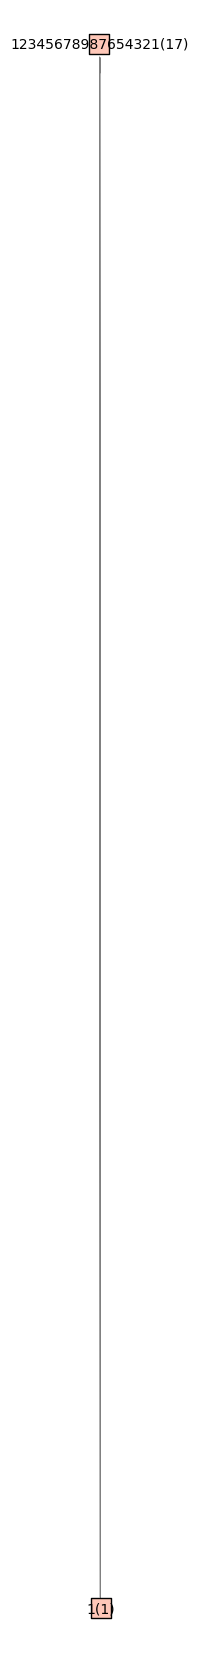

*************************


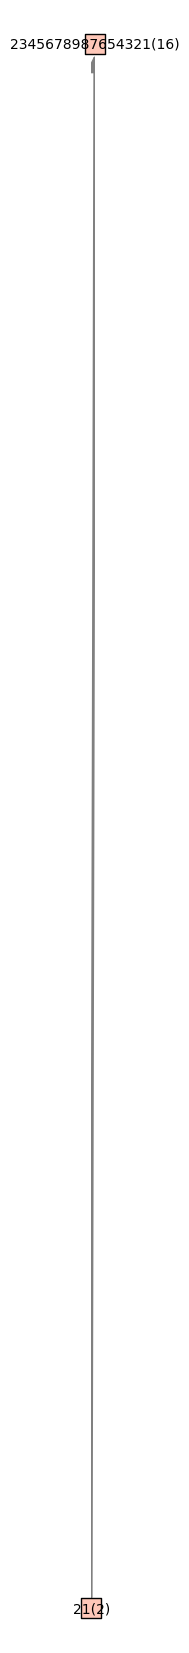

*************************


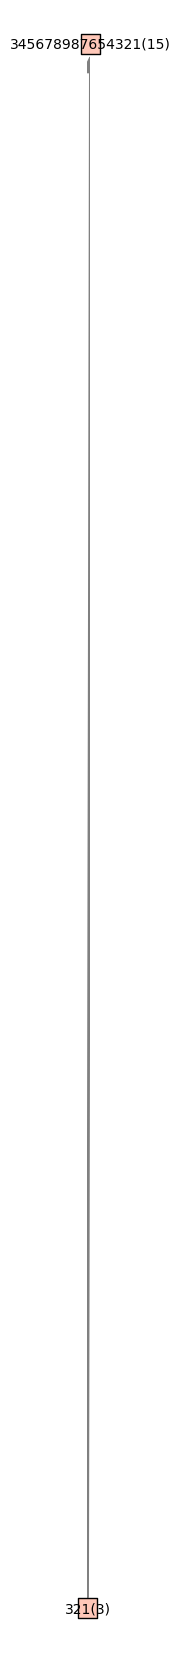

*************************


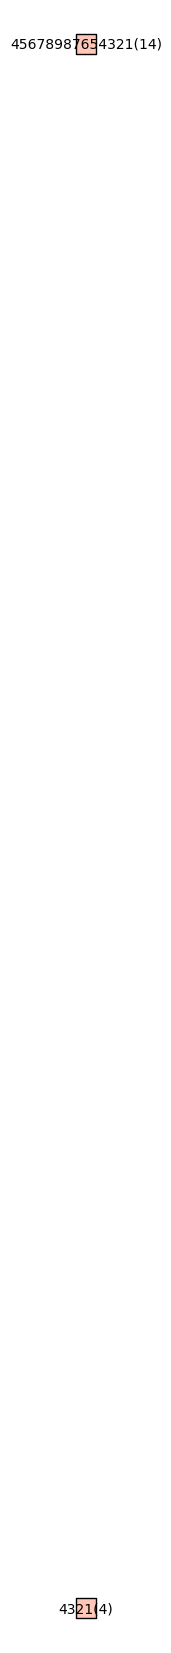

*************************


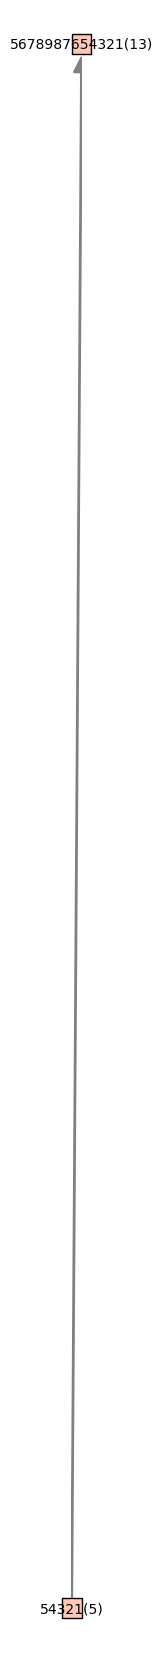

*************************


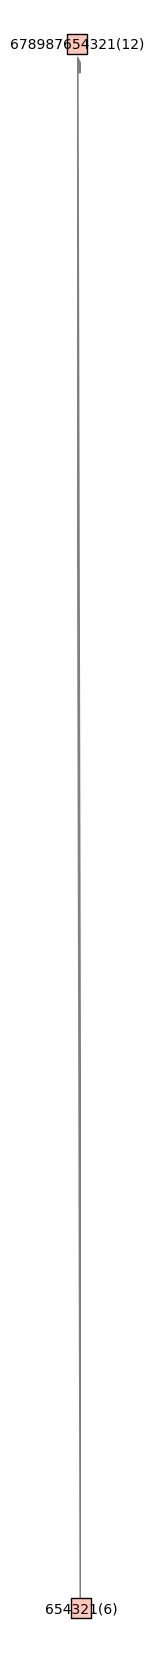

*************************


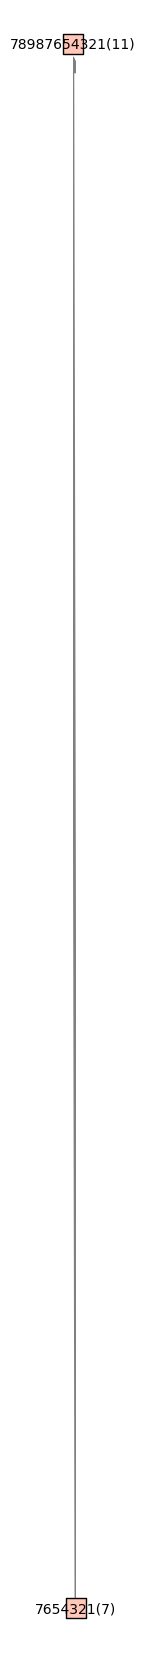

*************************


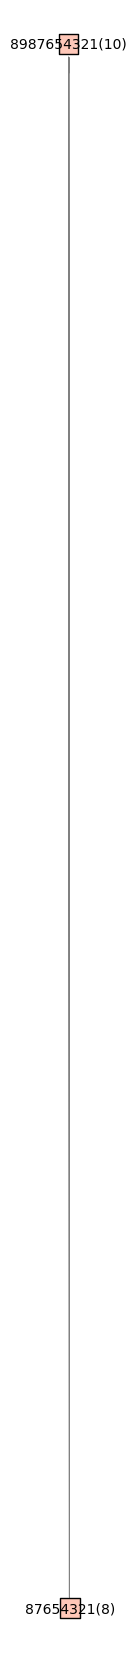

*************************


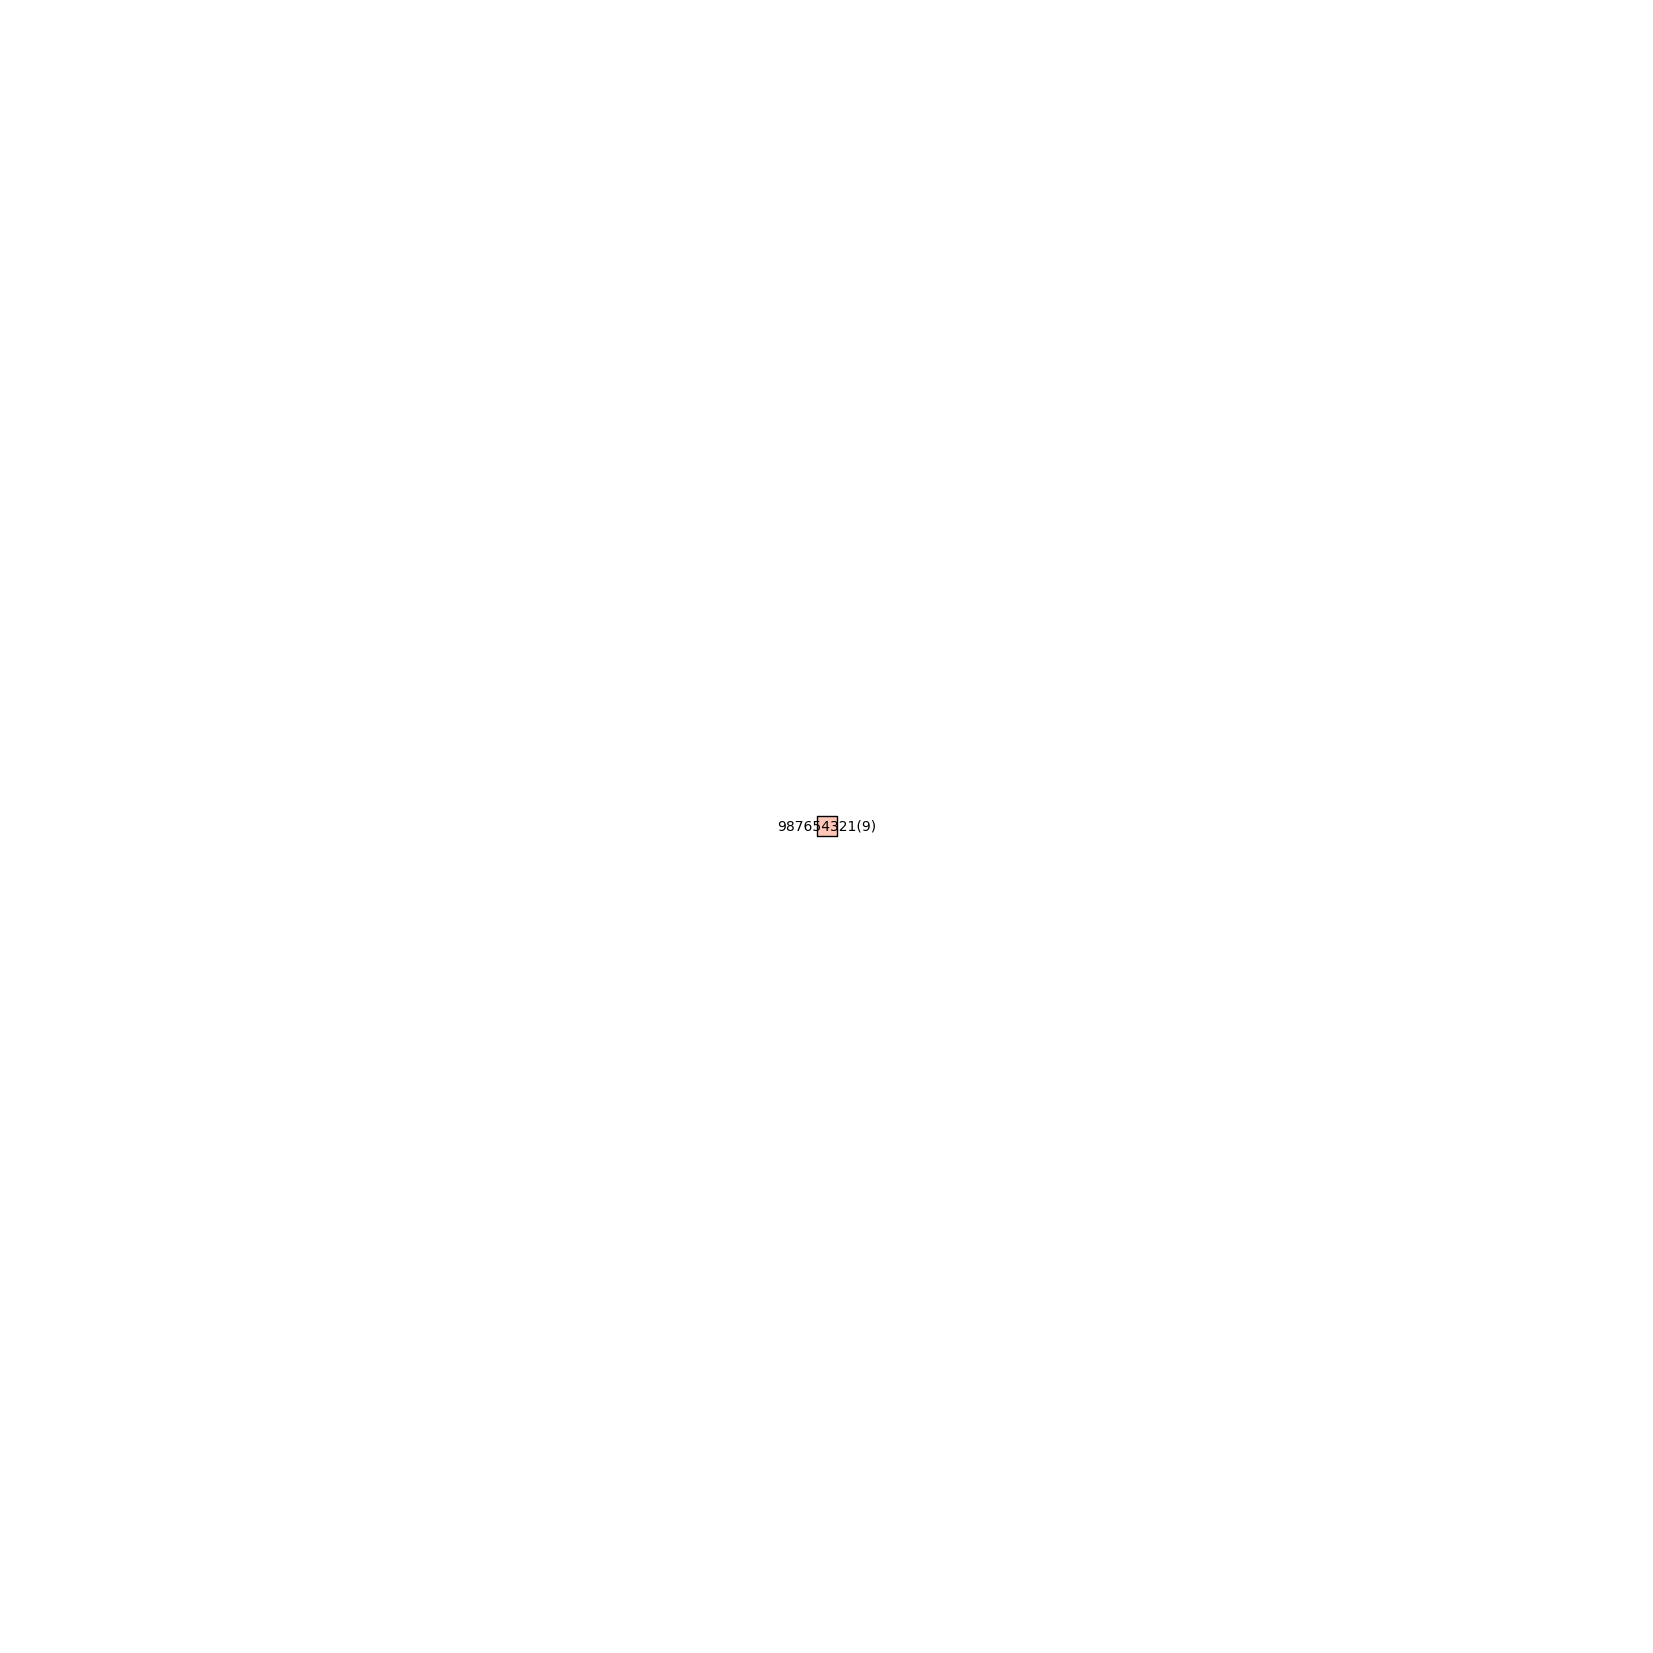

*************************


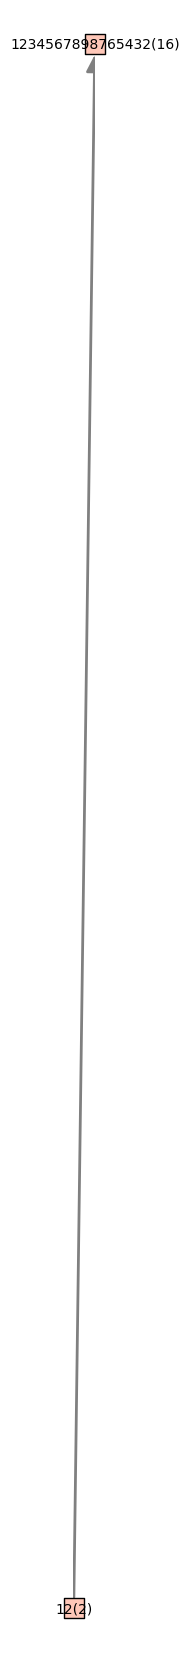

*************************


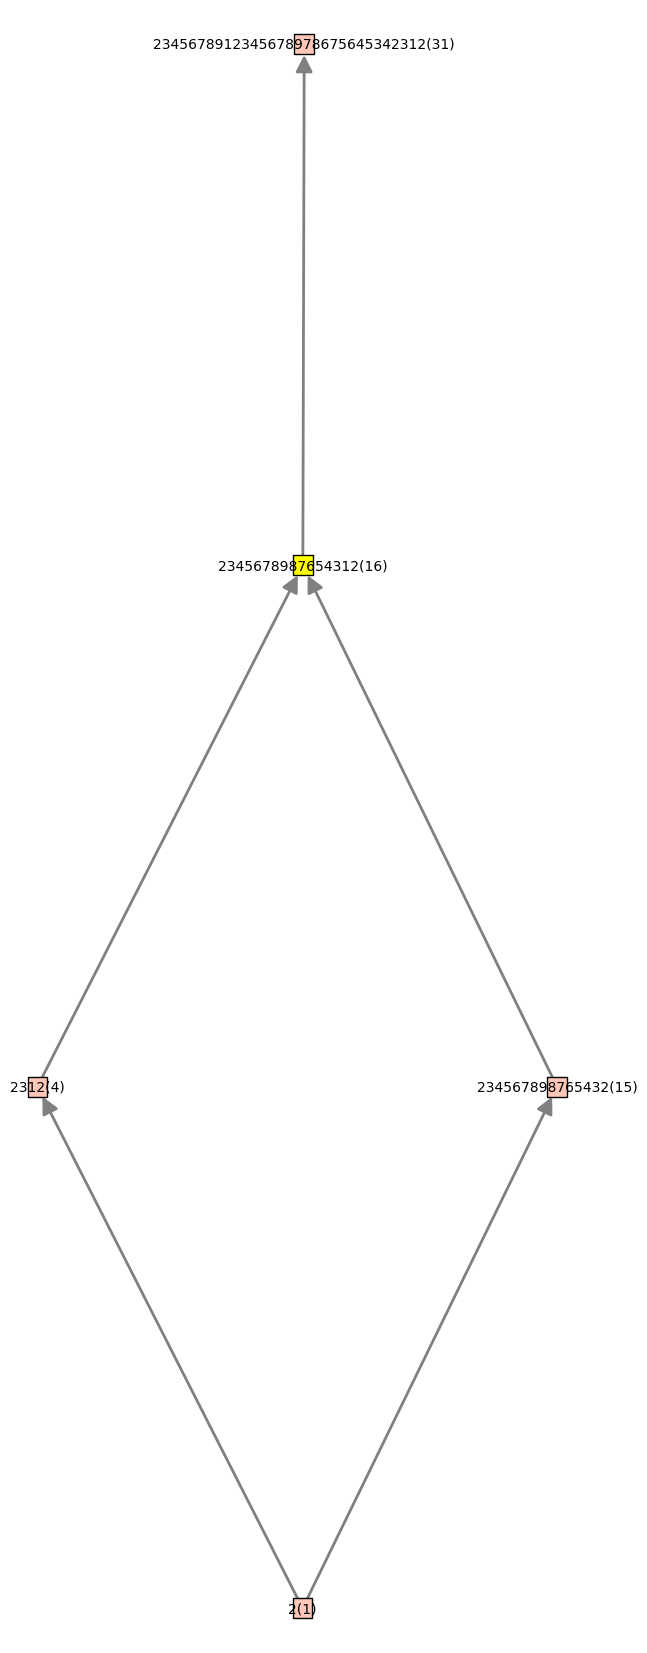

*************************


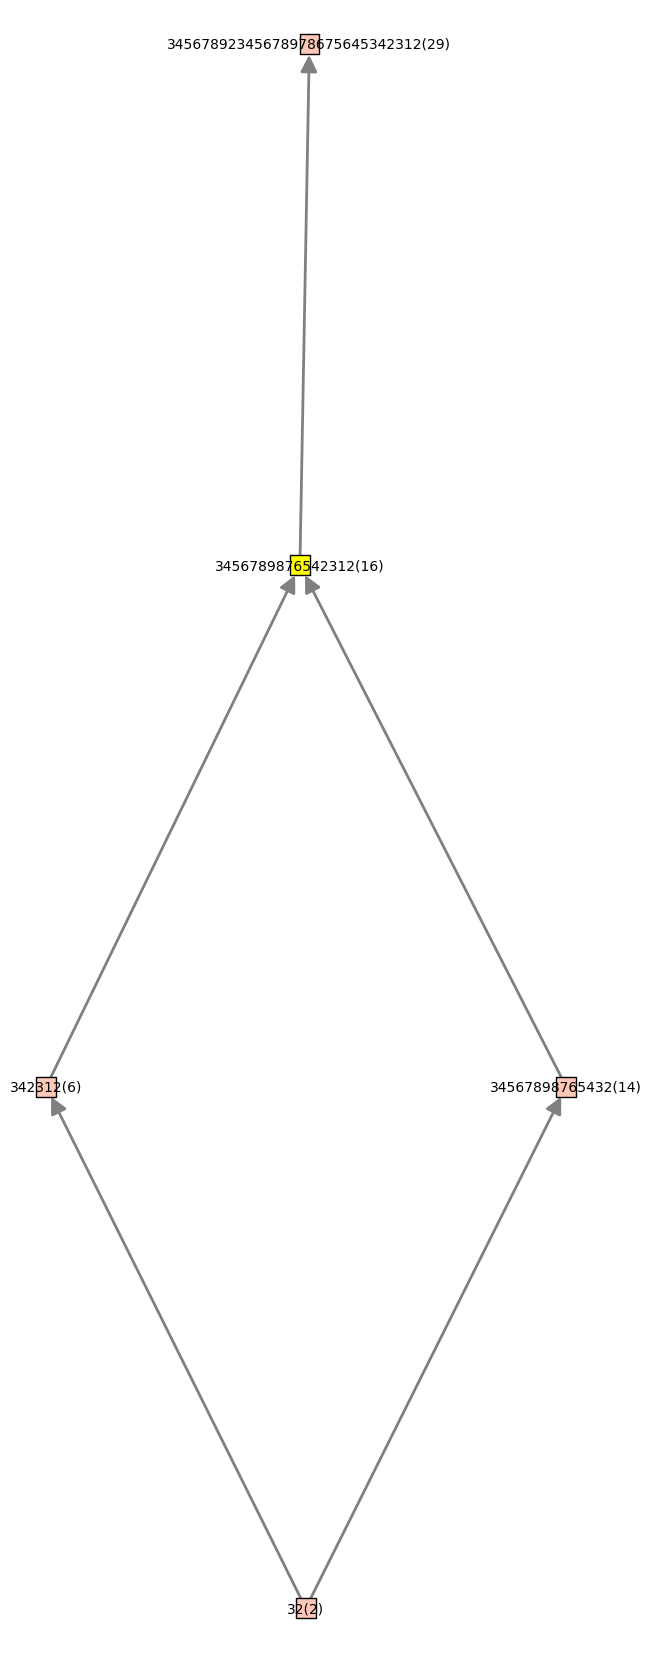

*************************


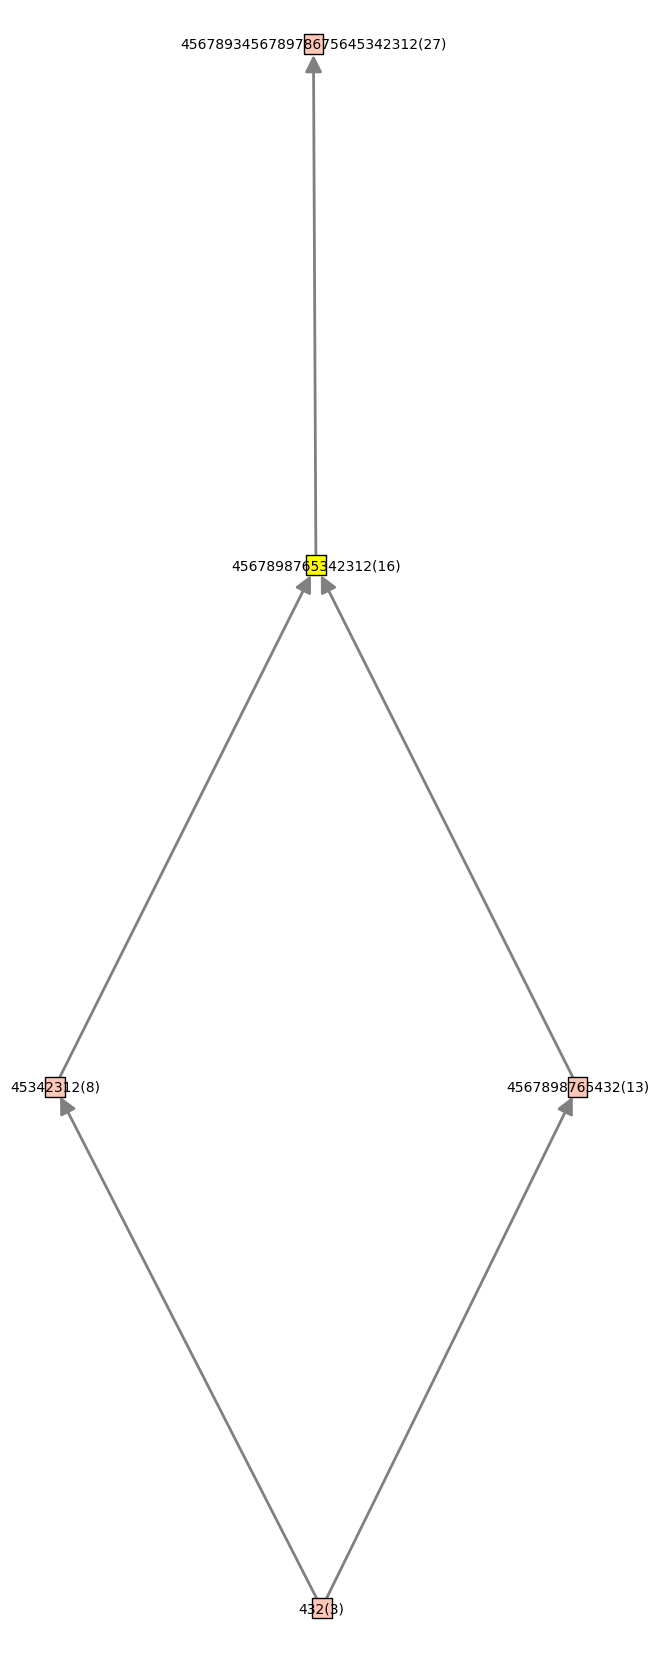

*************************


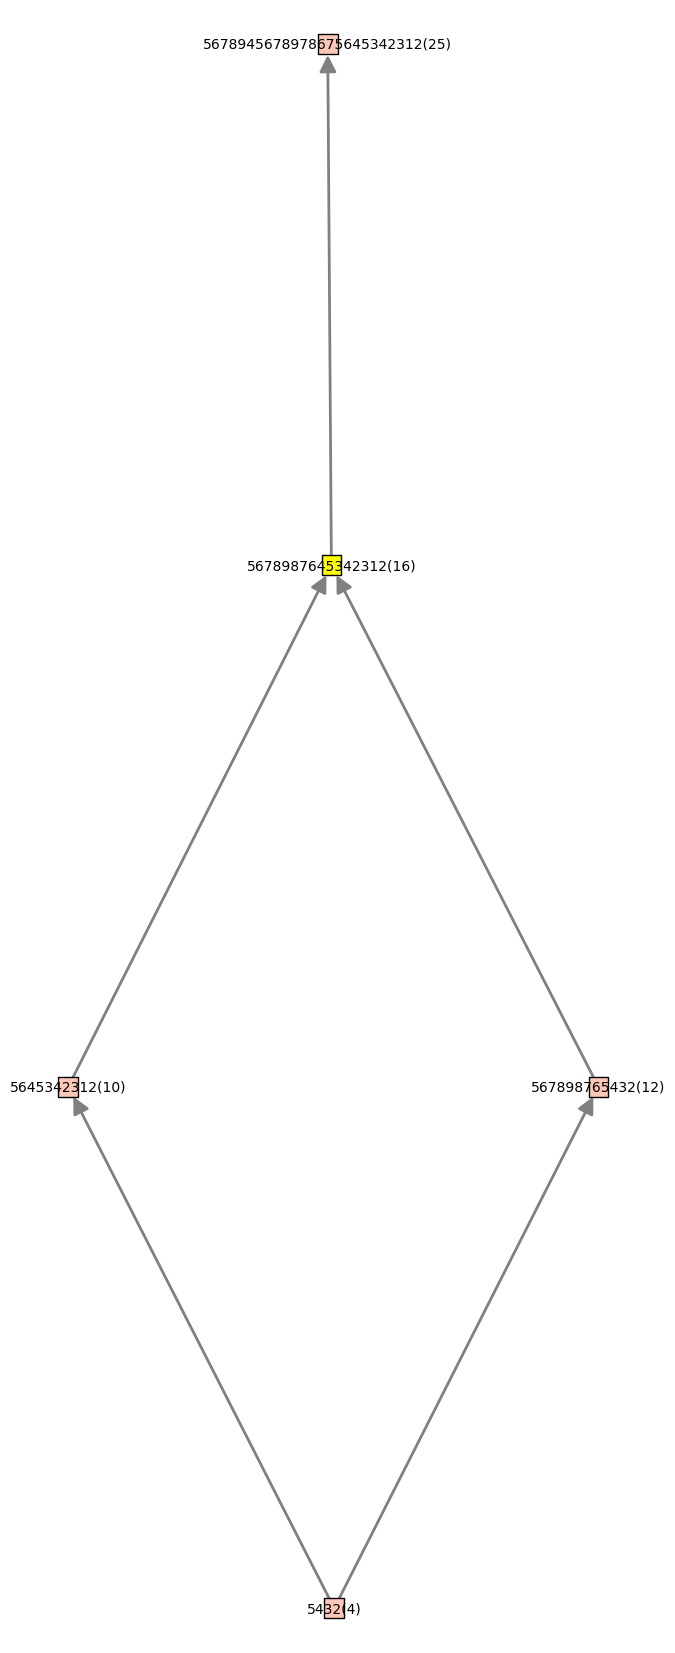

*************************


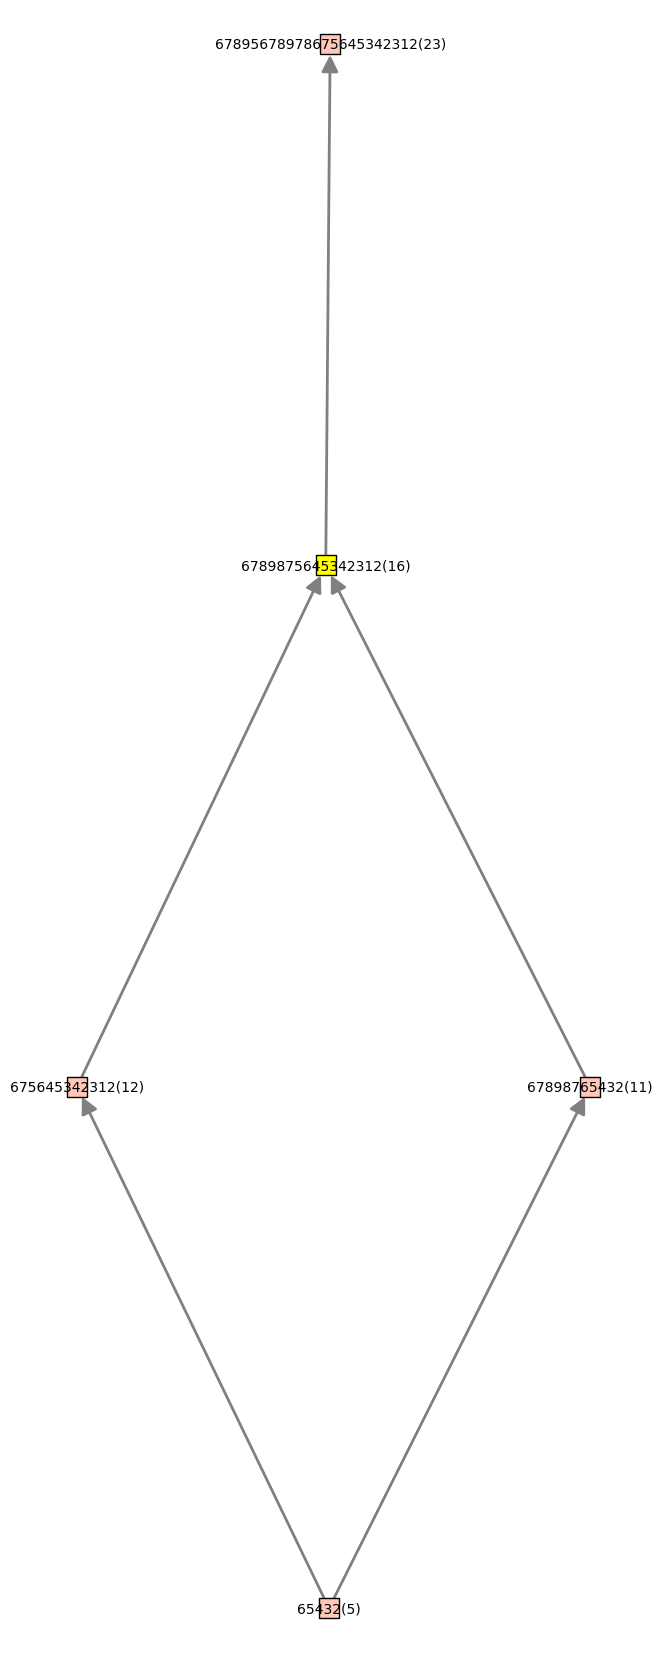

*************************


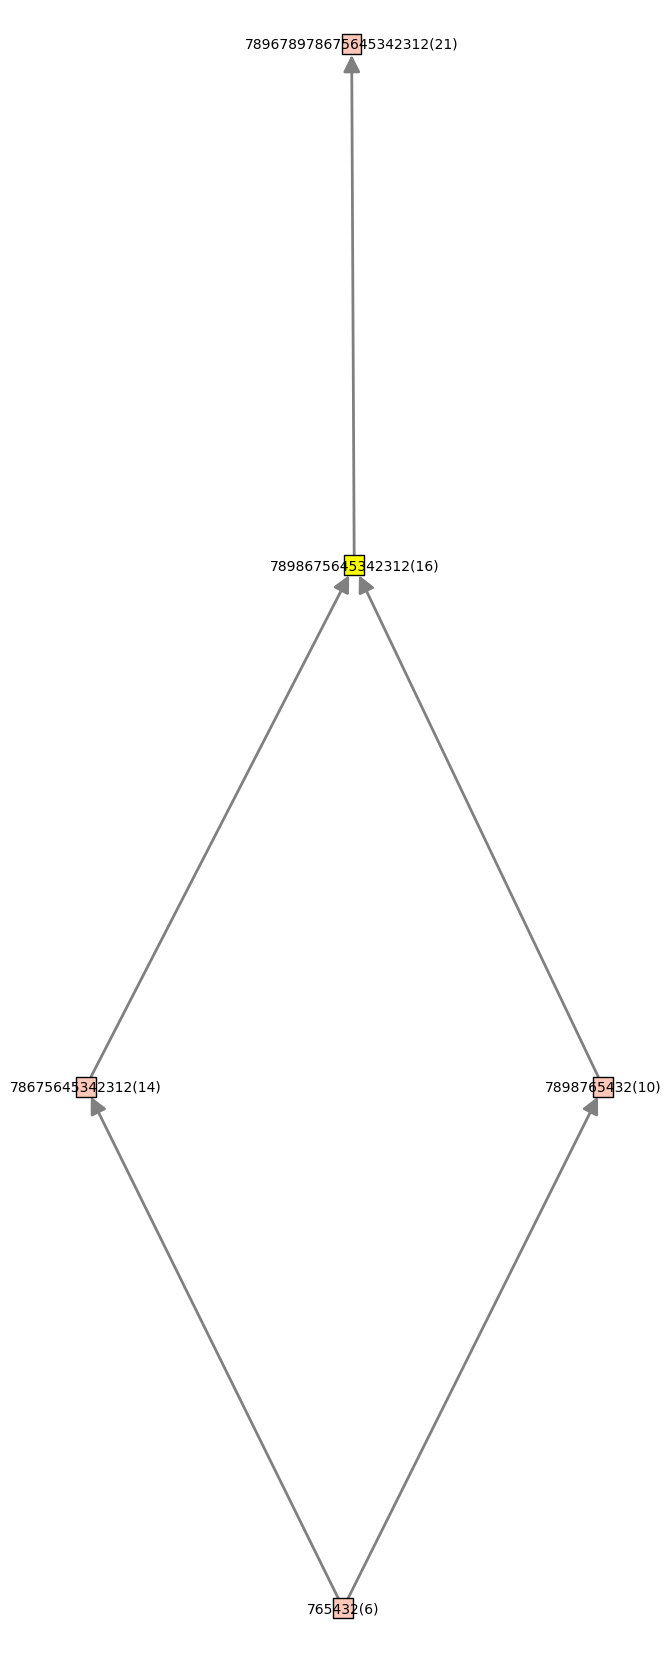

*************************


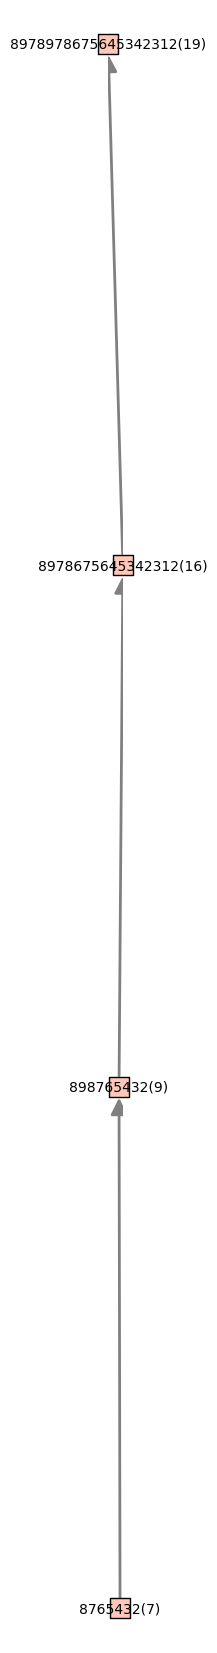

*************************


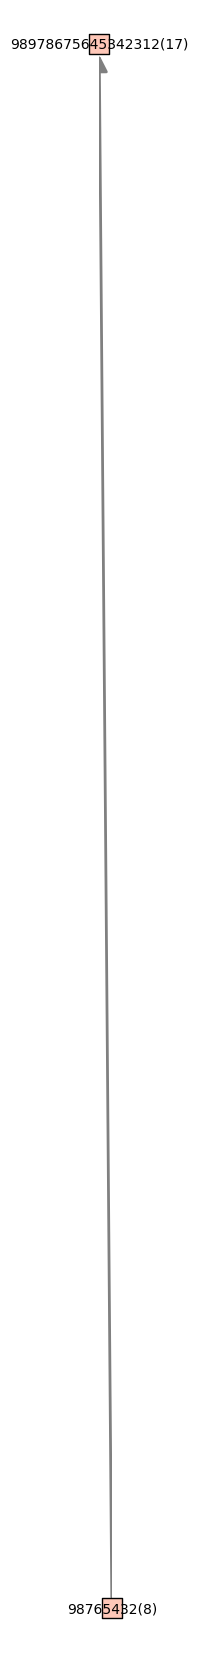

*************************


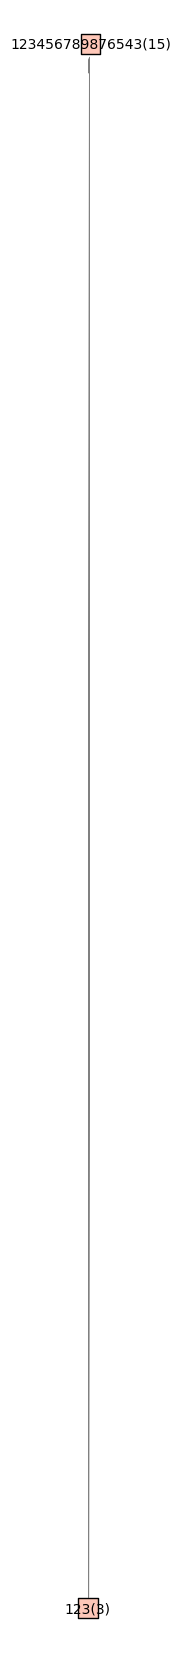

*************************


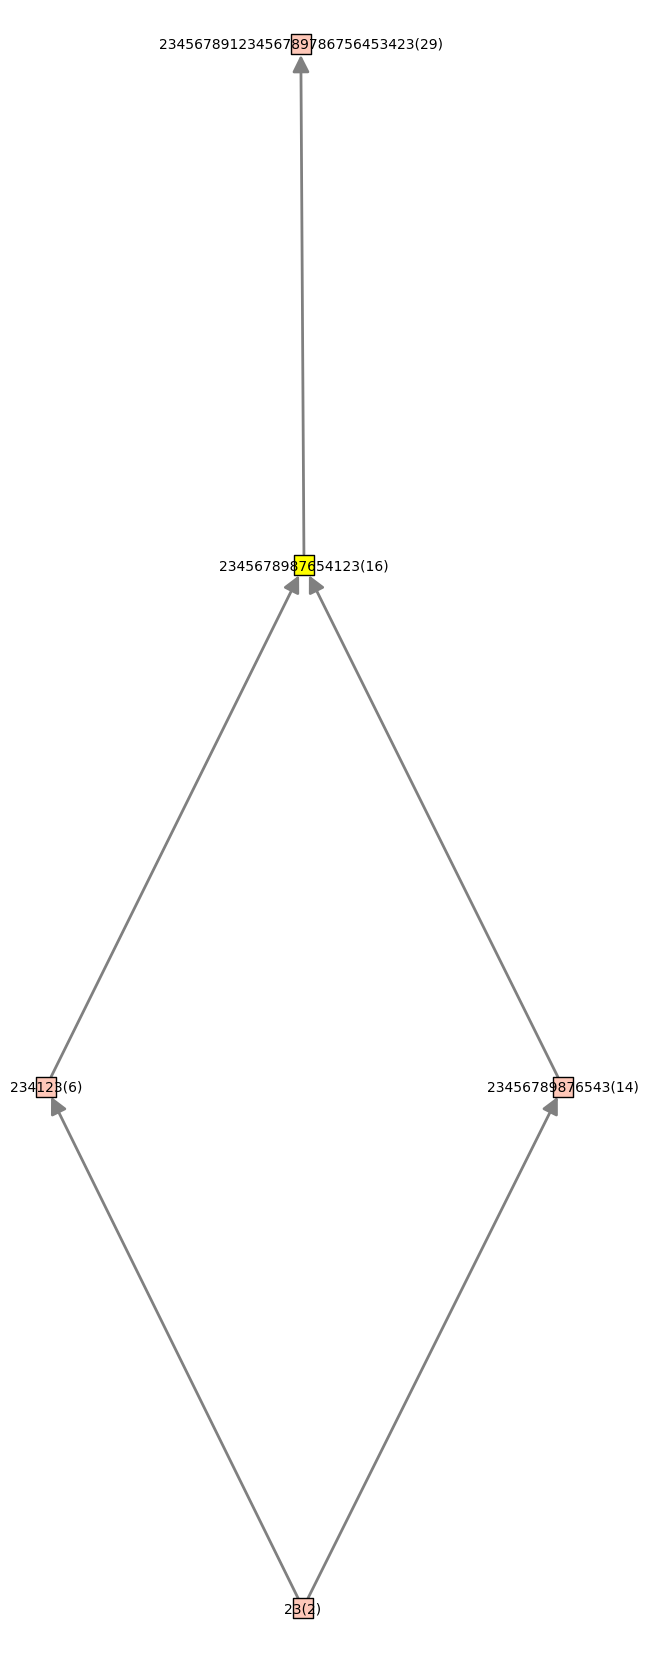

*************************


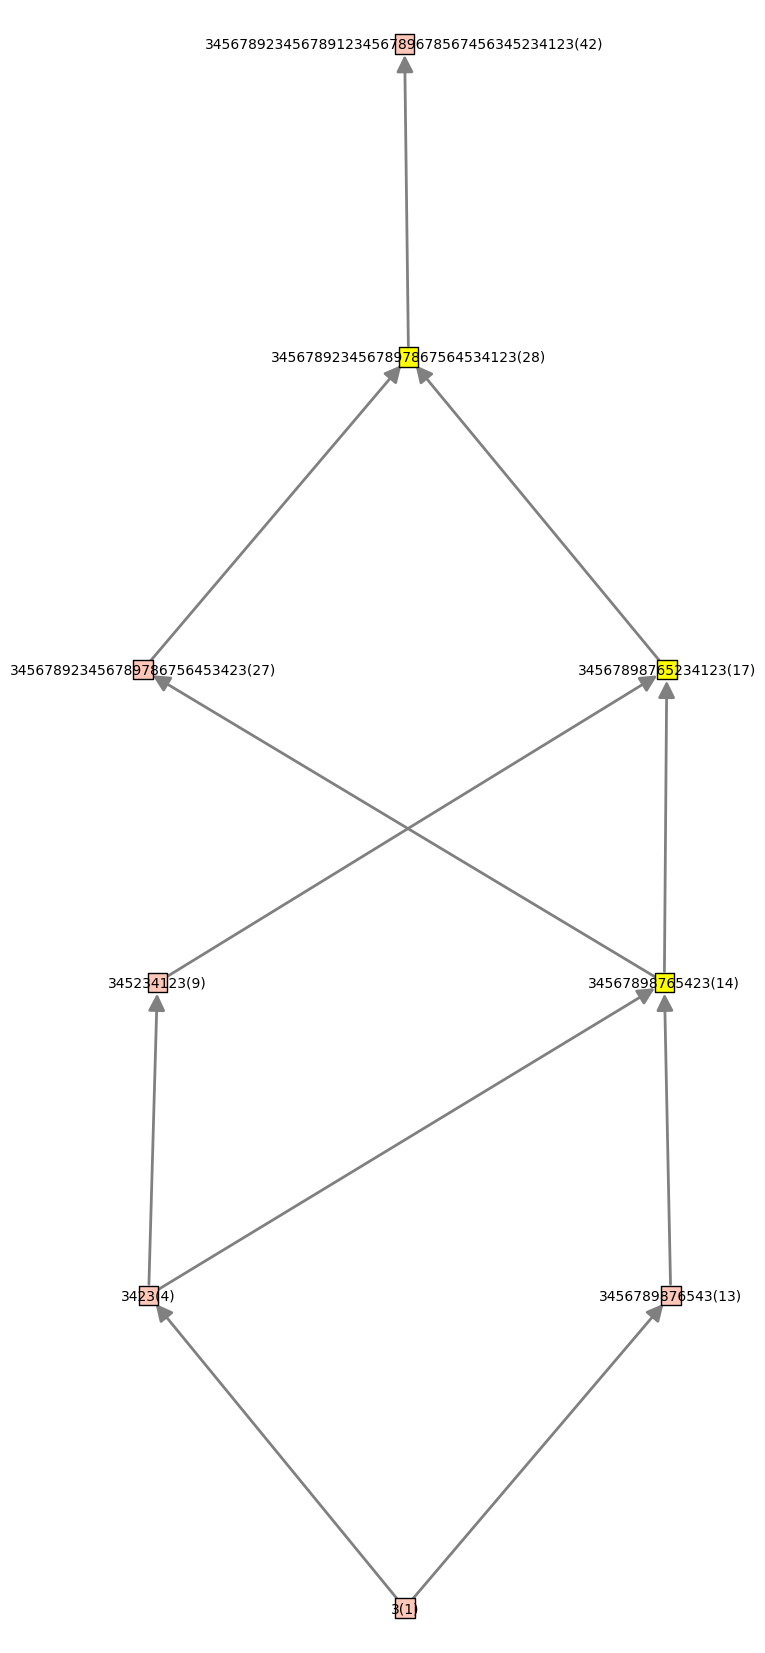

*************************


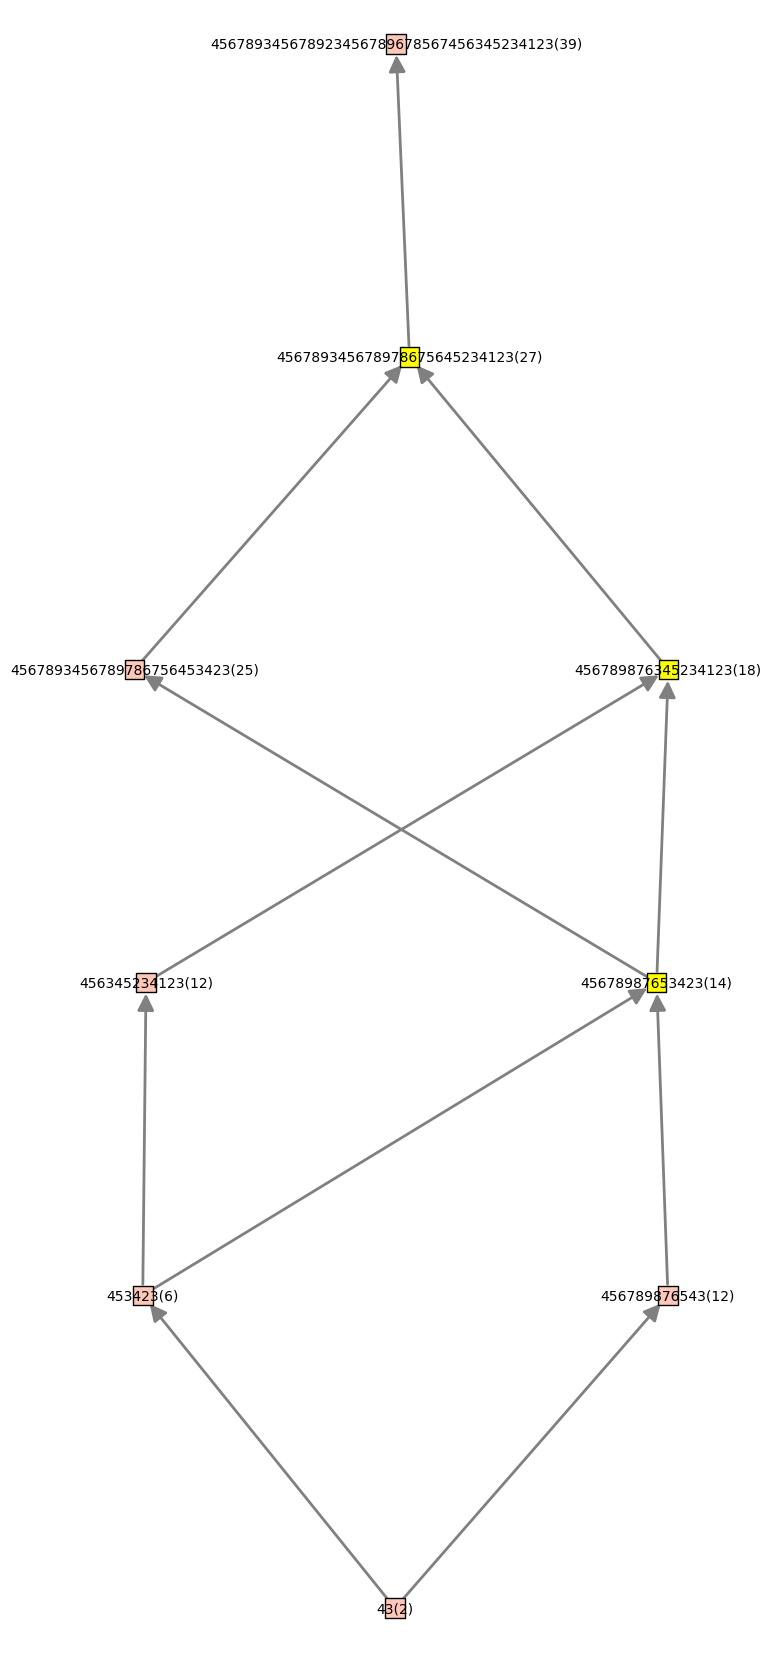

*************************


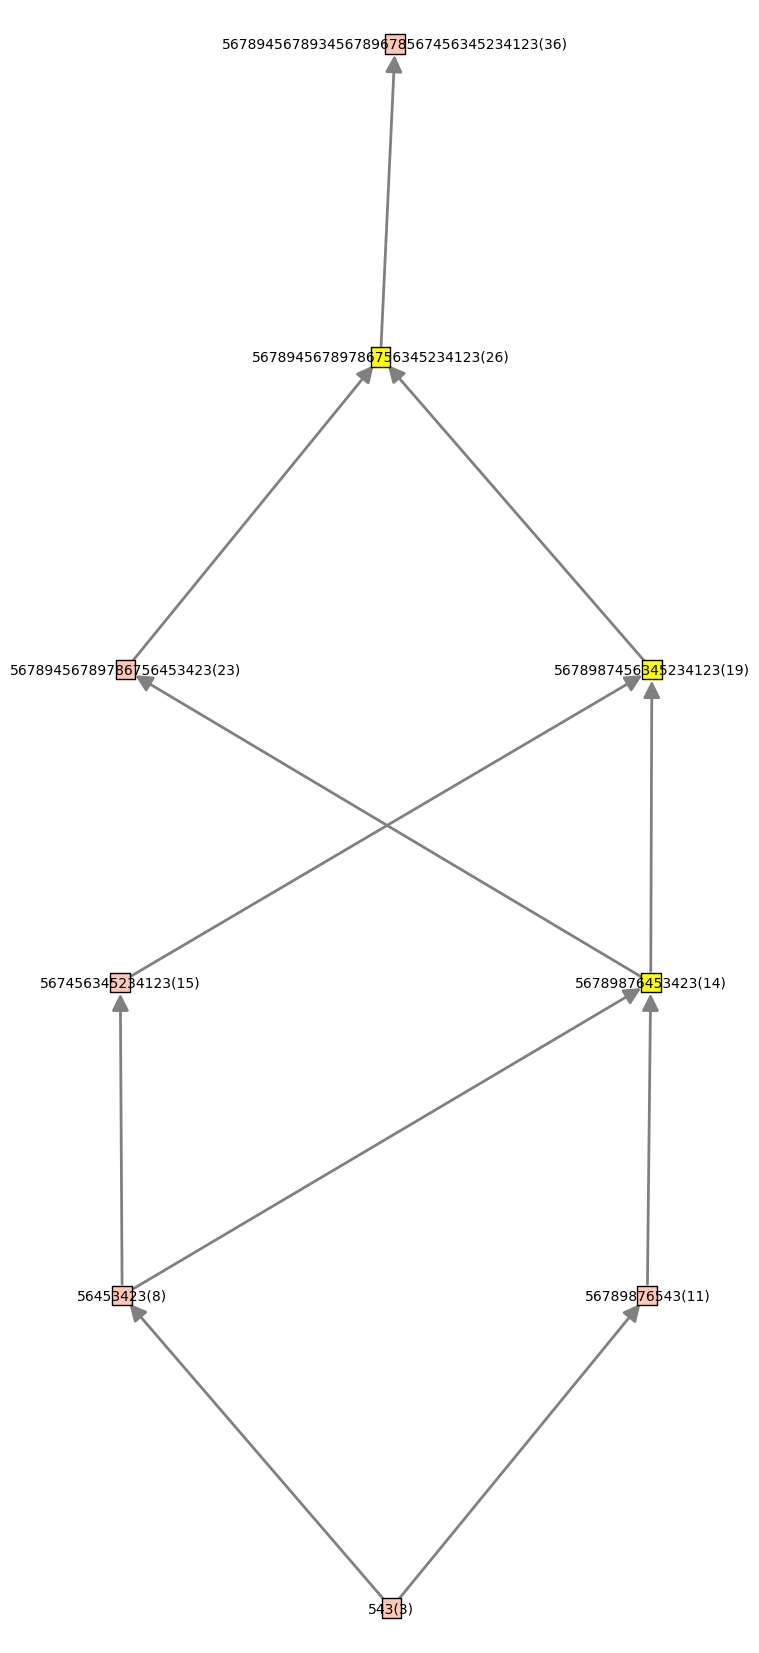

*************************


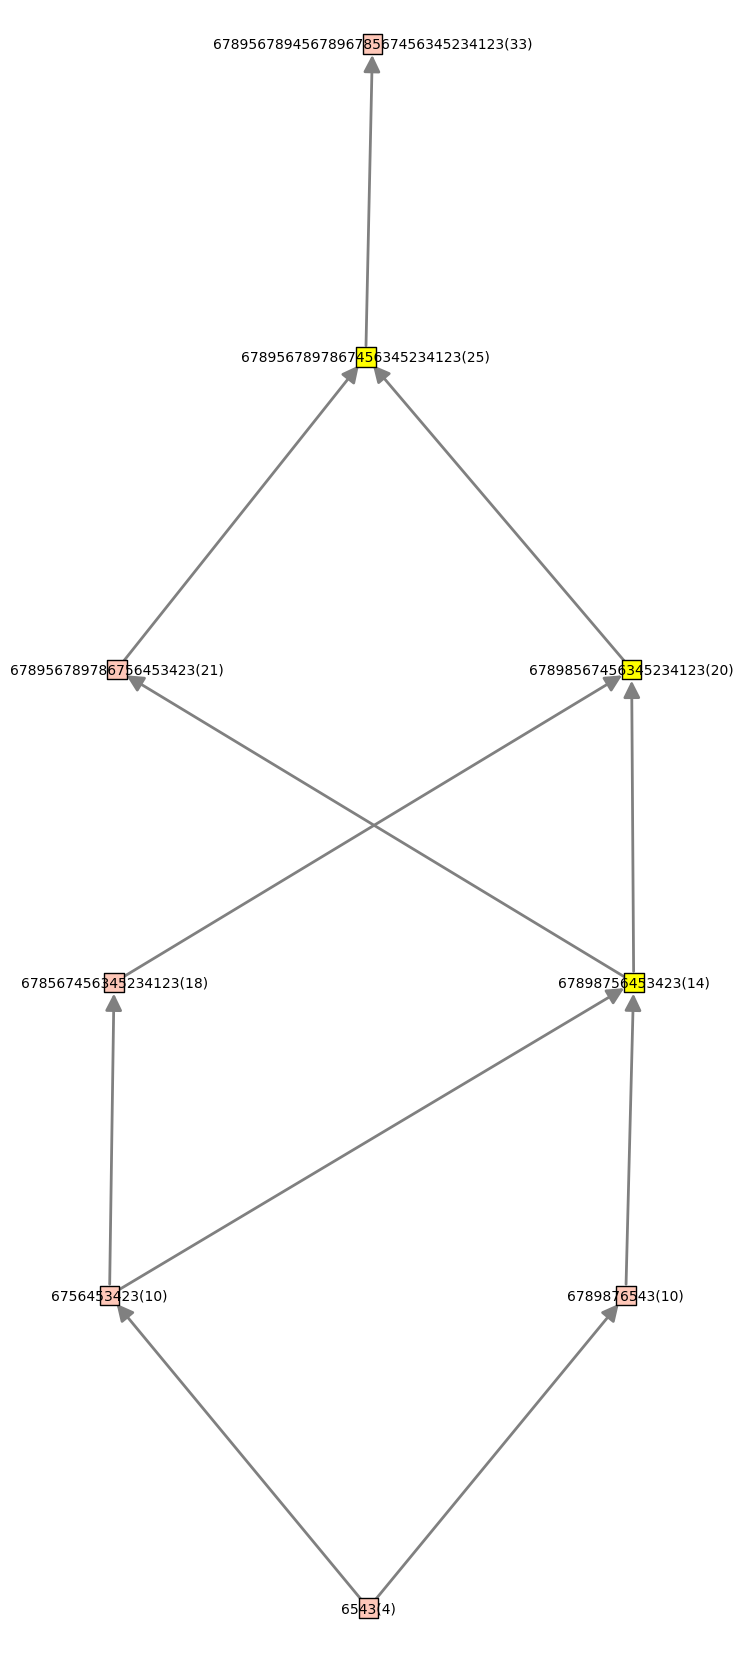

*************************


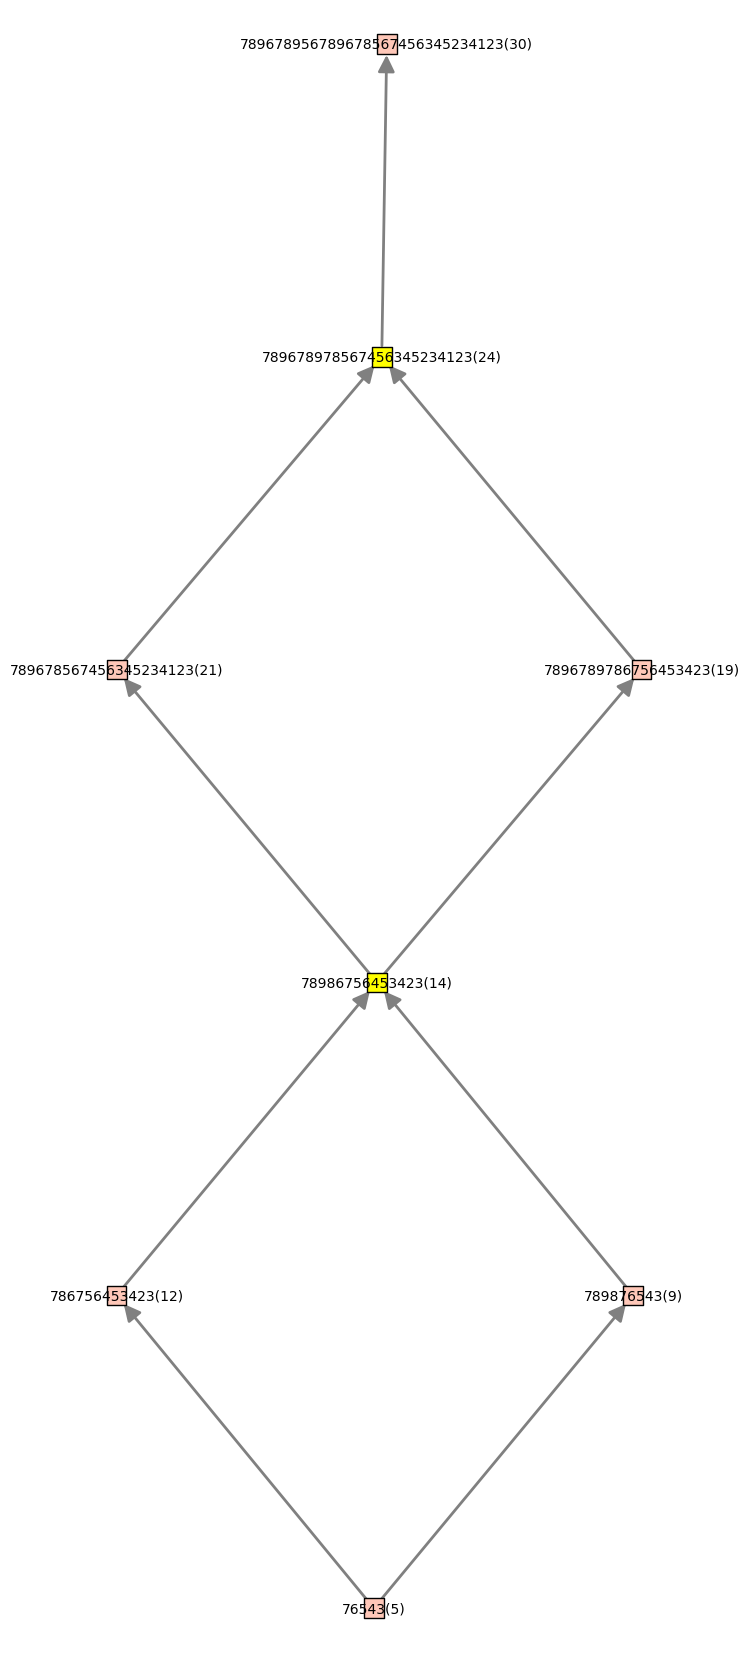

*************************


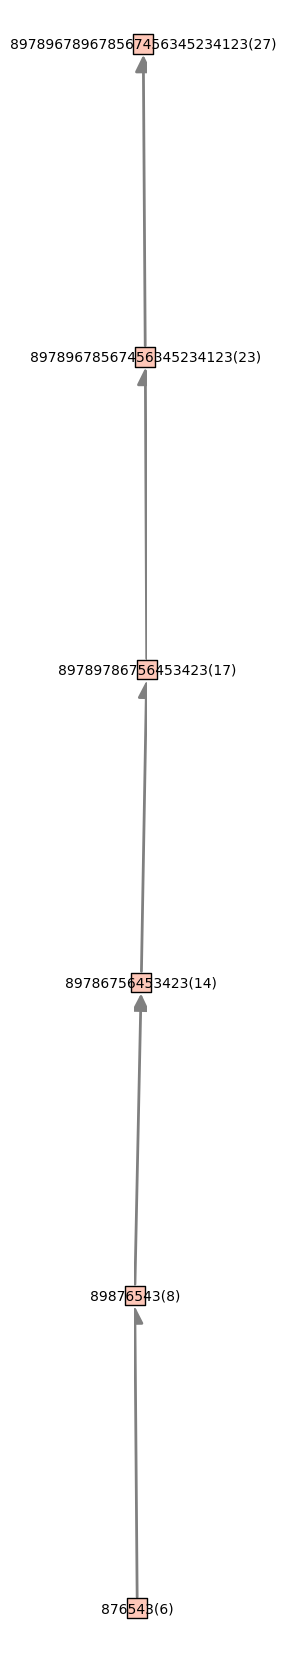

*************************


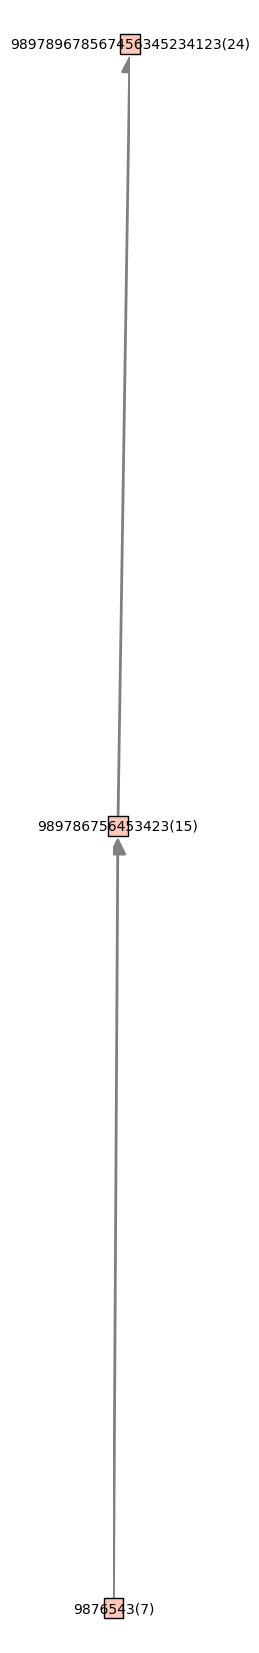

*************************


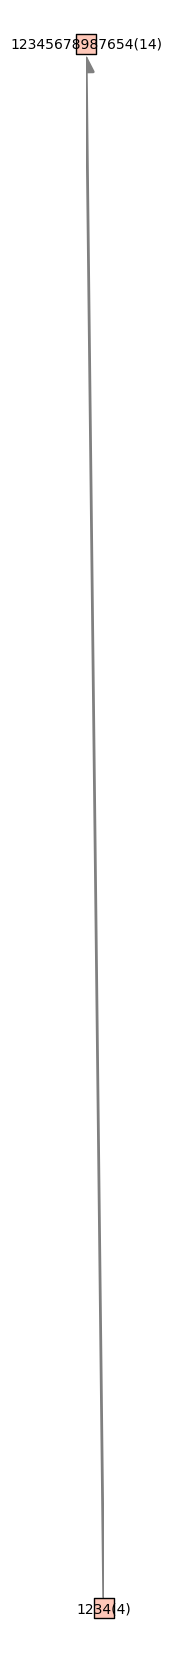

*************************


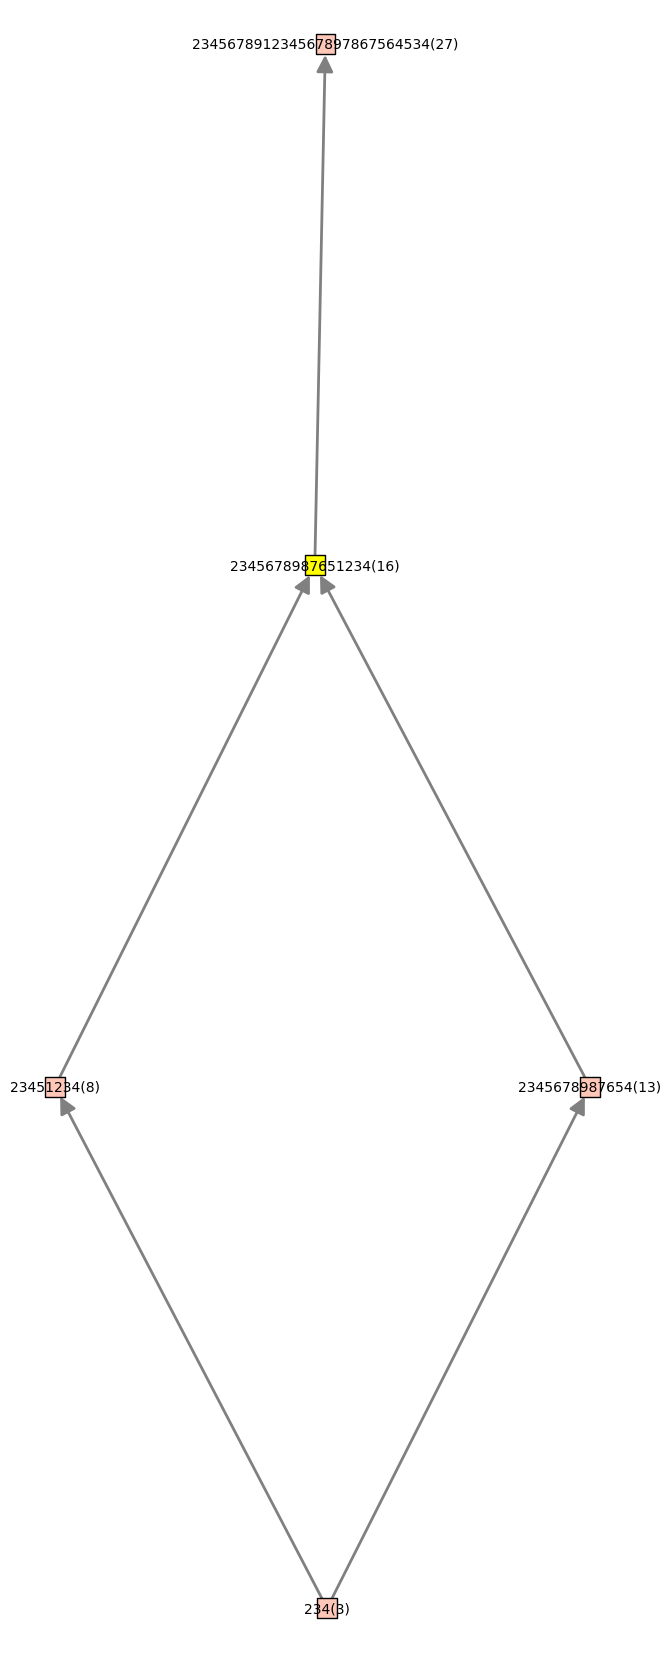

*************************


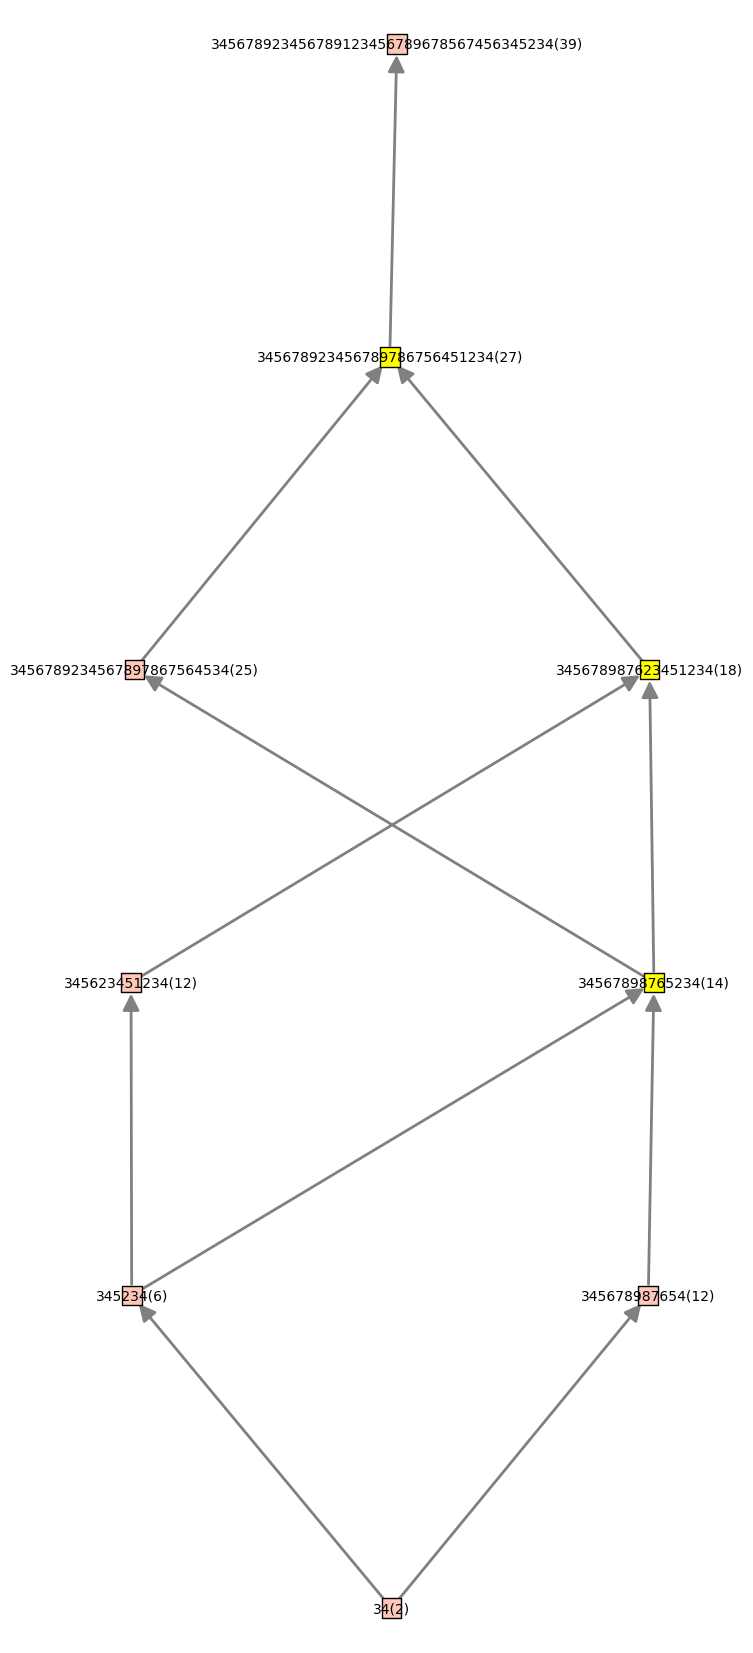

*************************


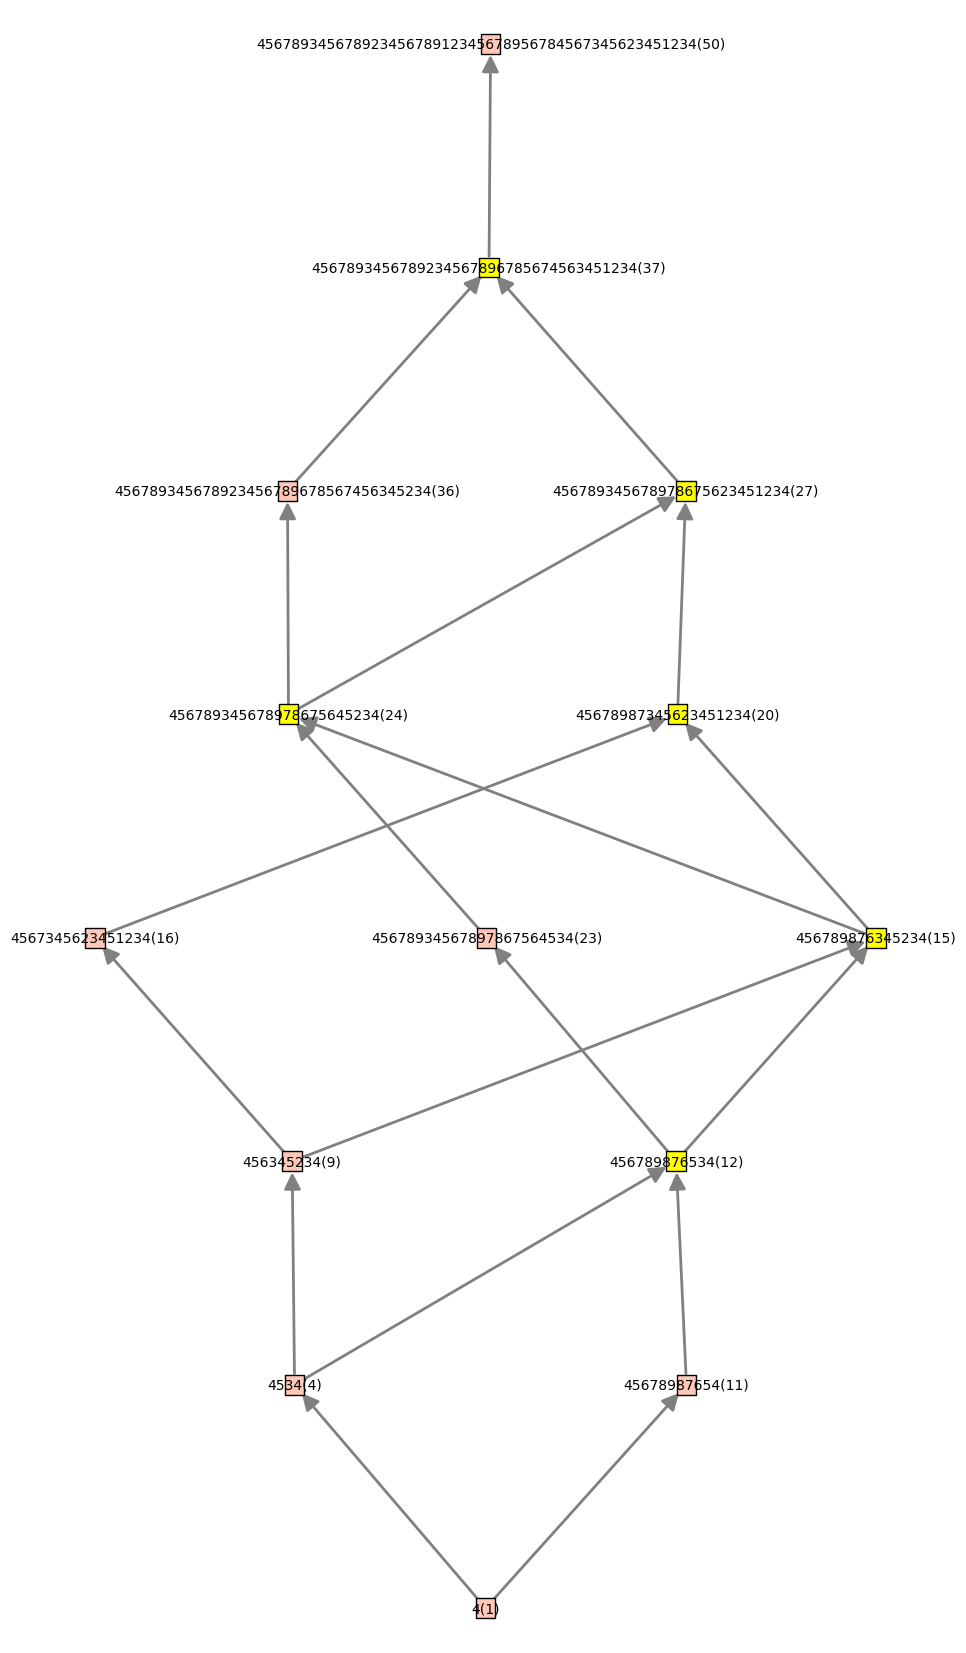

*************************


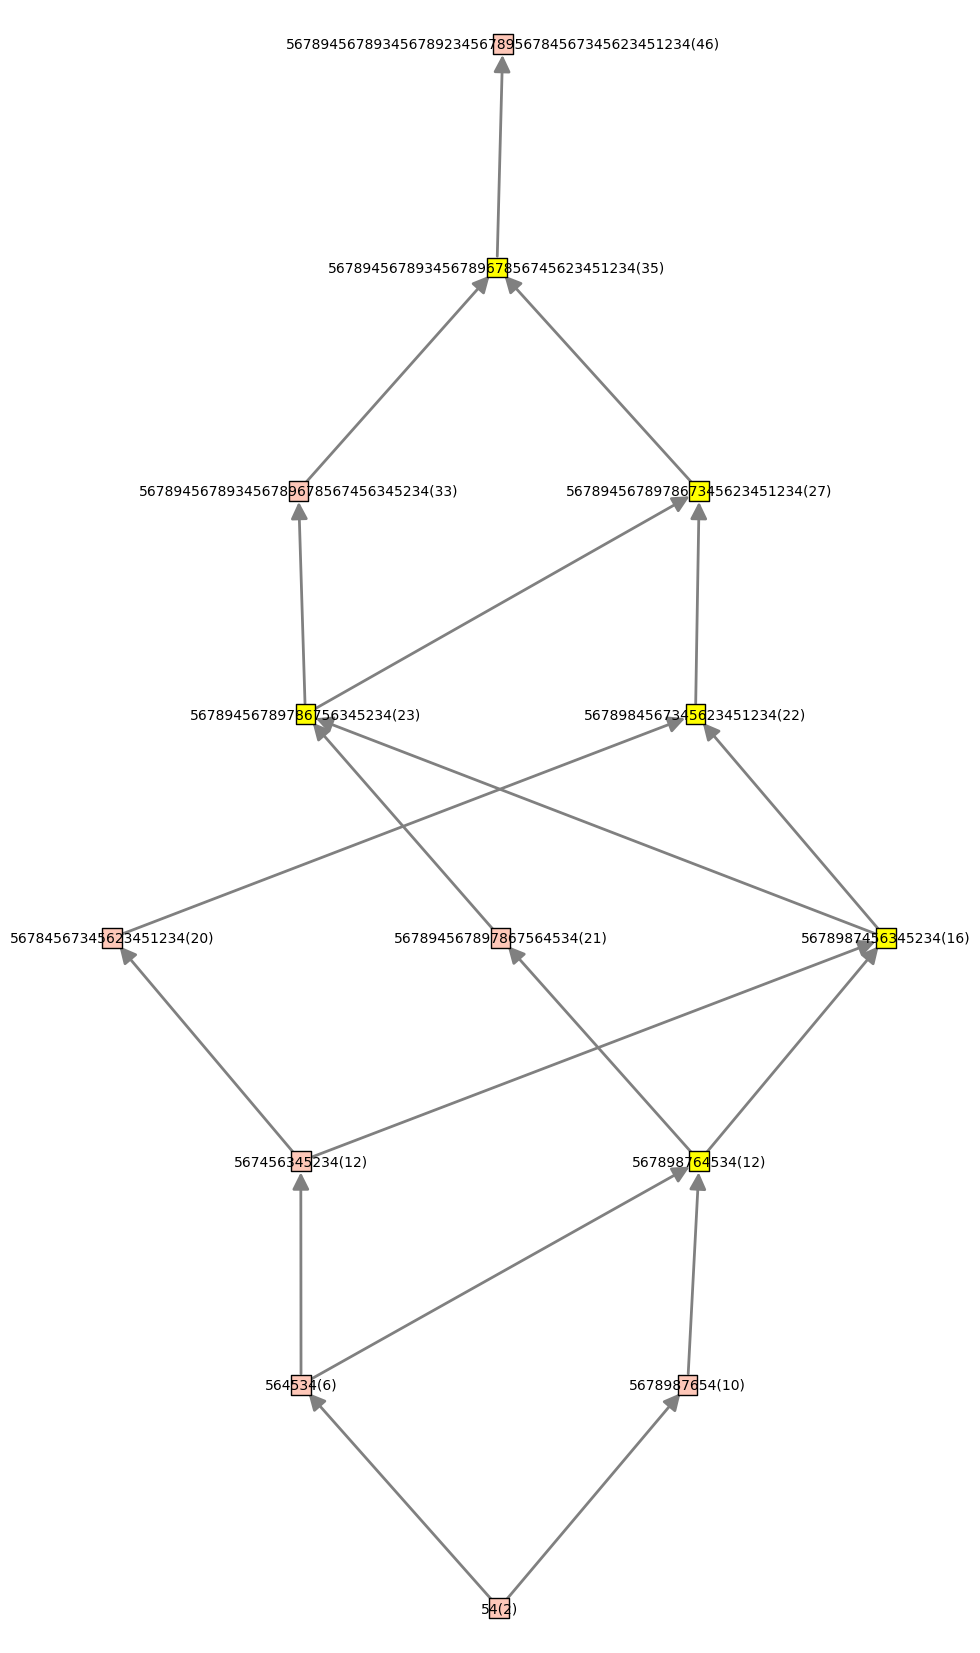

*************************


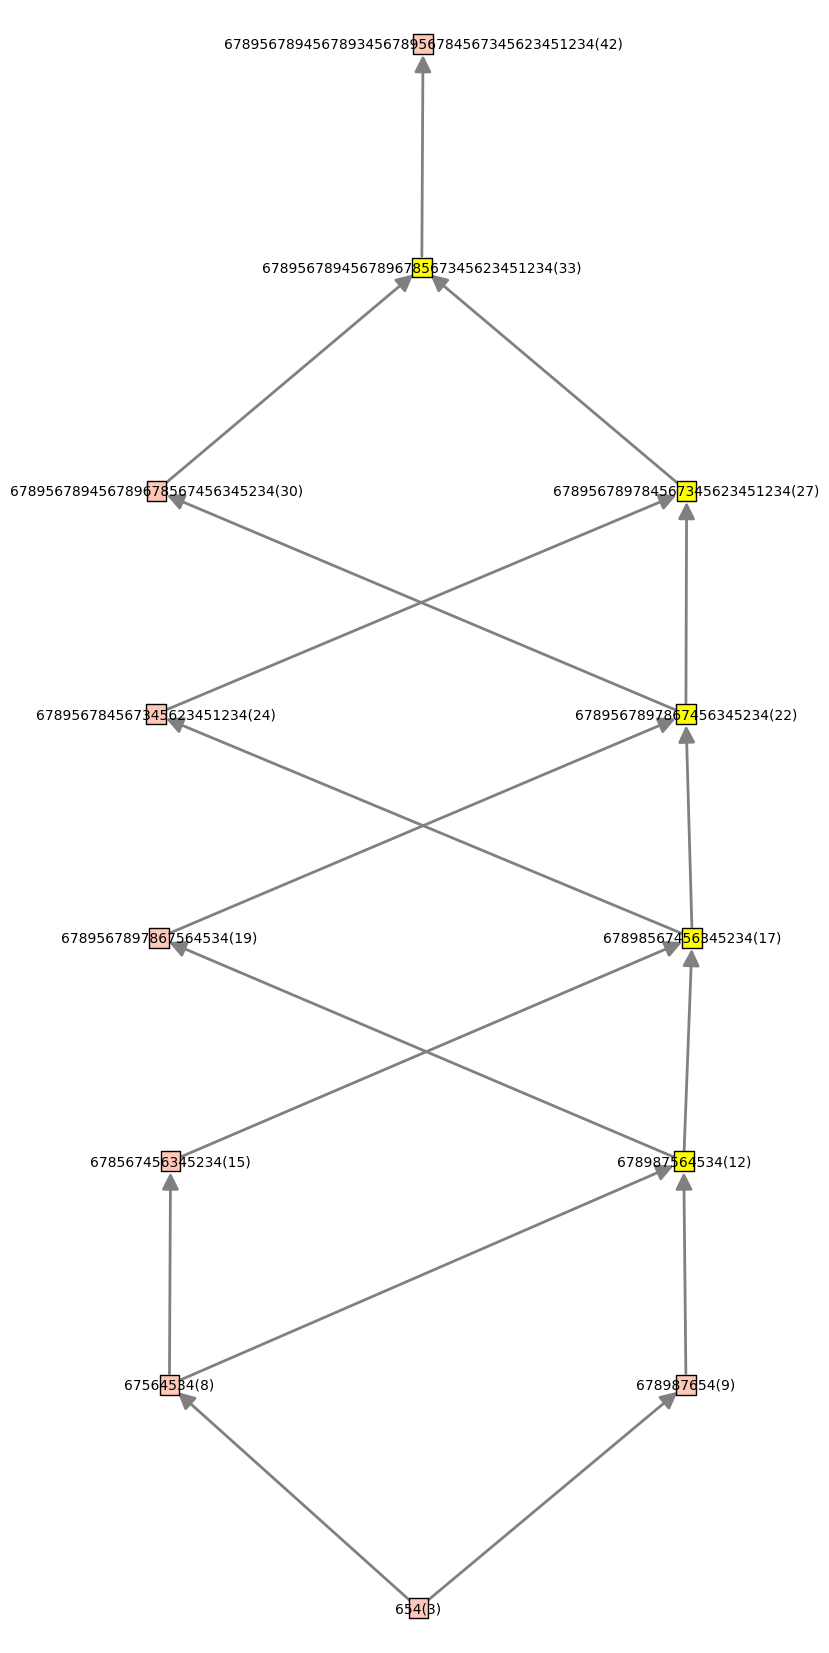

*************************


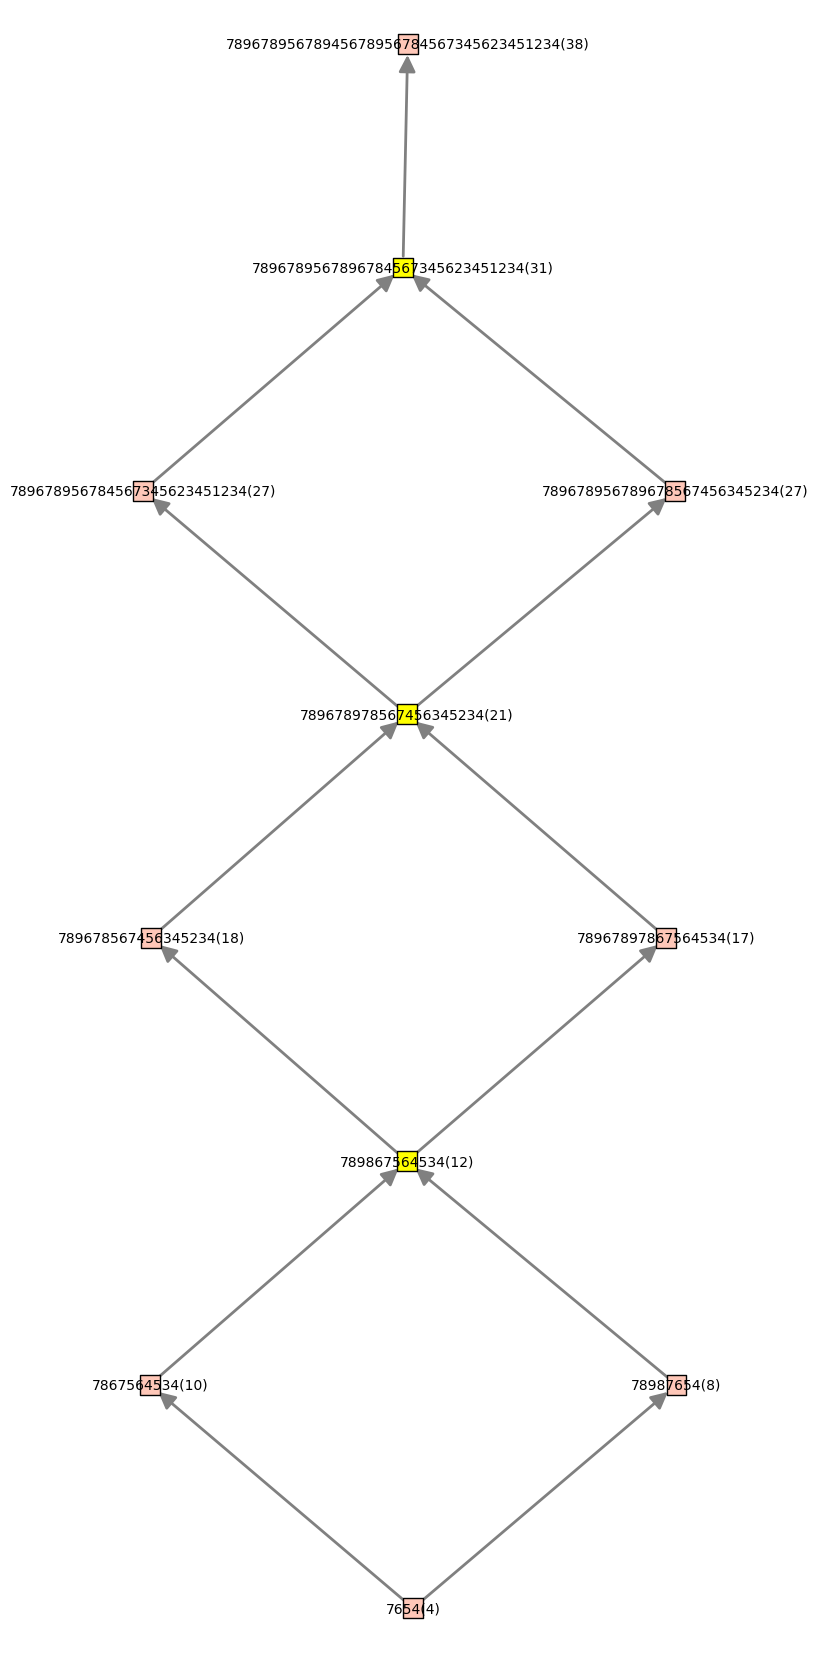

*************************


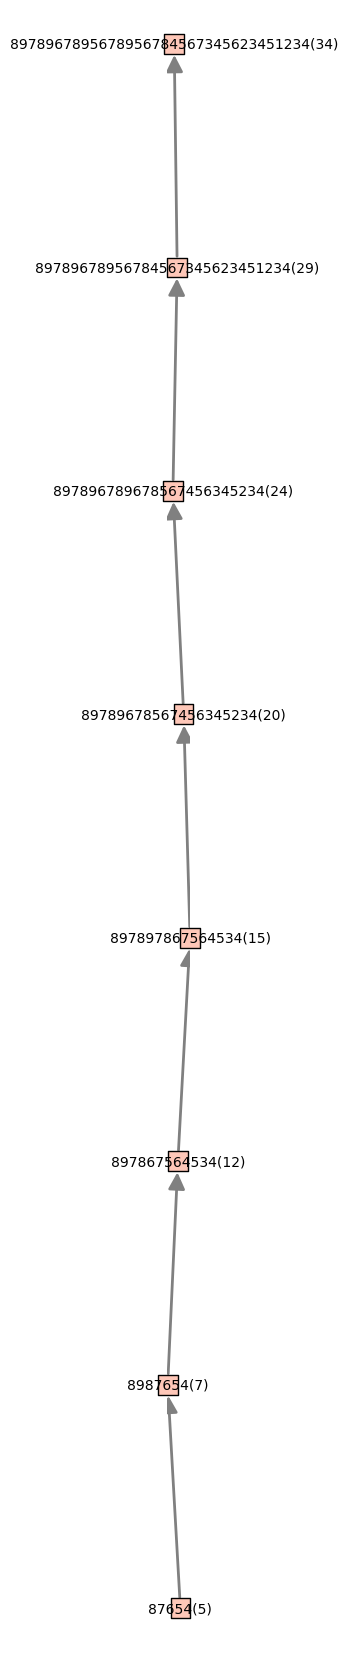

*************************


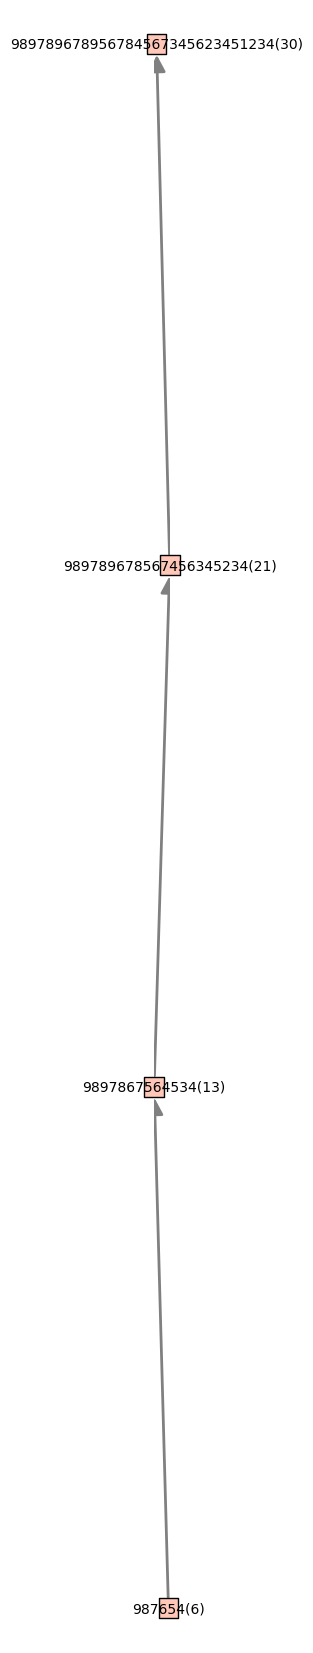

*************************


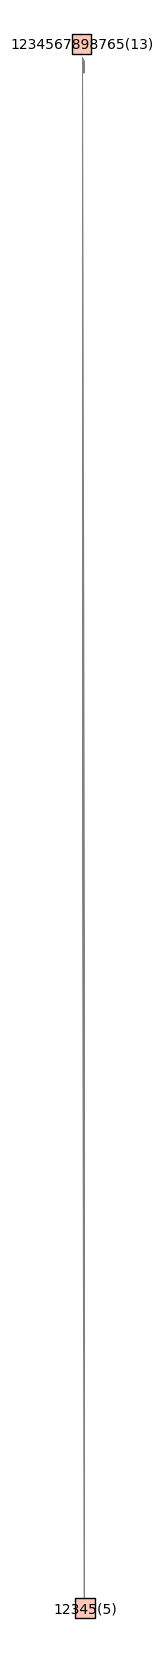

*************************


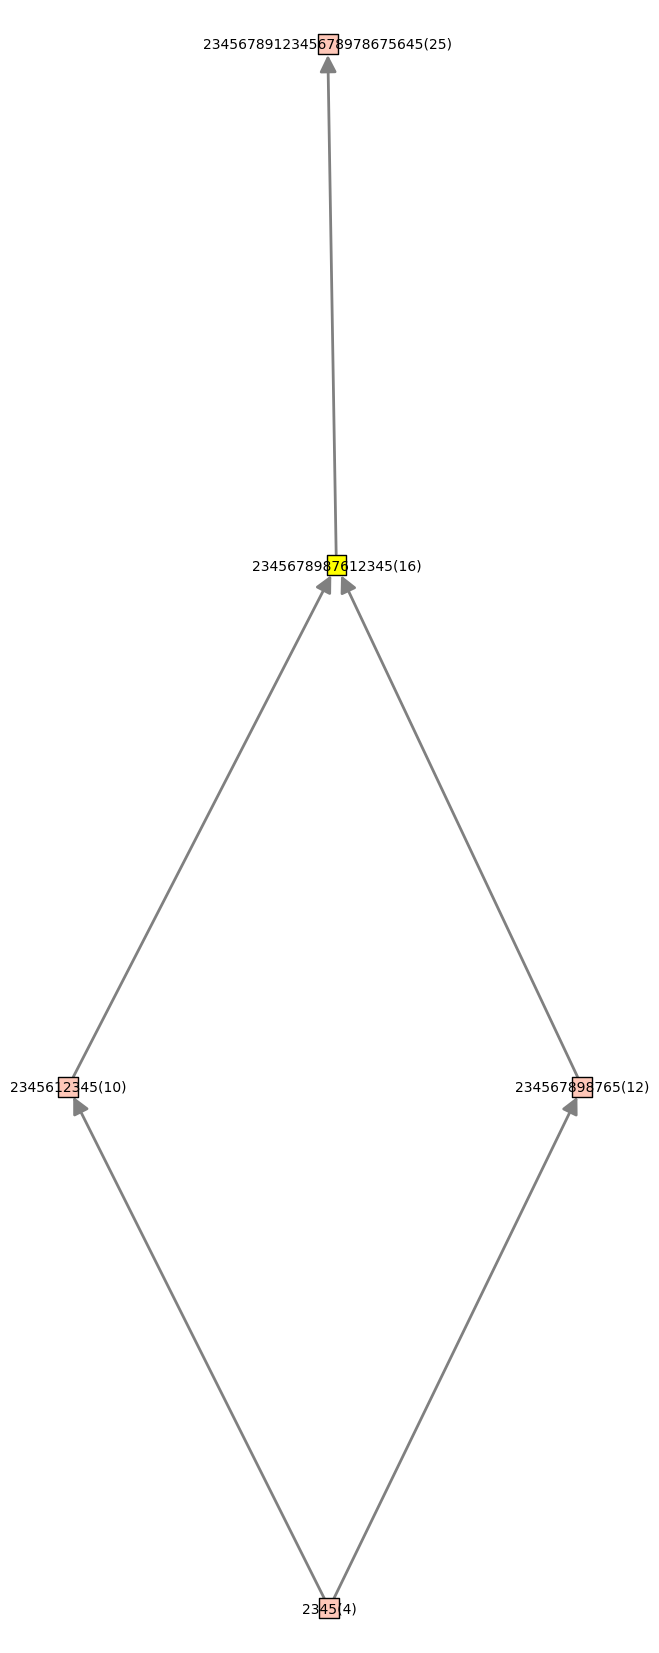

*************************


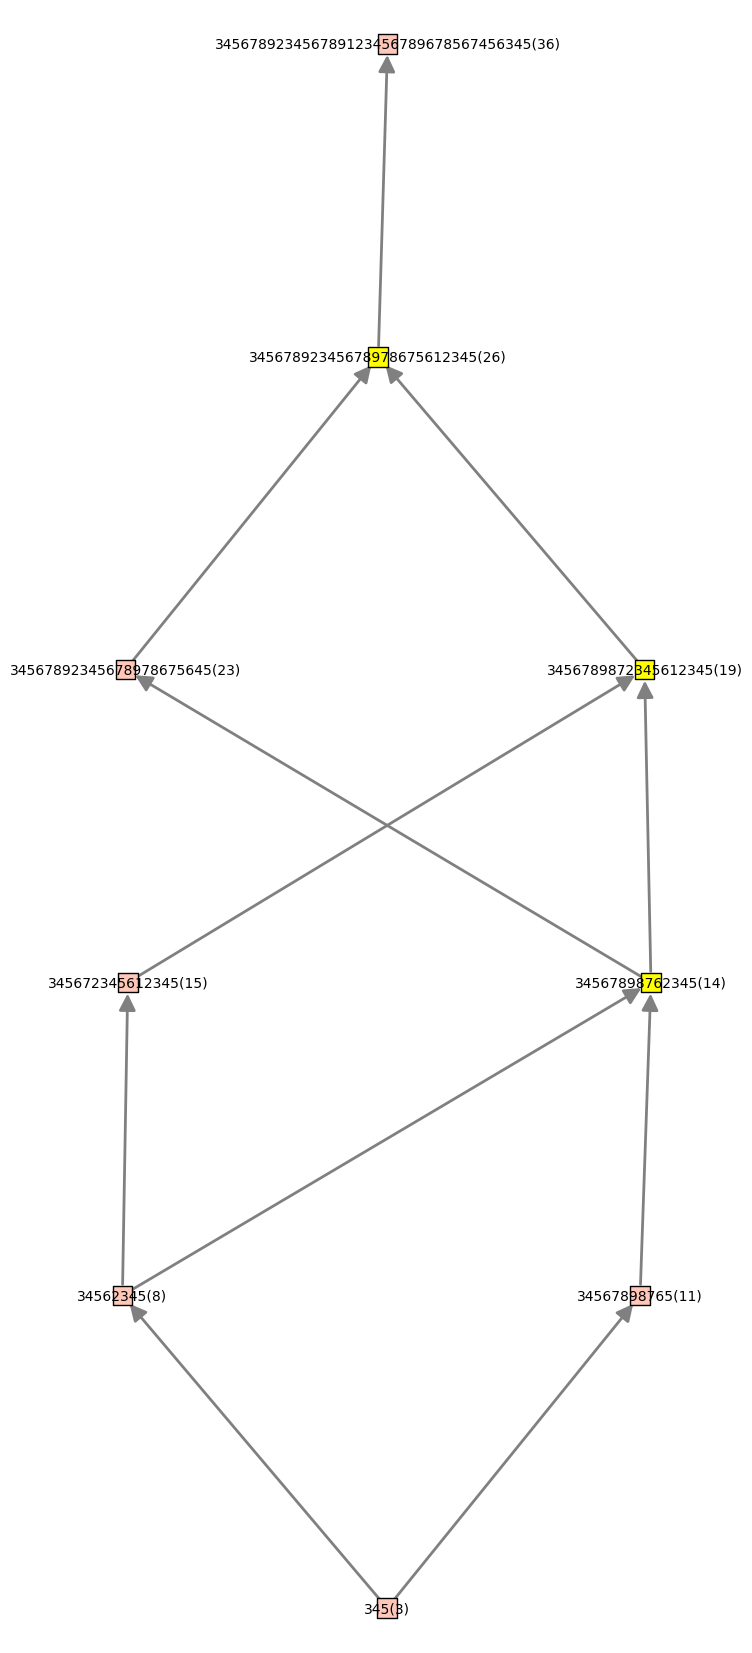

*************************


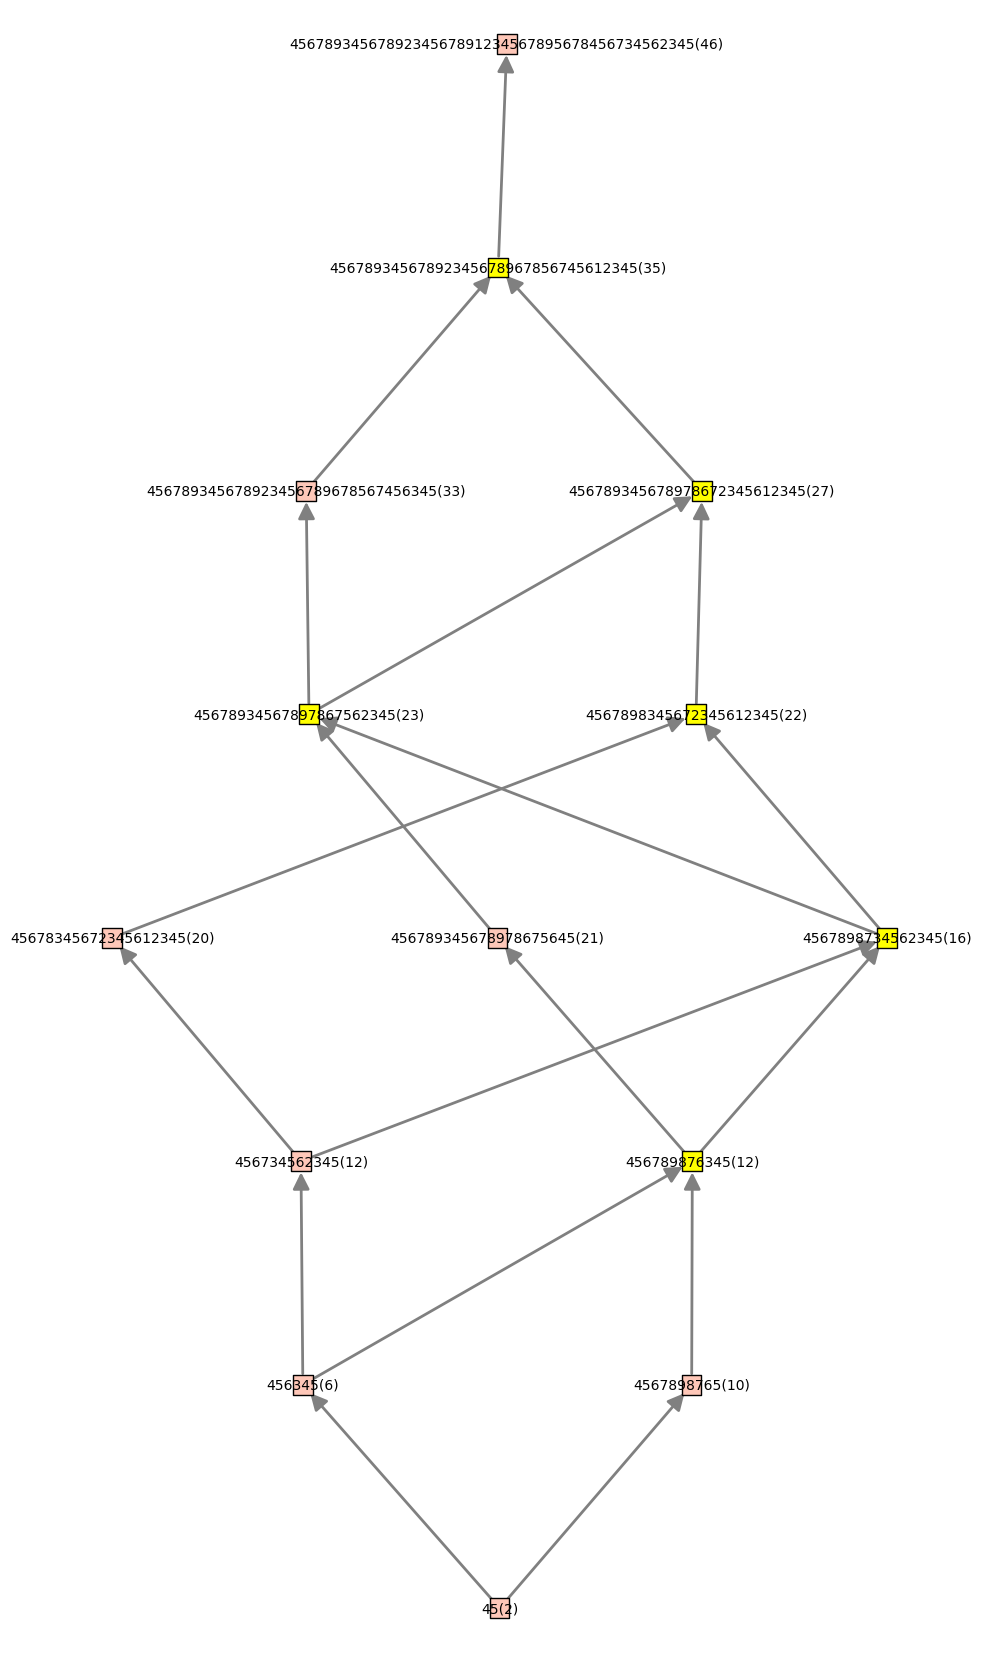

*************************


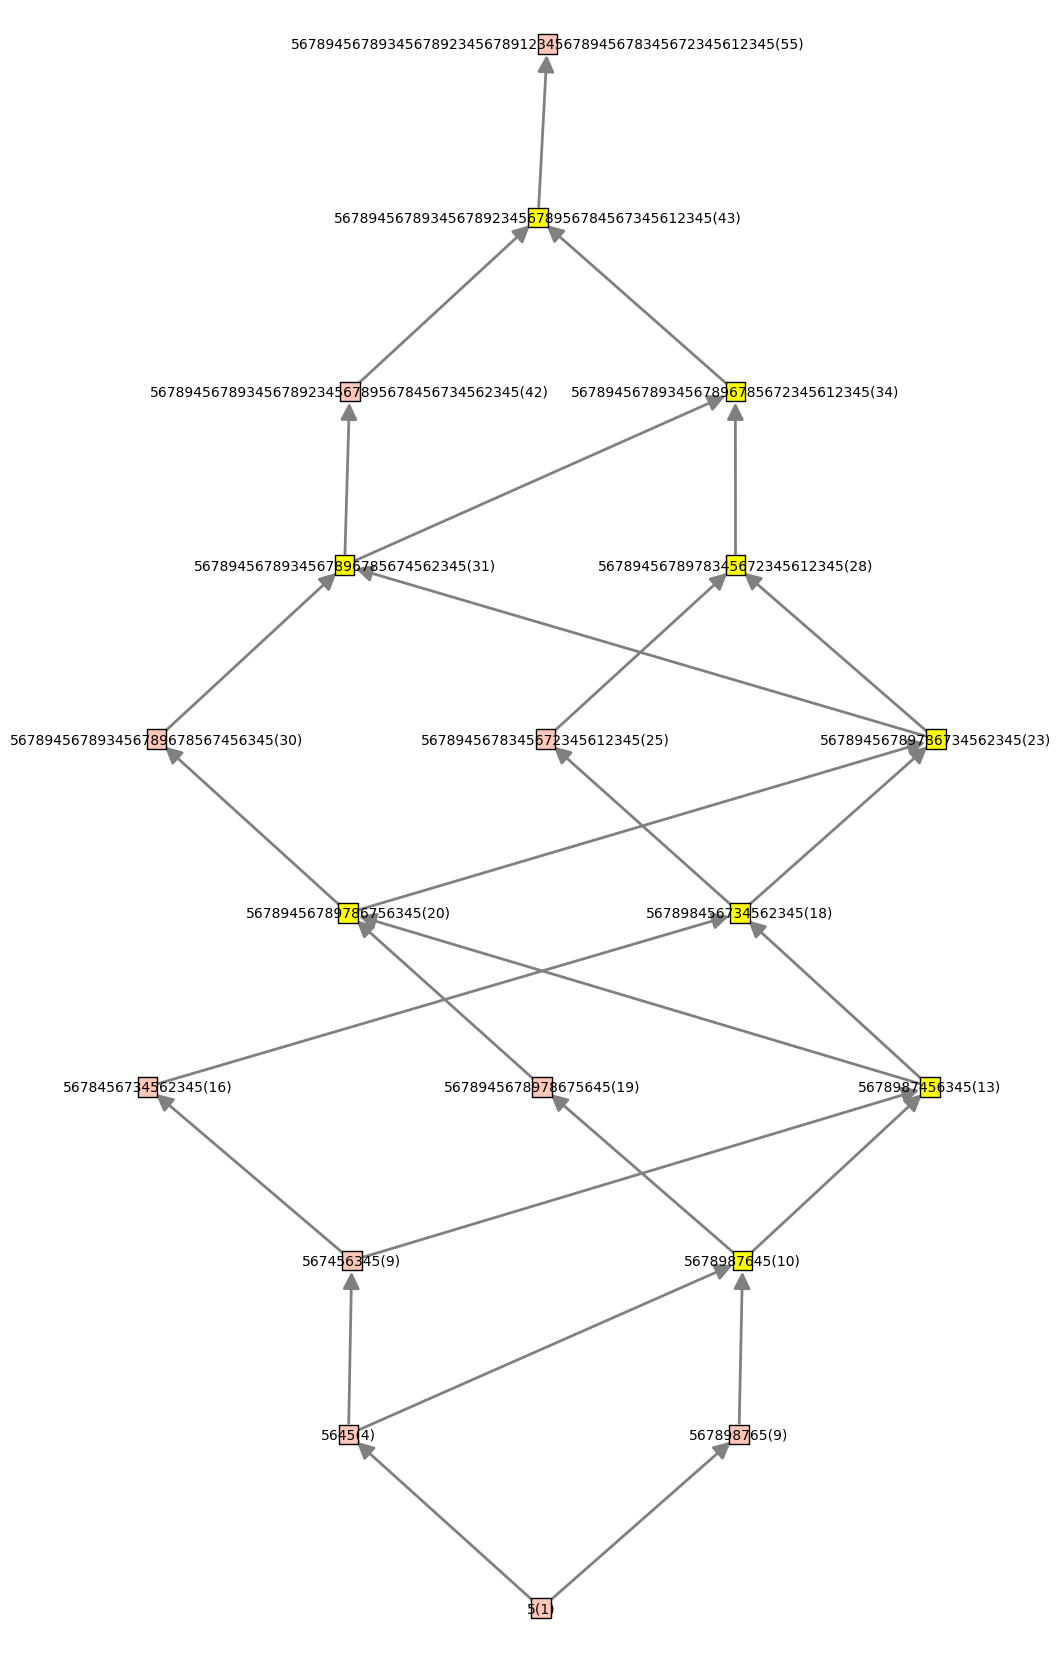

*************************


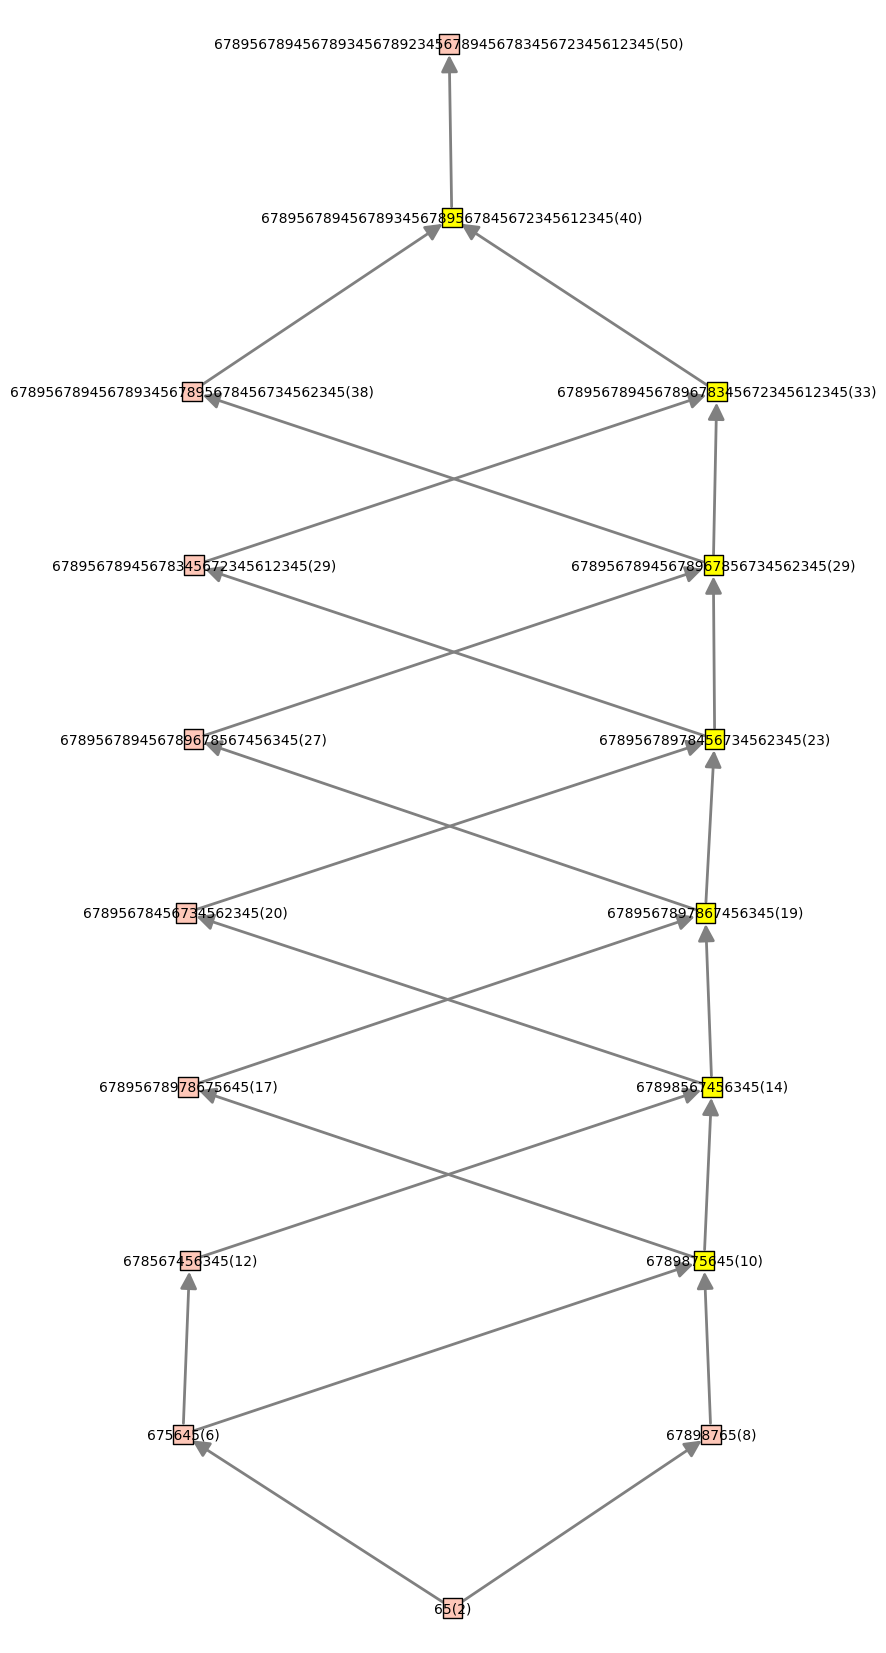

*************************


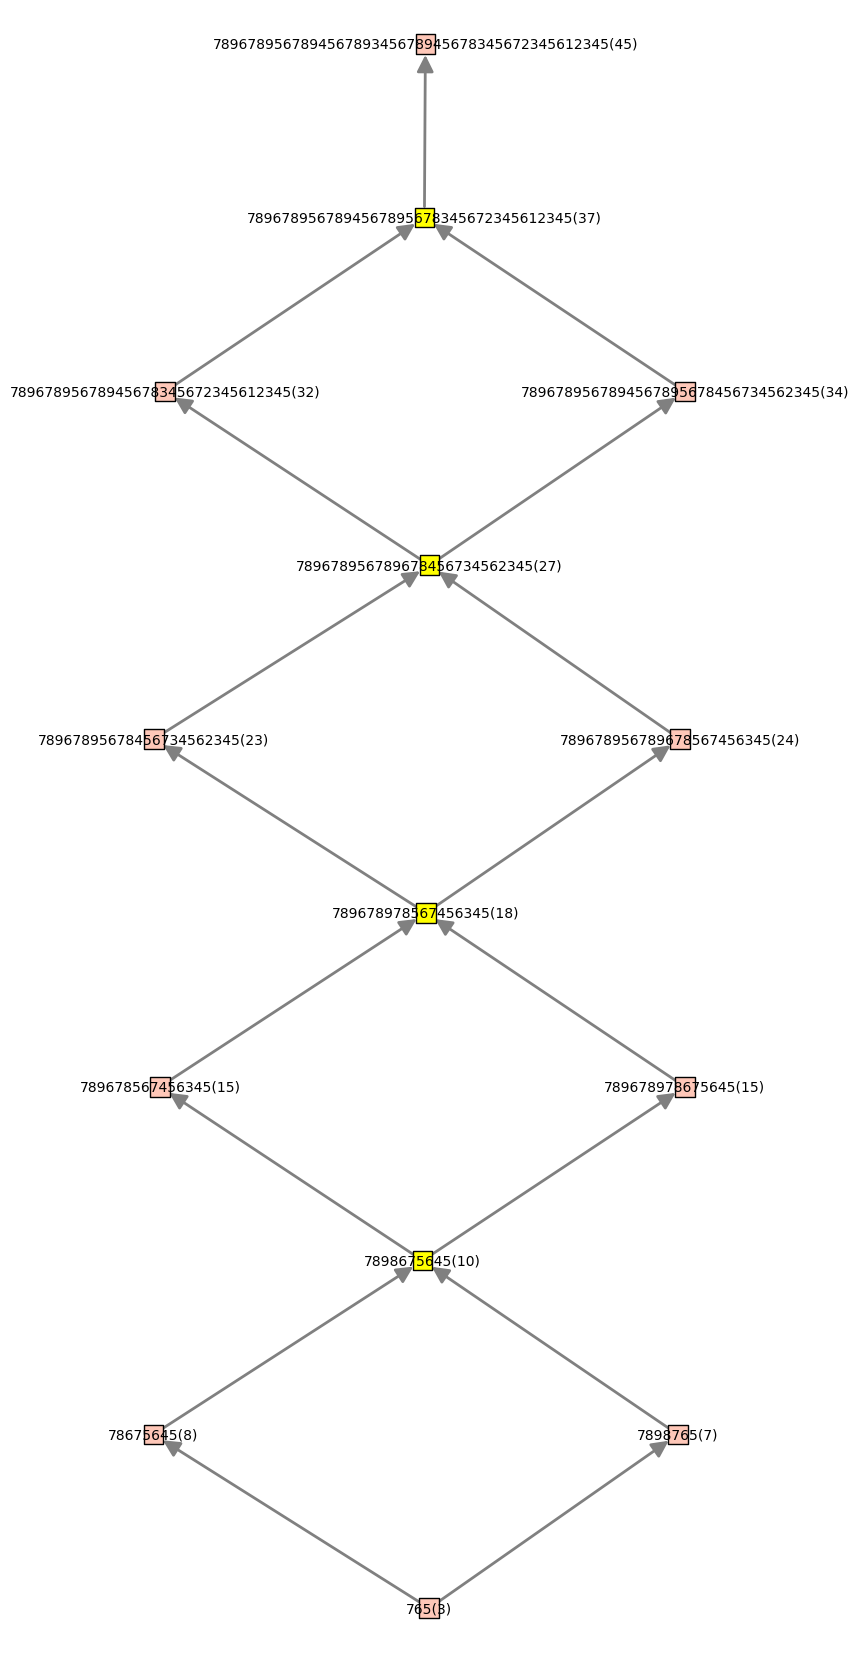

*************************


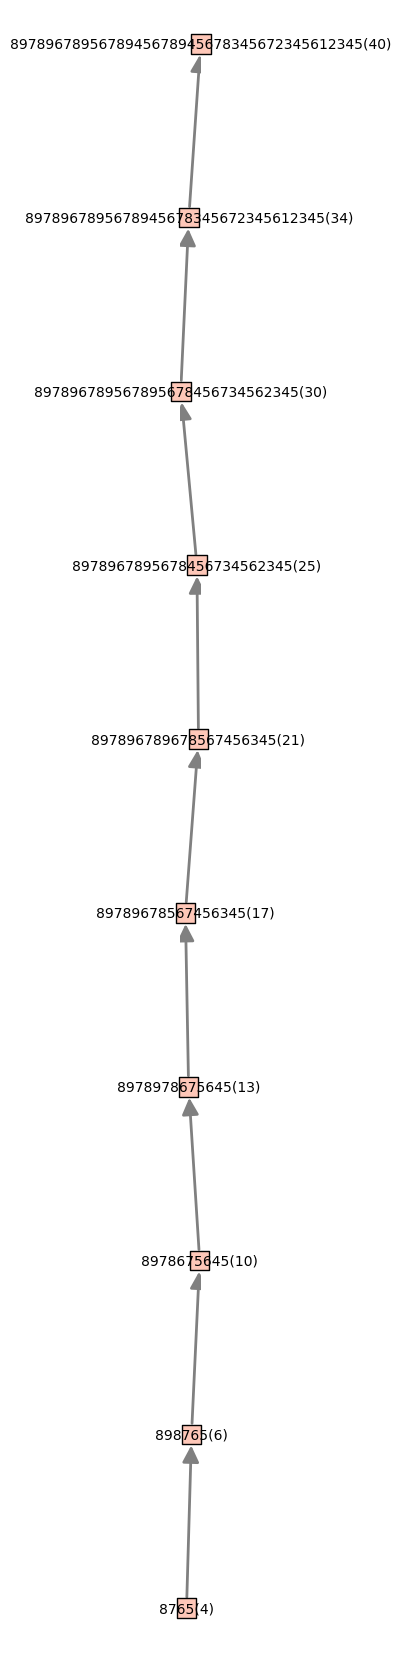

*************************


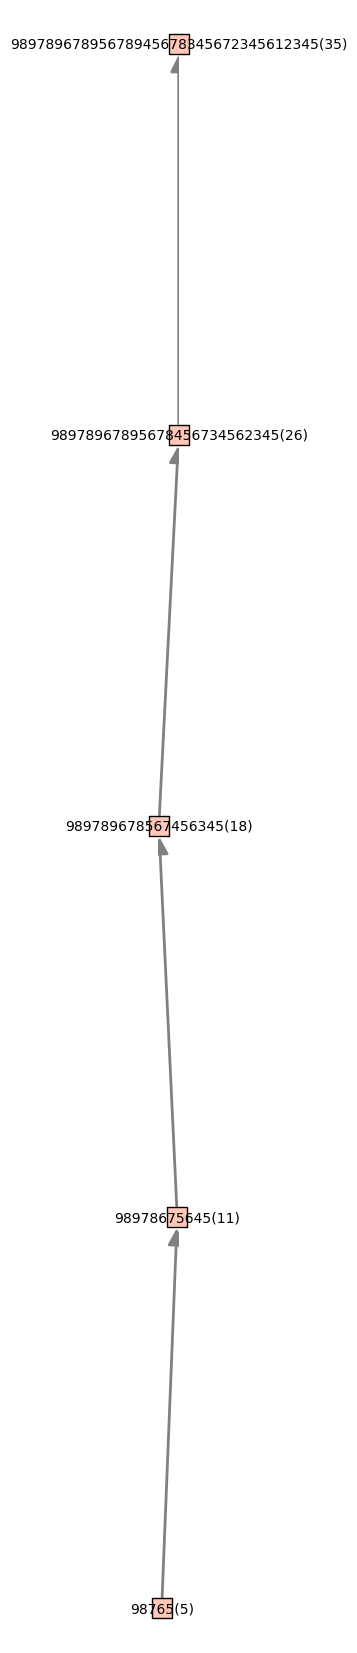

*************************


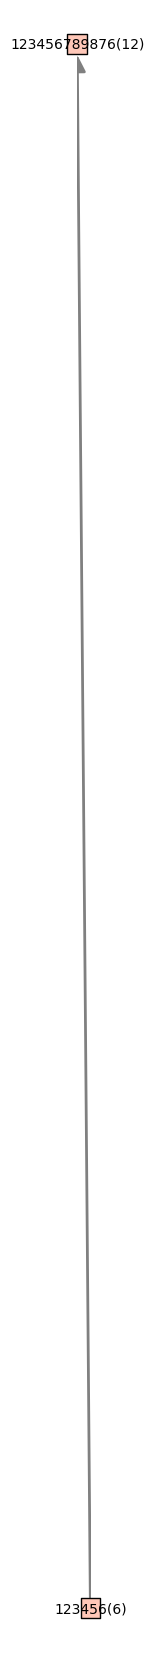

*************************


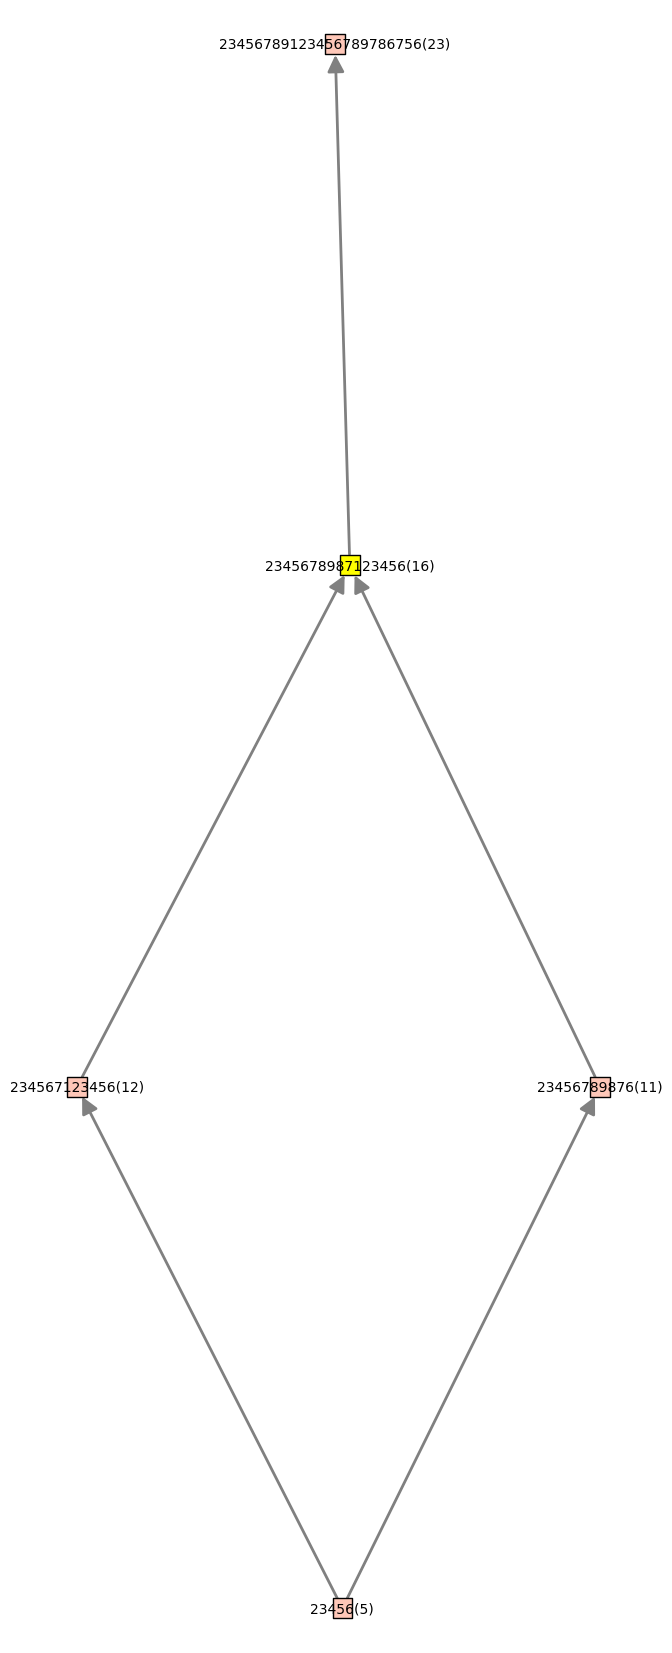

*************************


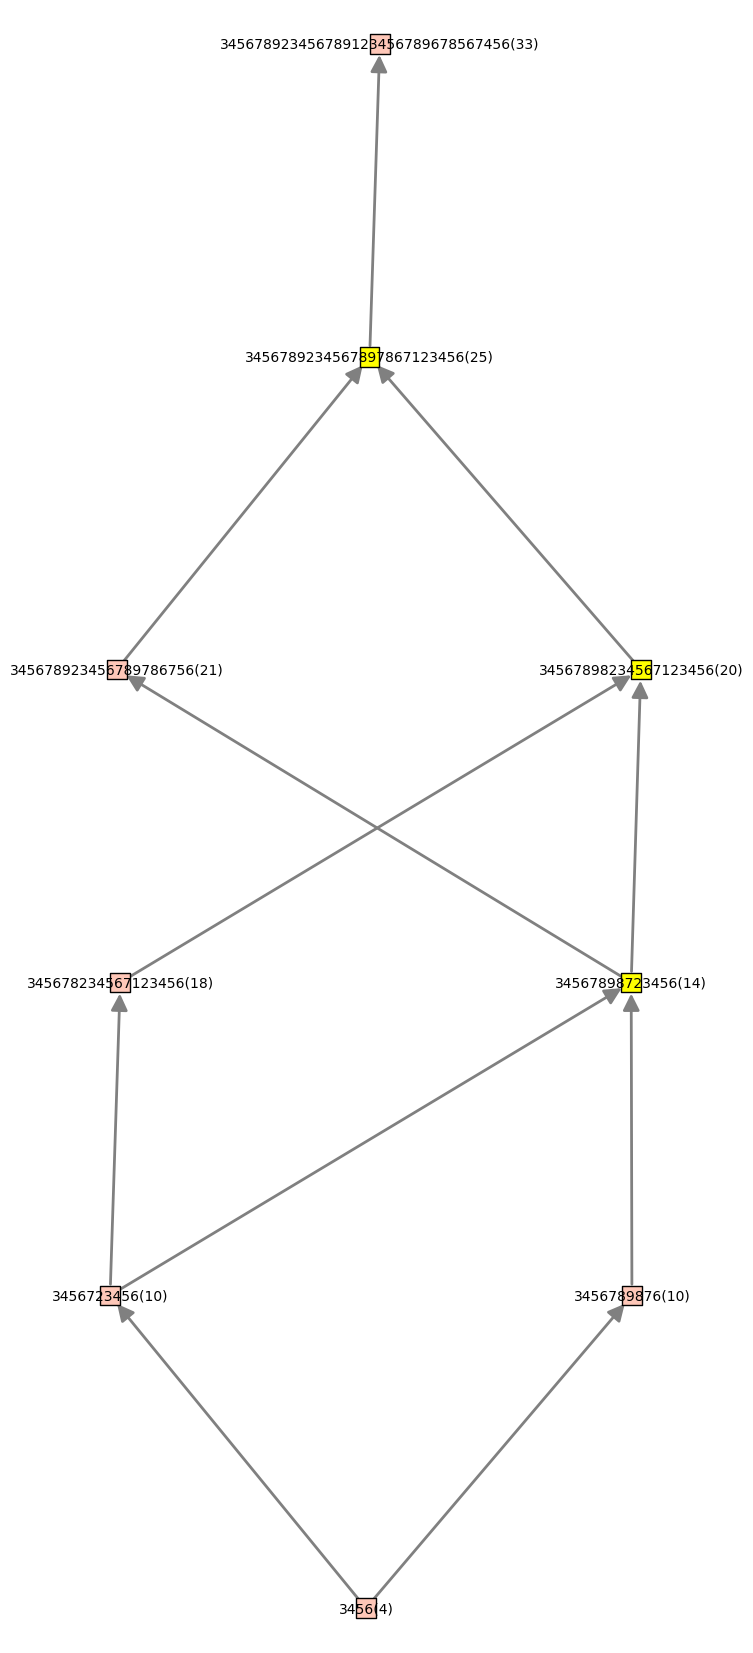

*************************


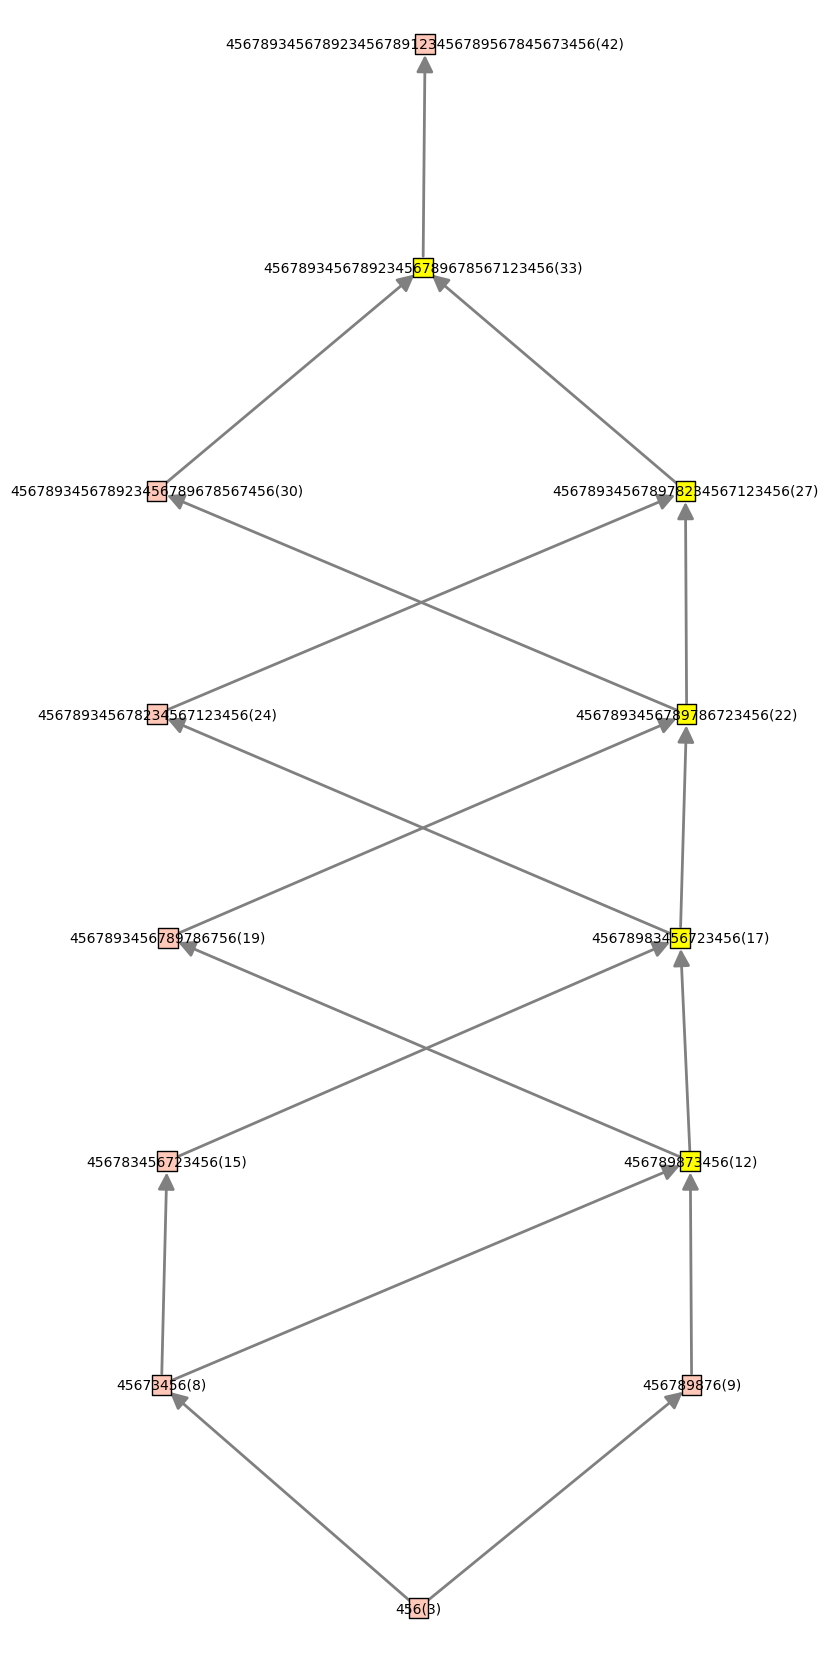

*************************


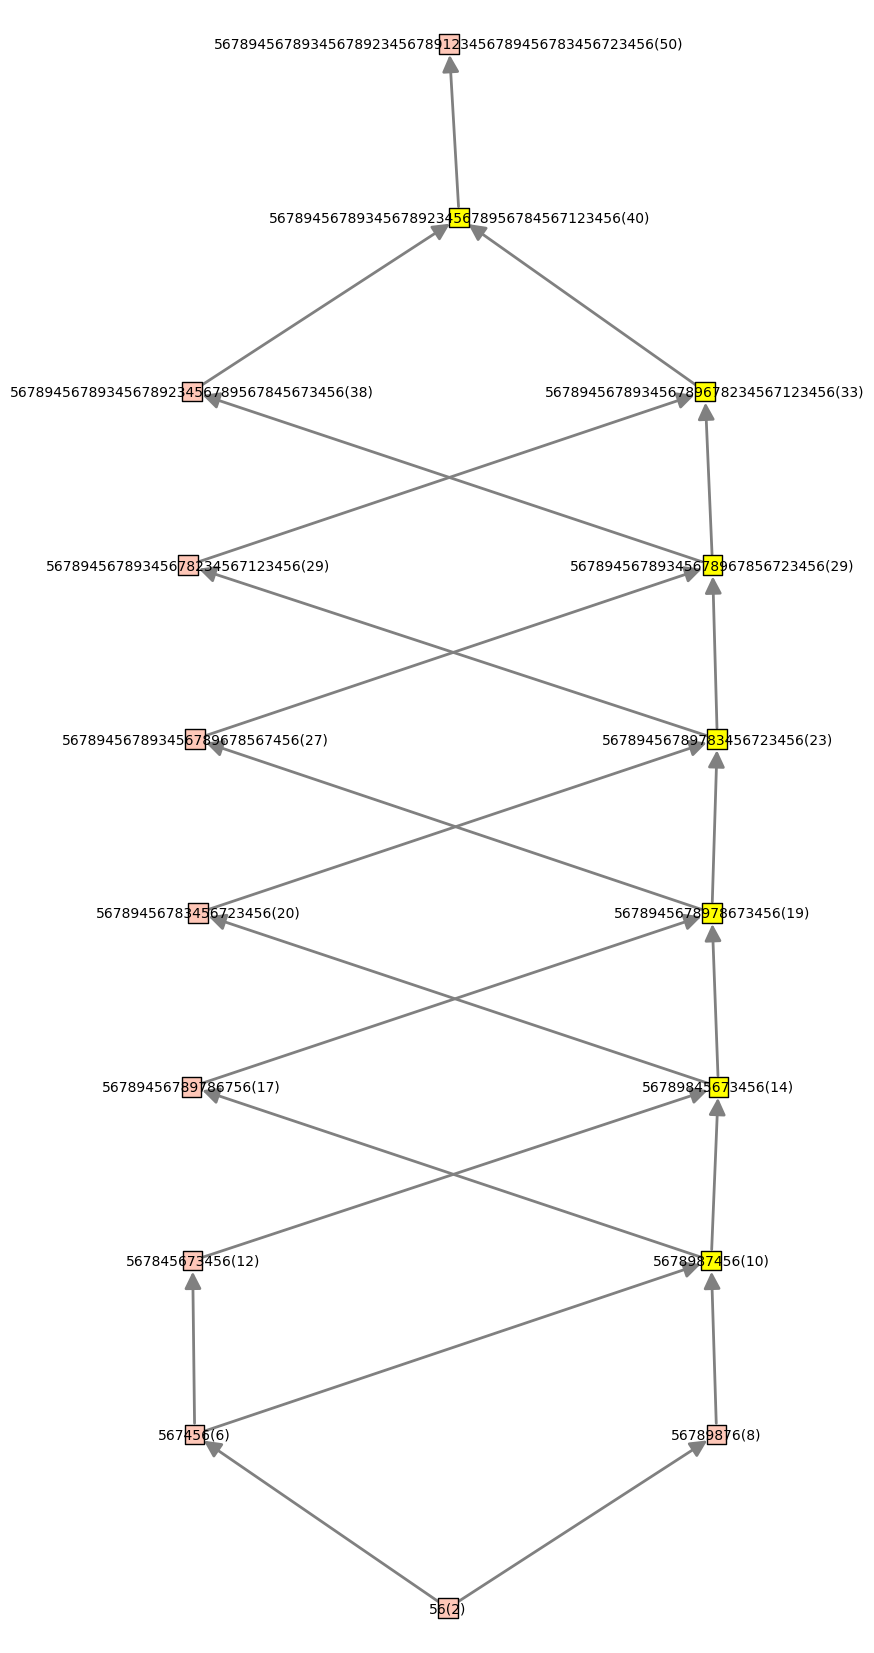

*************************


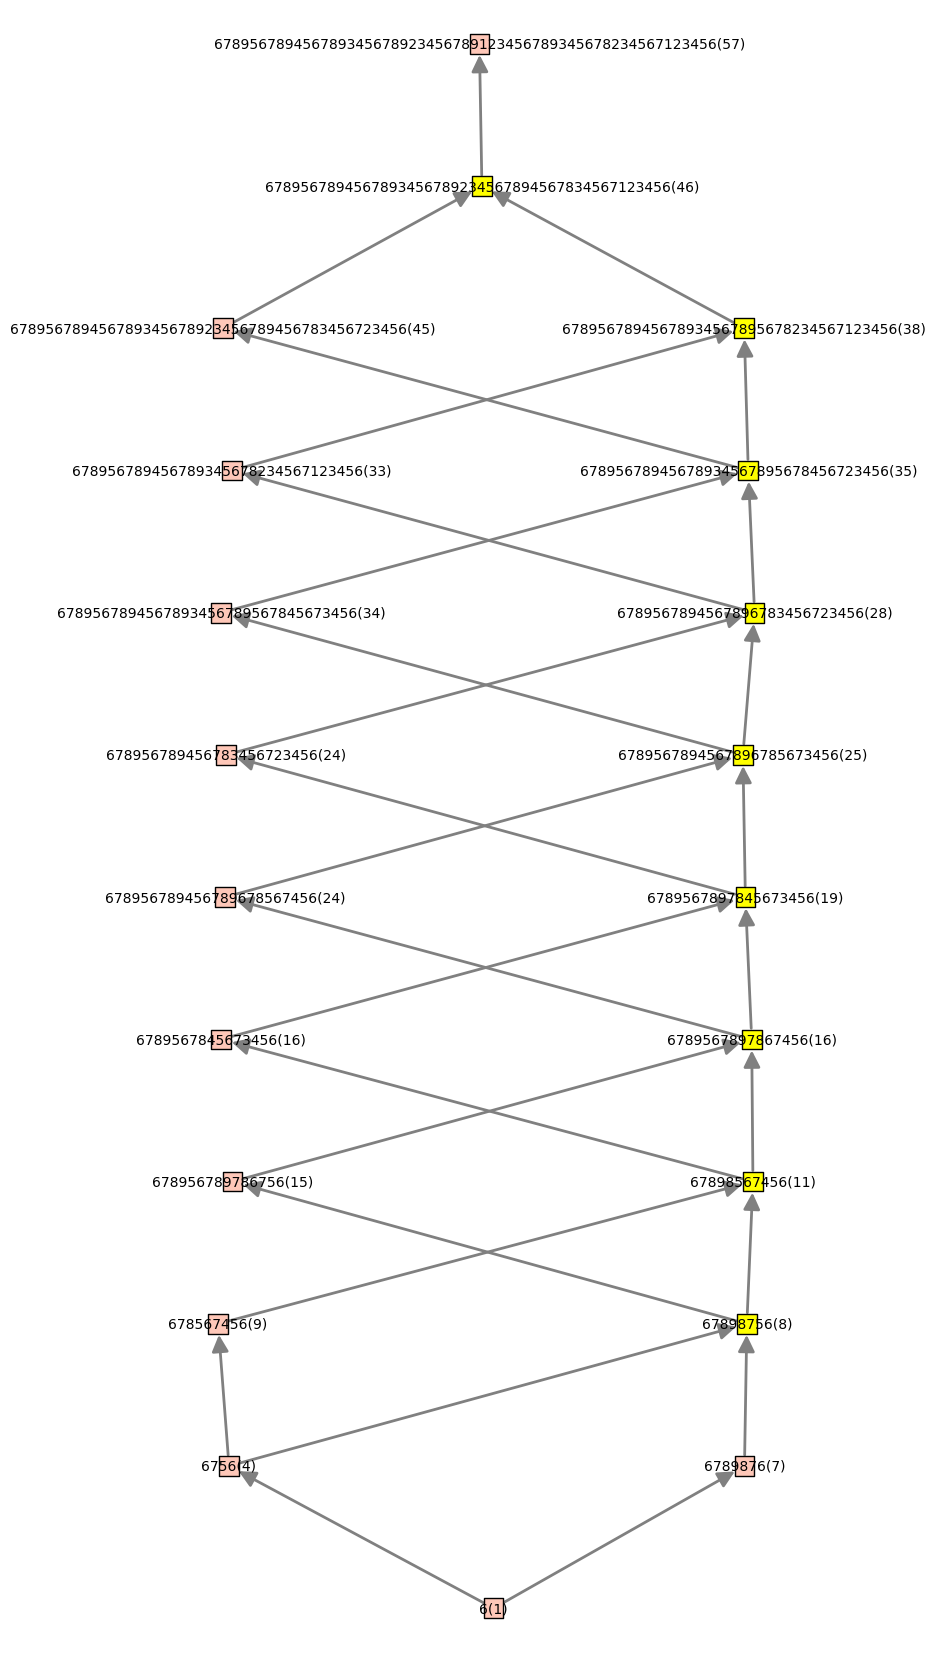

*************************


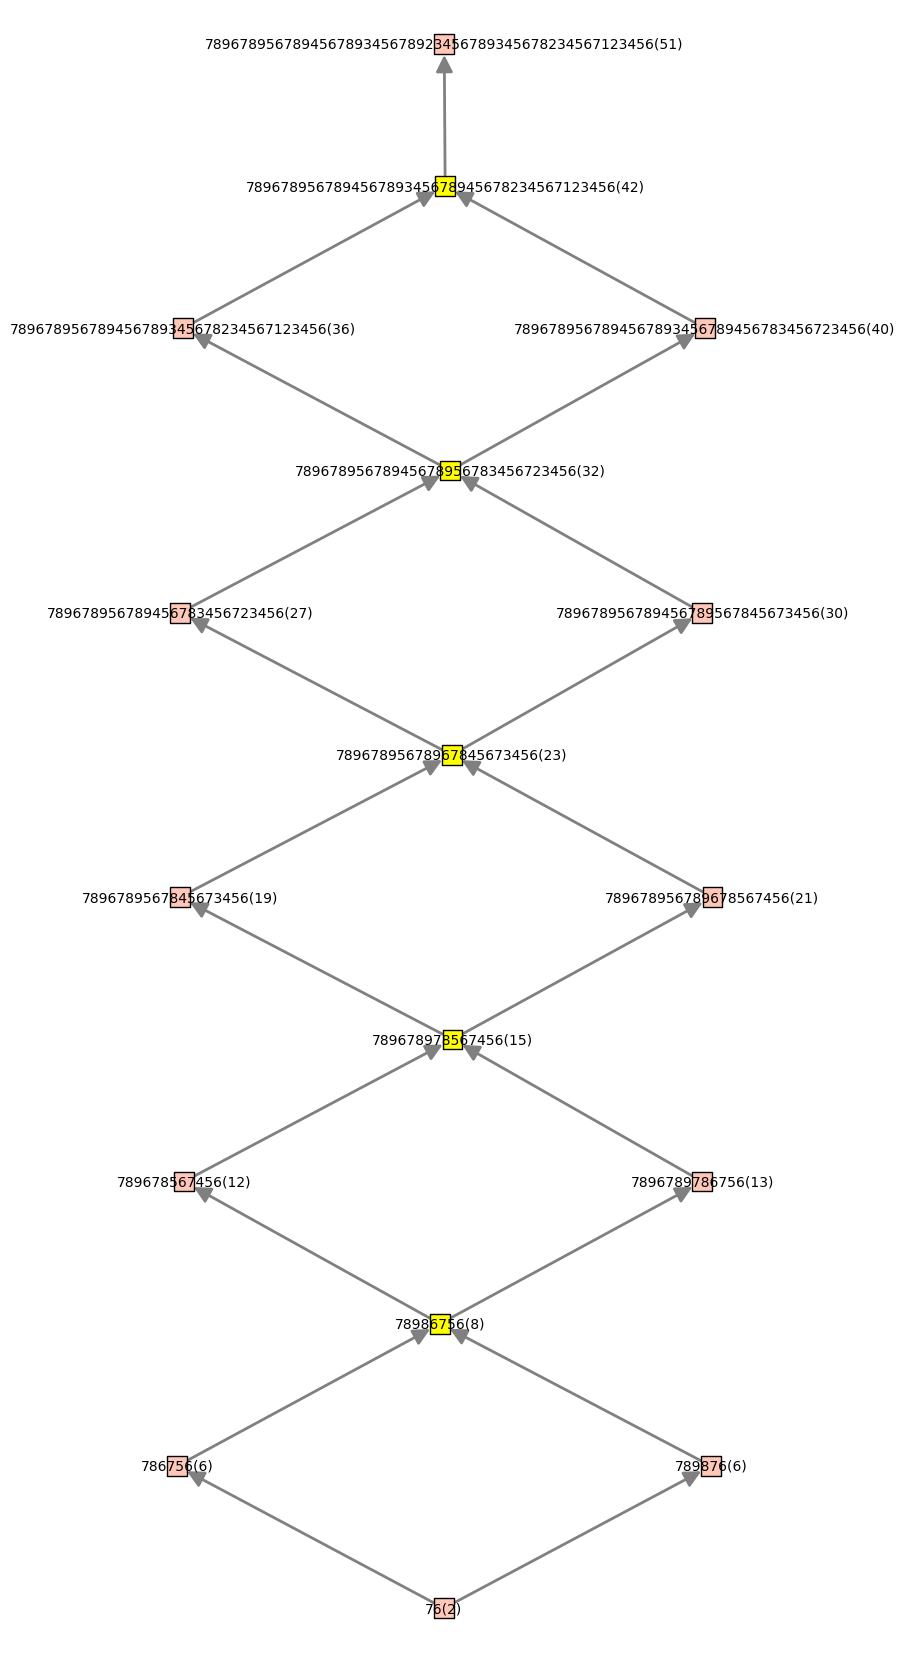

*************************


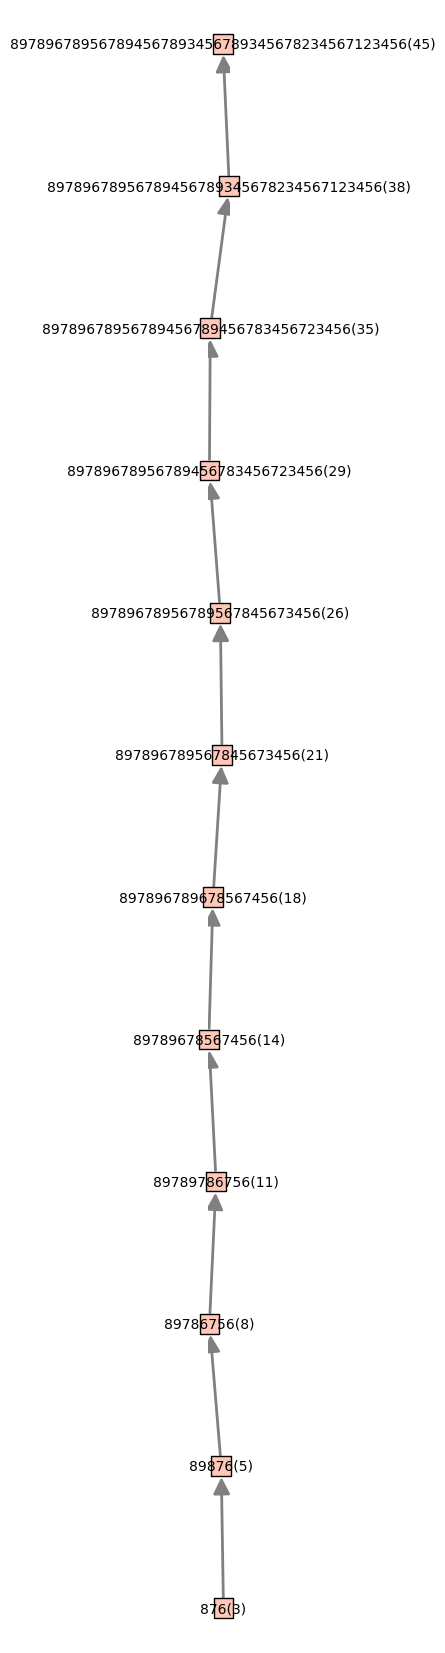

*************************


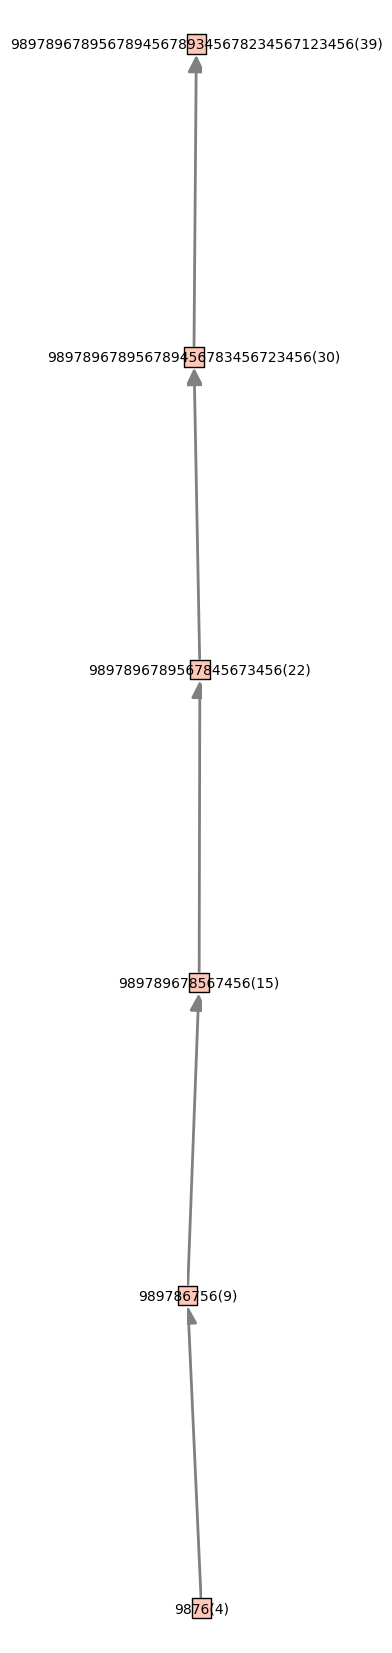

*************************


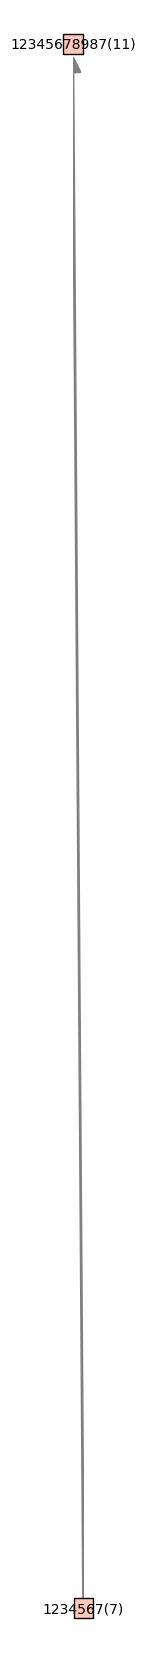

*************************


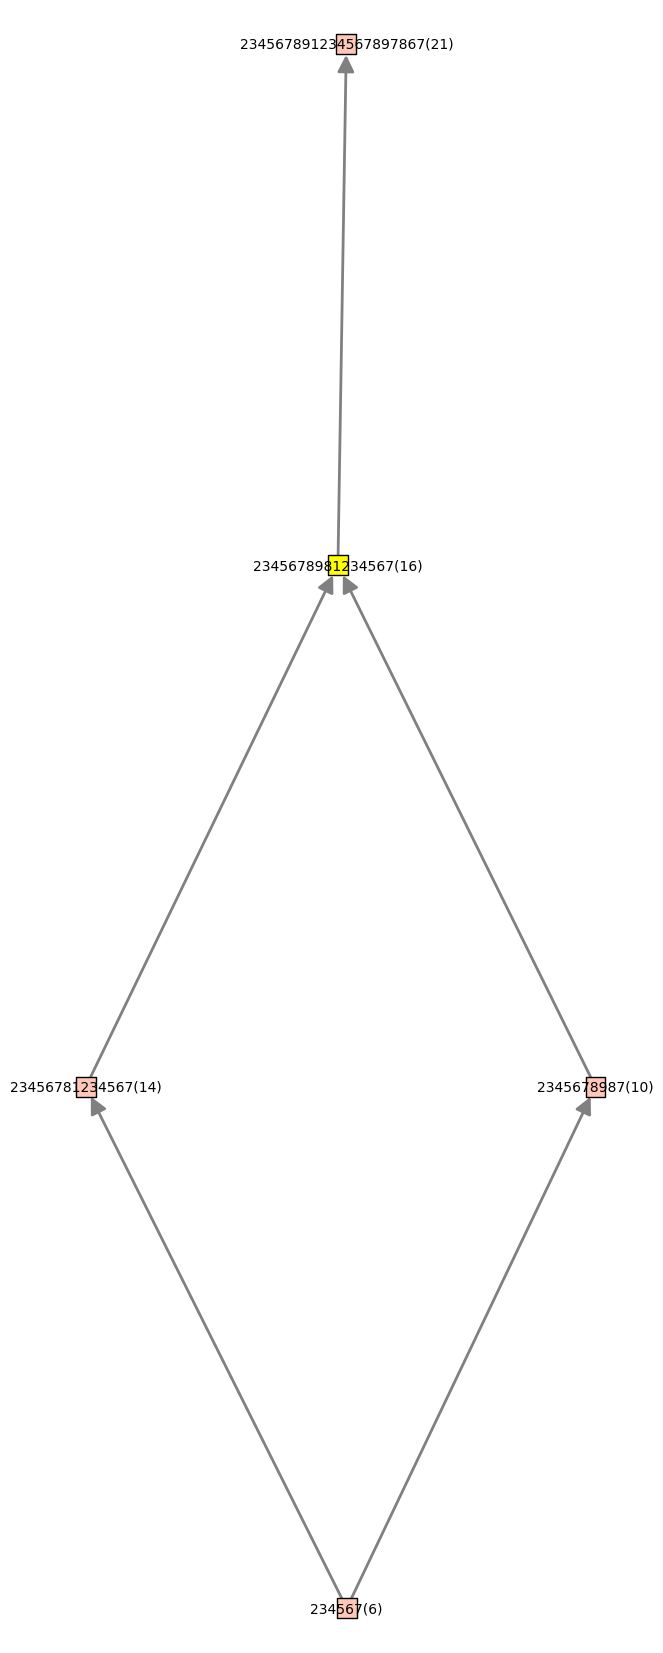

*************************


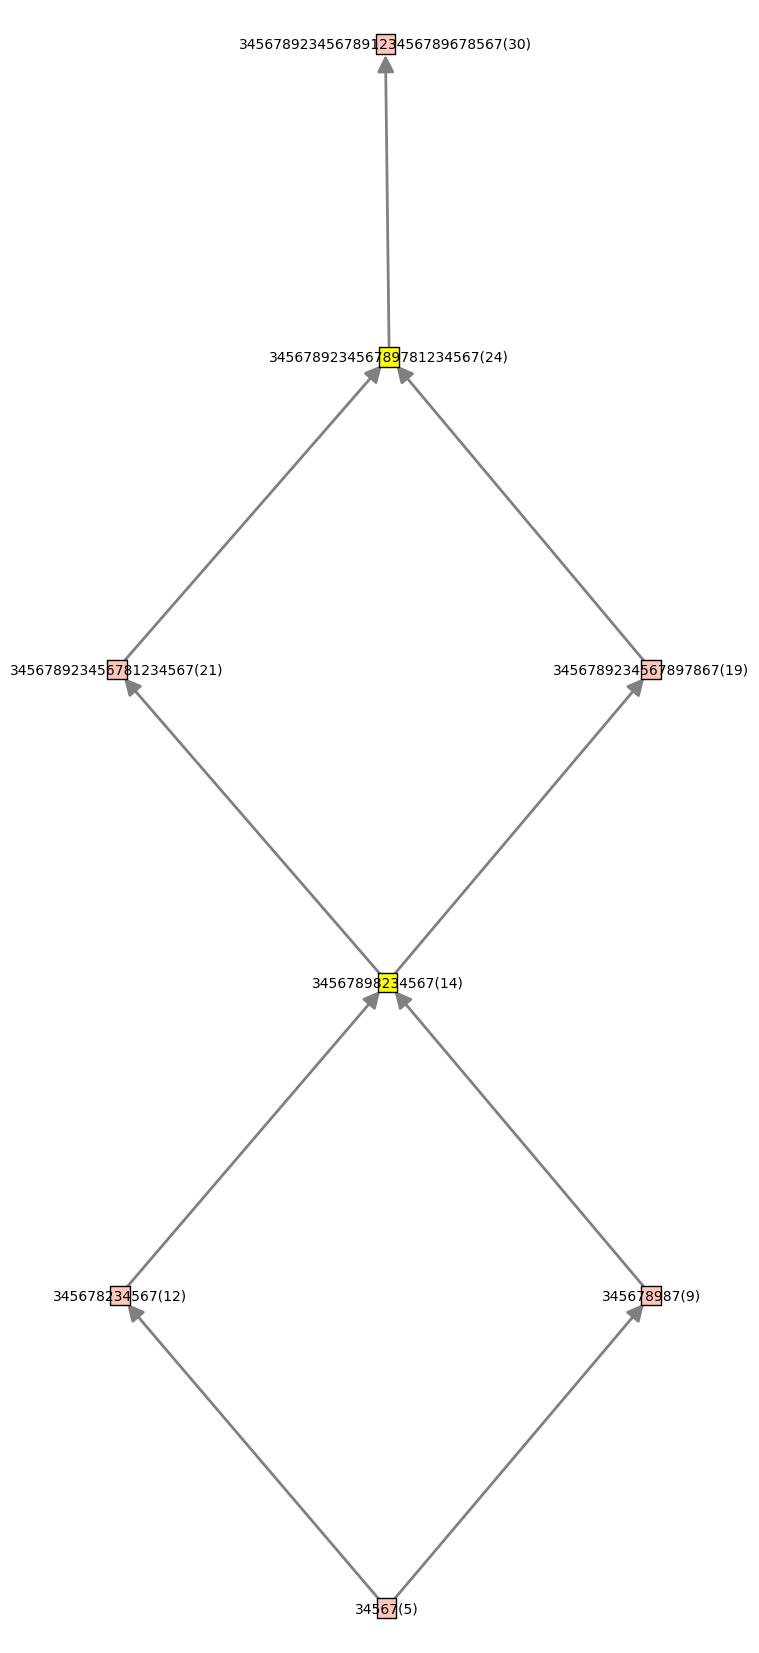

*************************


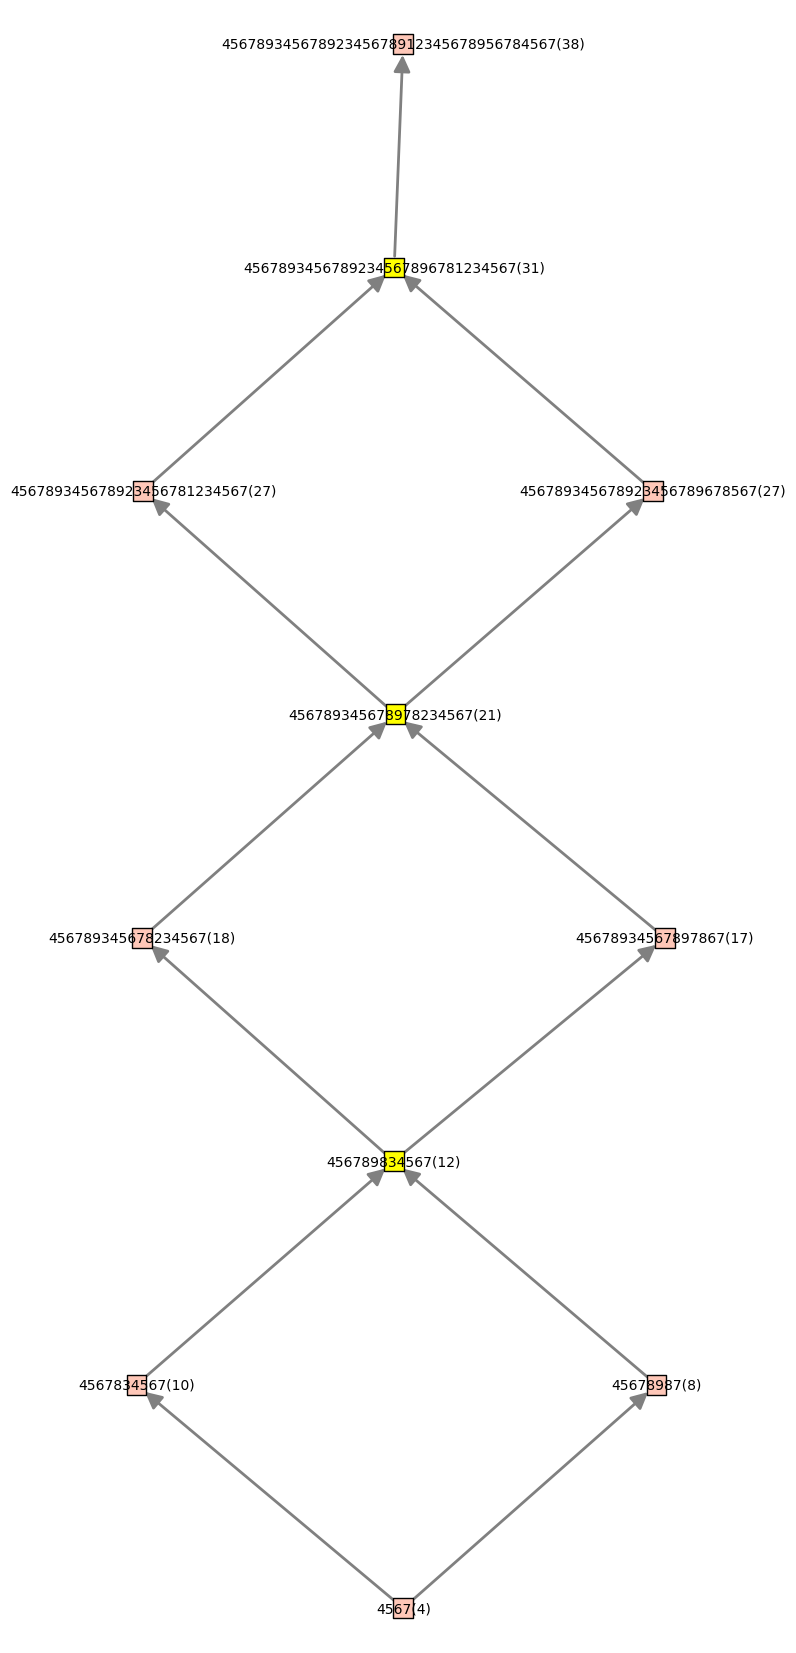

*************************


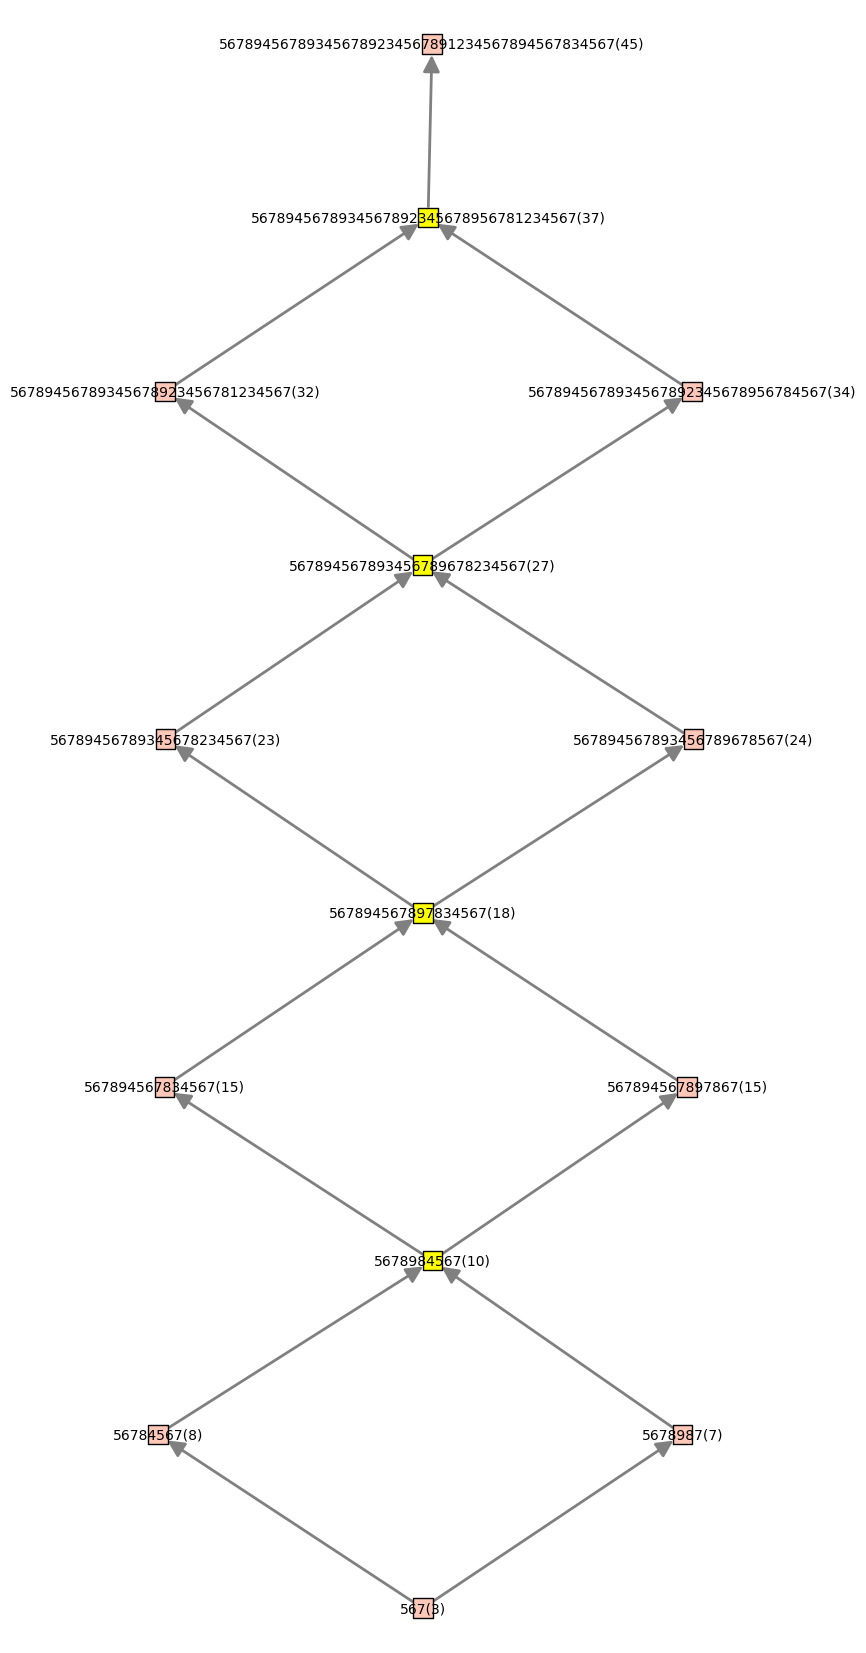

*************************


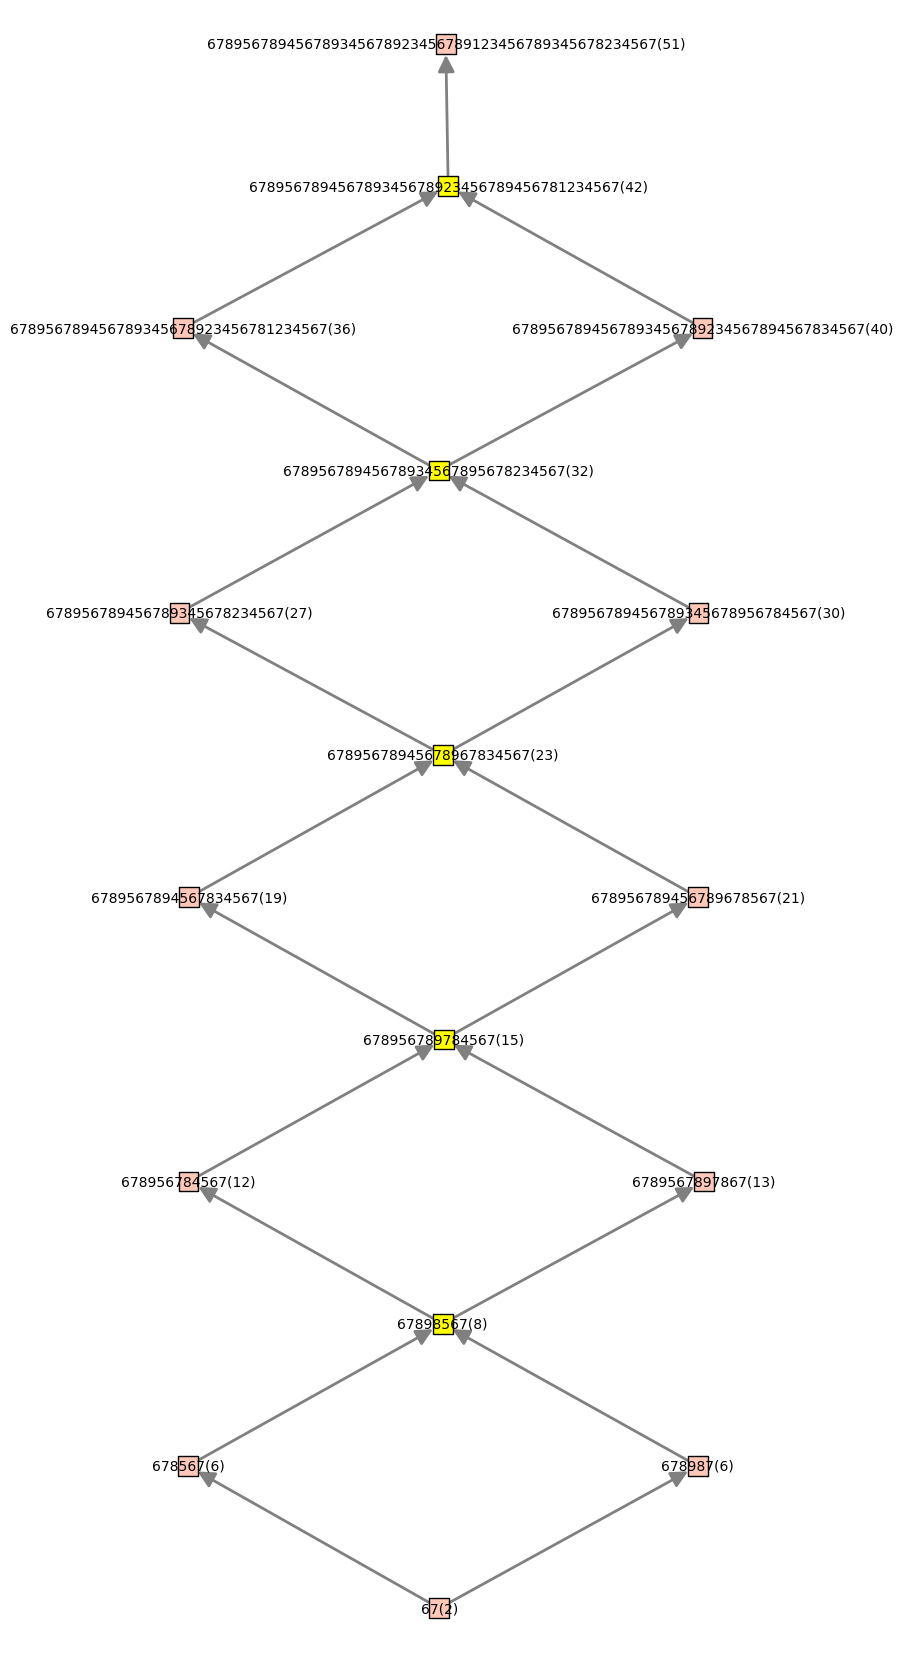

*************************


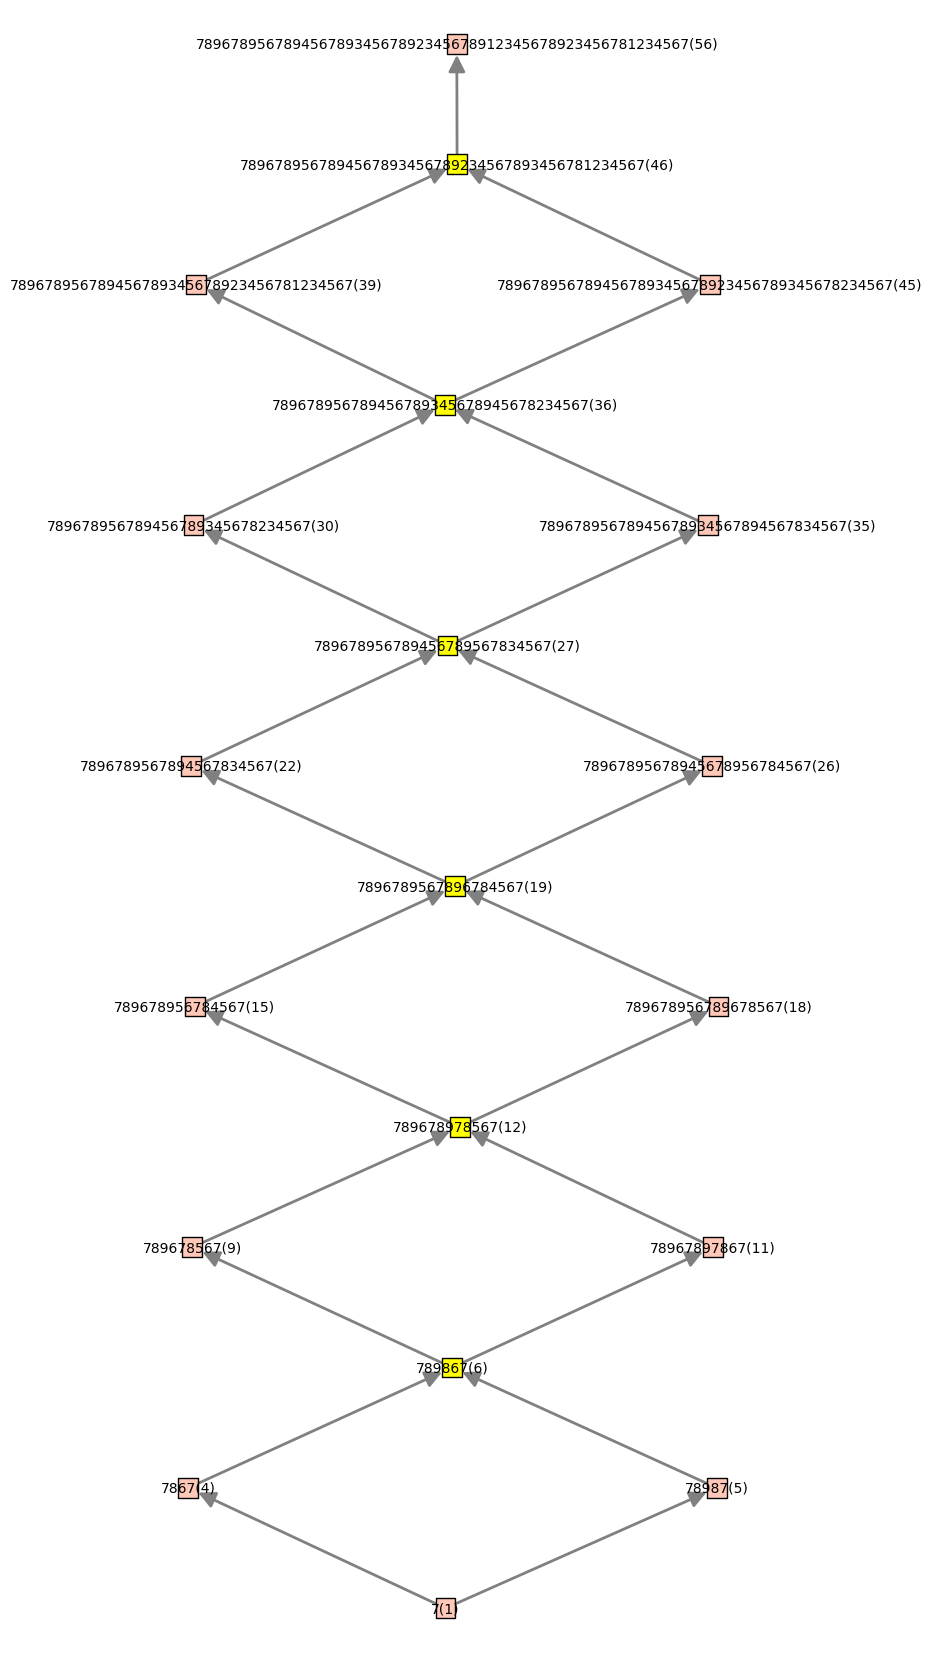

*************************


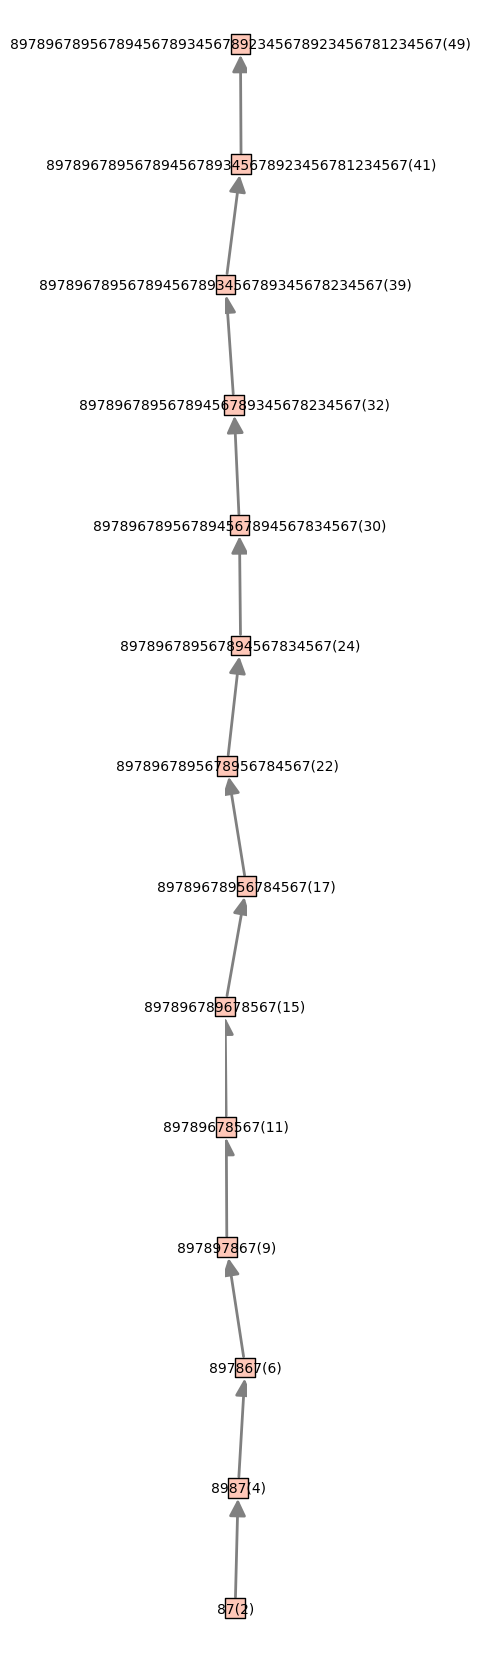

*************************


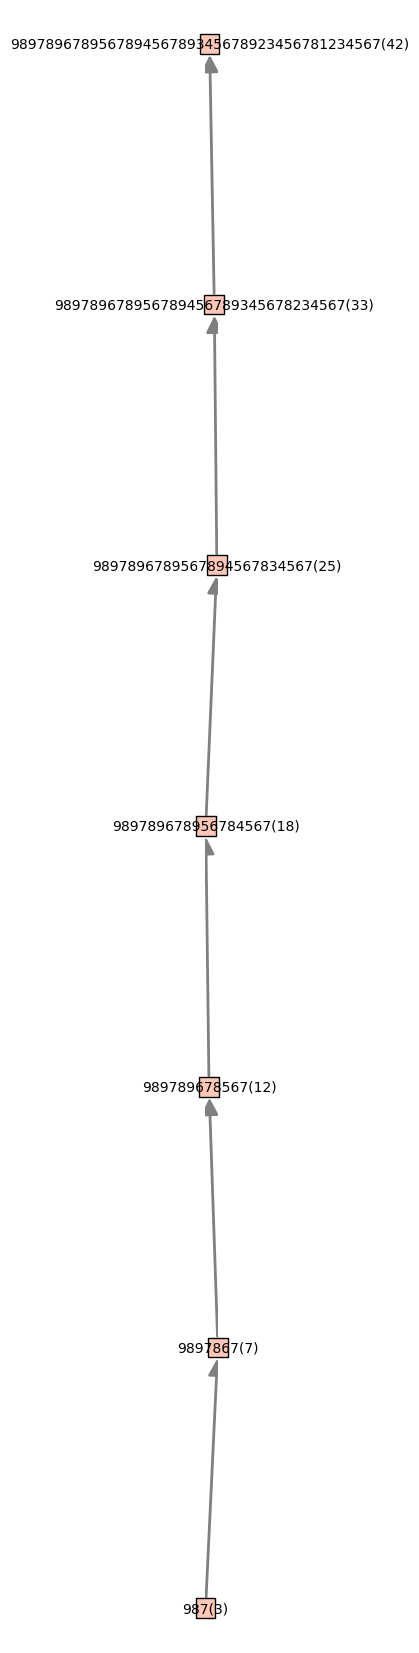

*************************


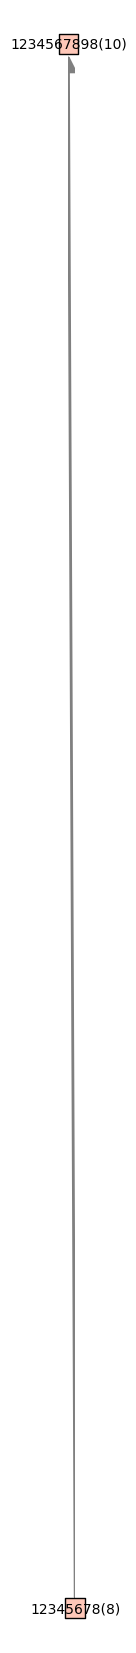

*************************


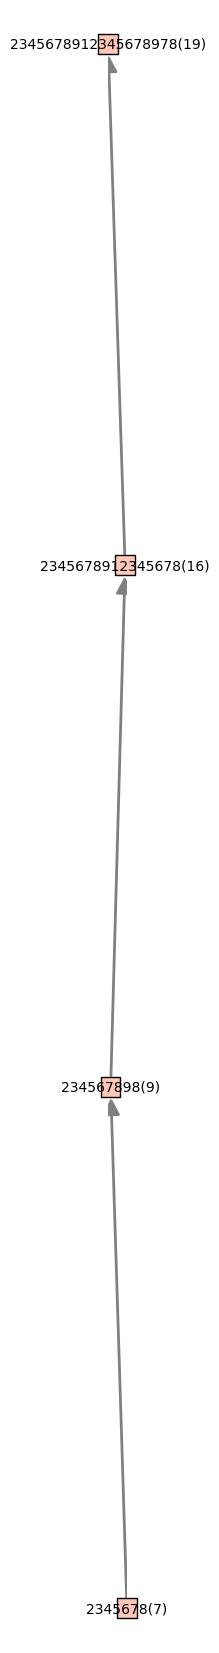

*************************


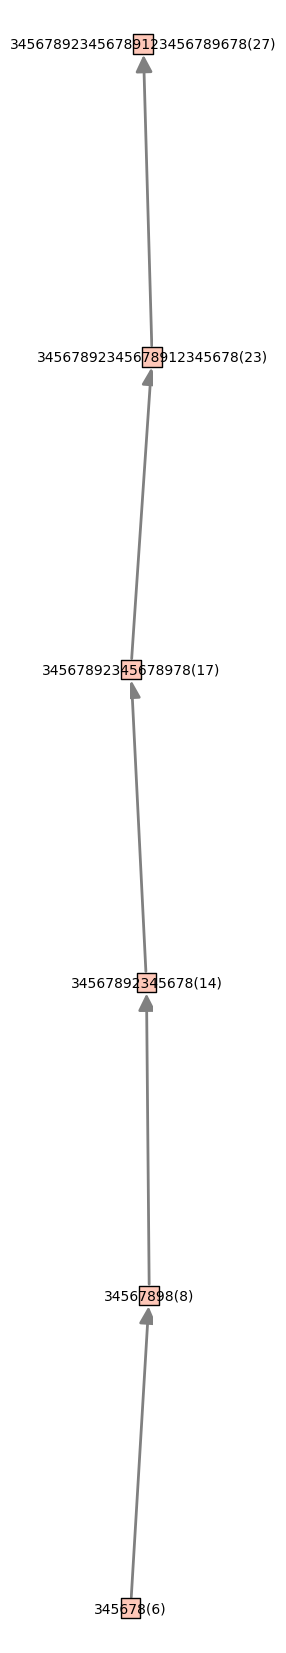

*************************


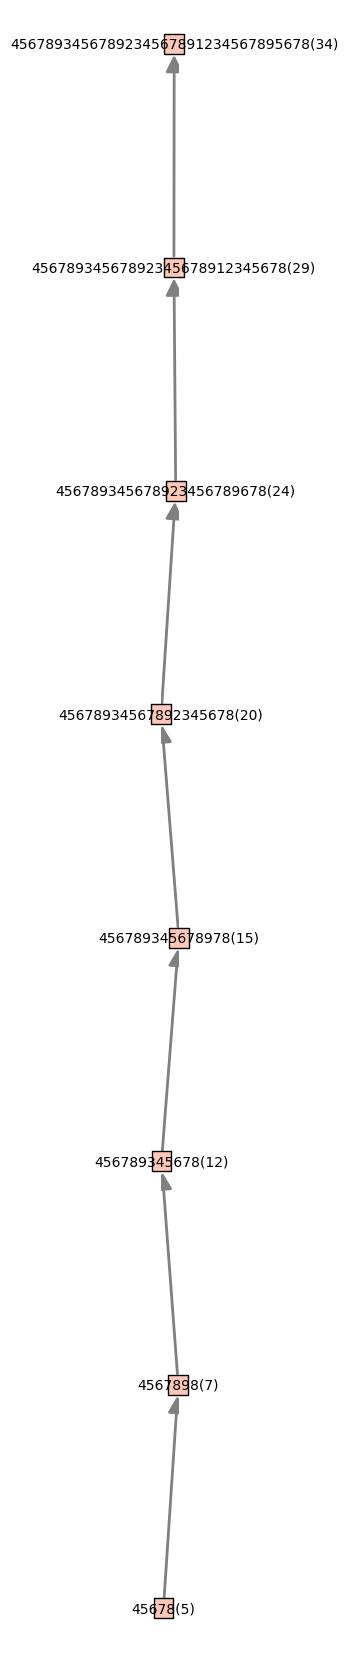

*************************


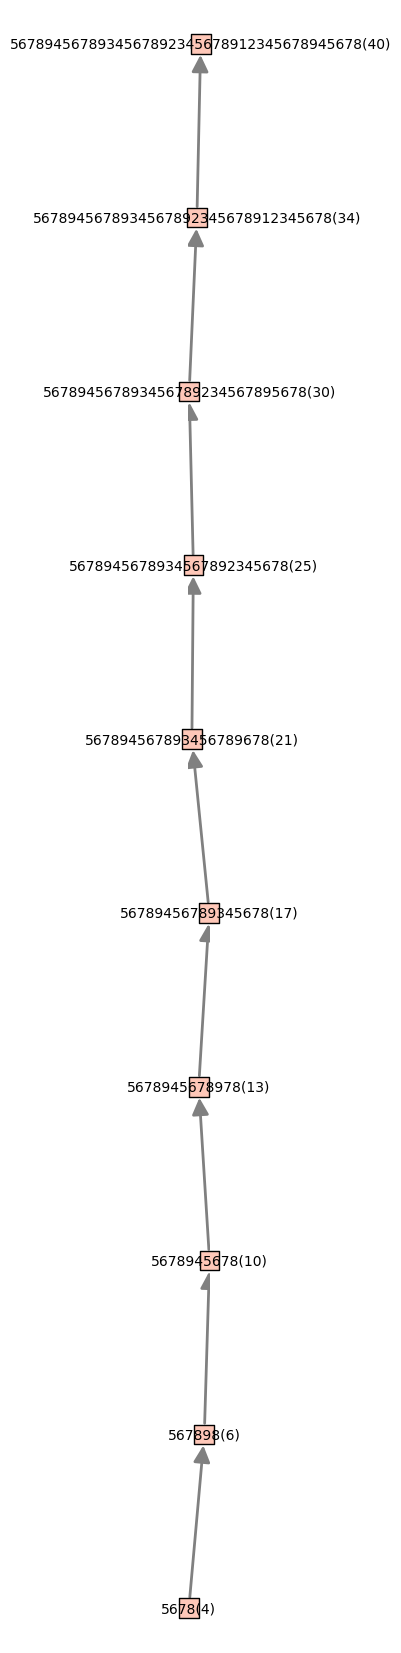

*************************


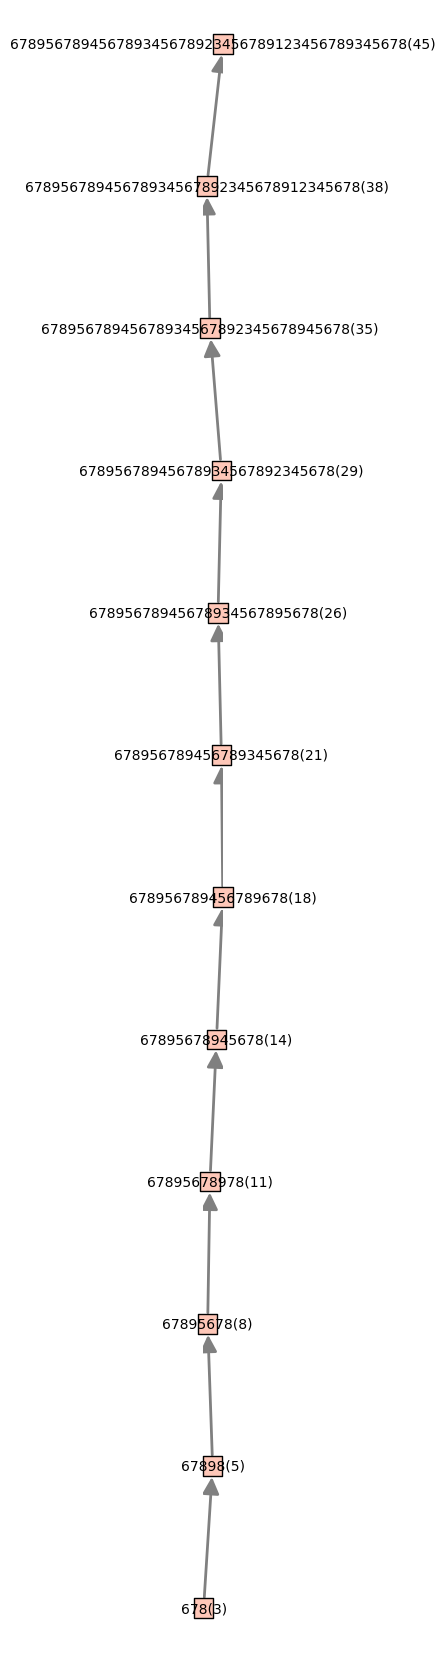

*************************


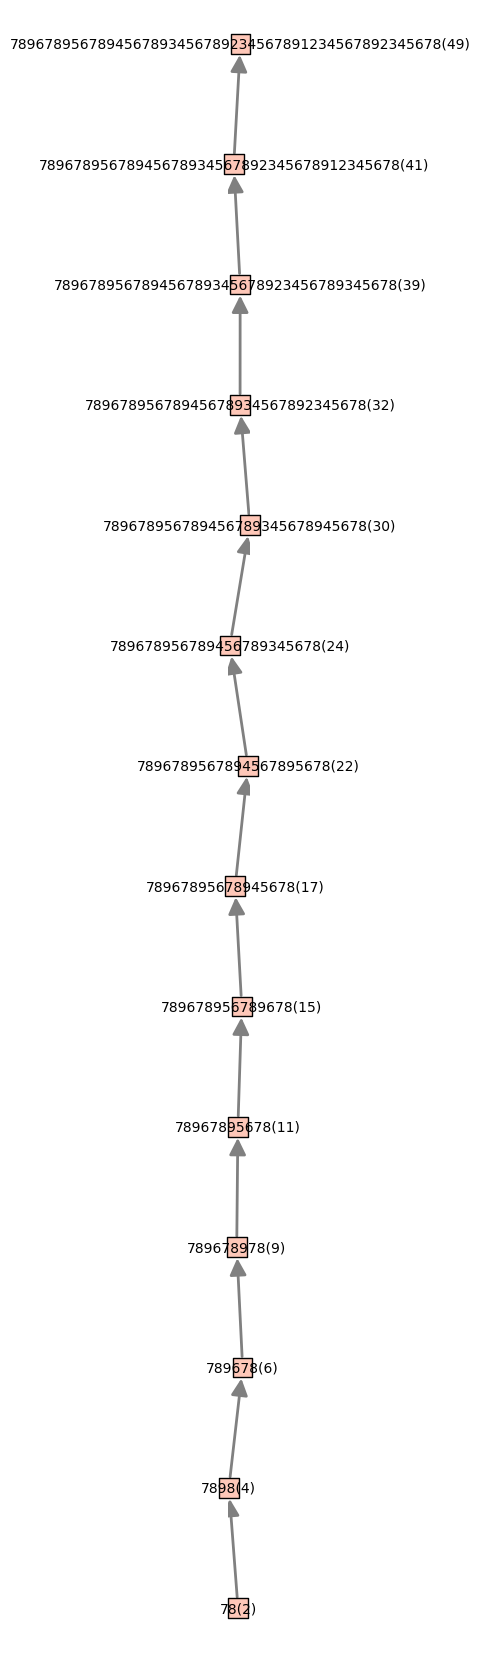

*************************


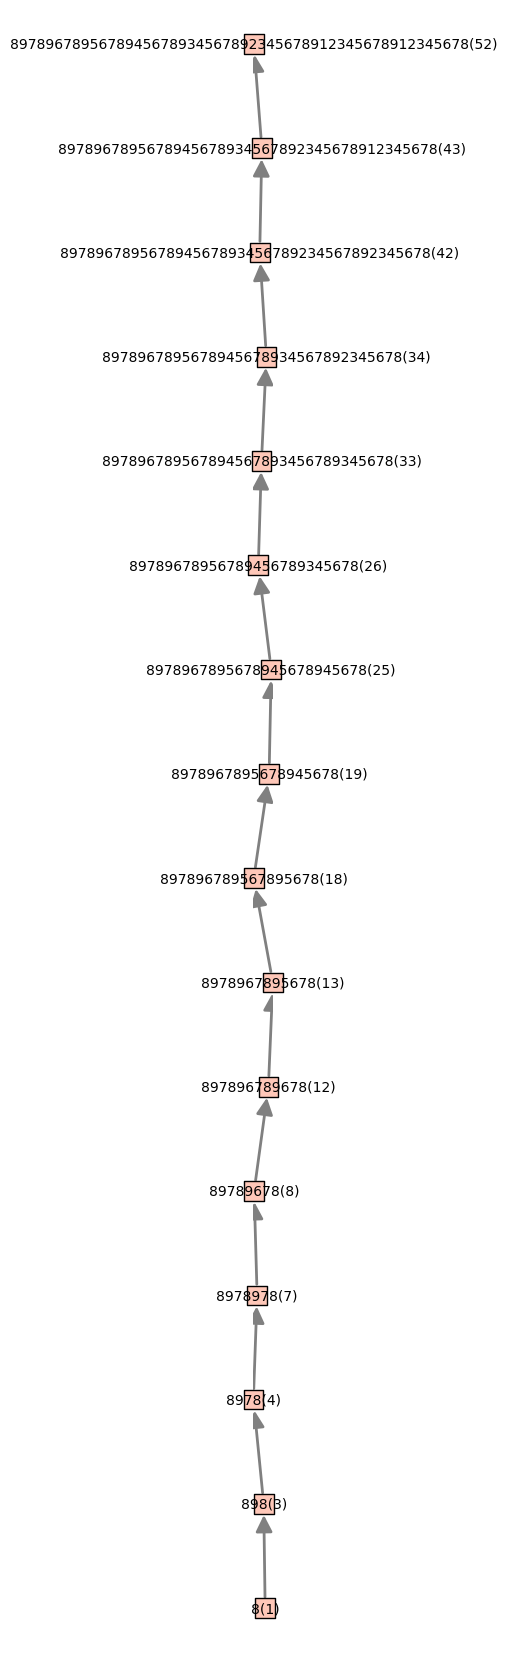

*************************


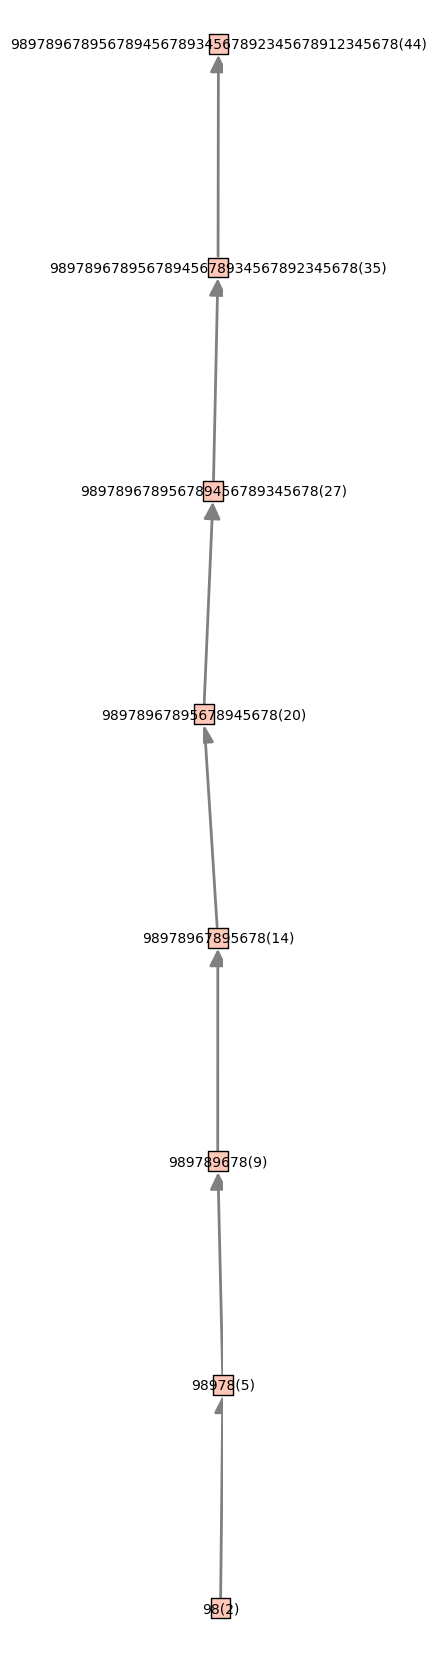

*************************


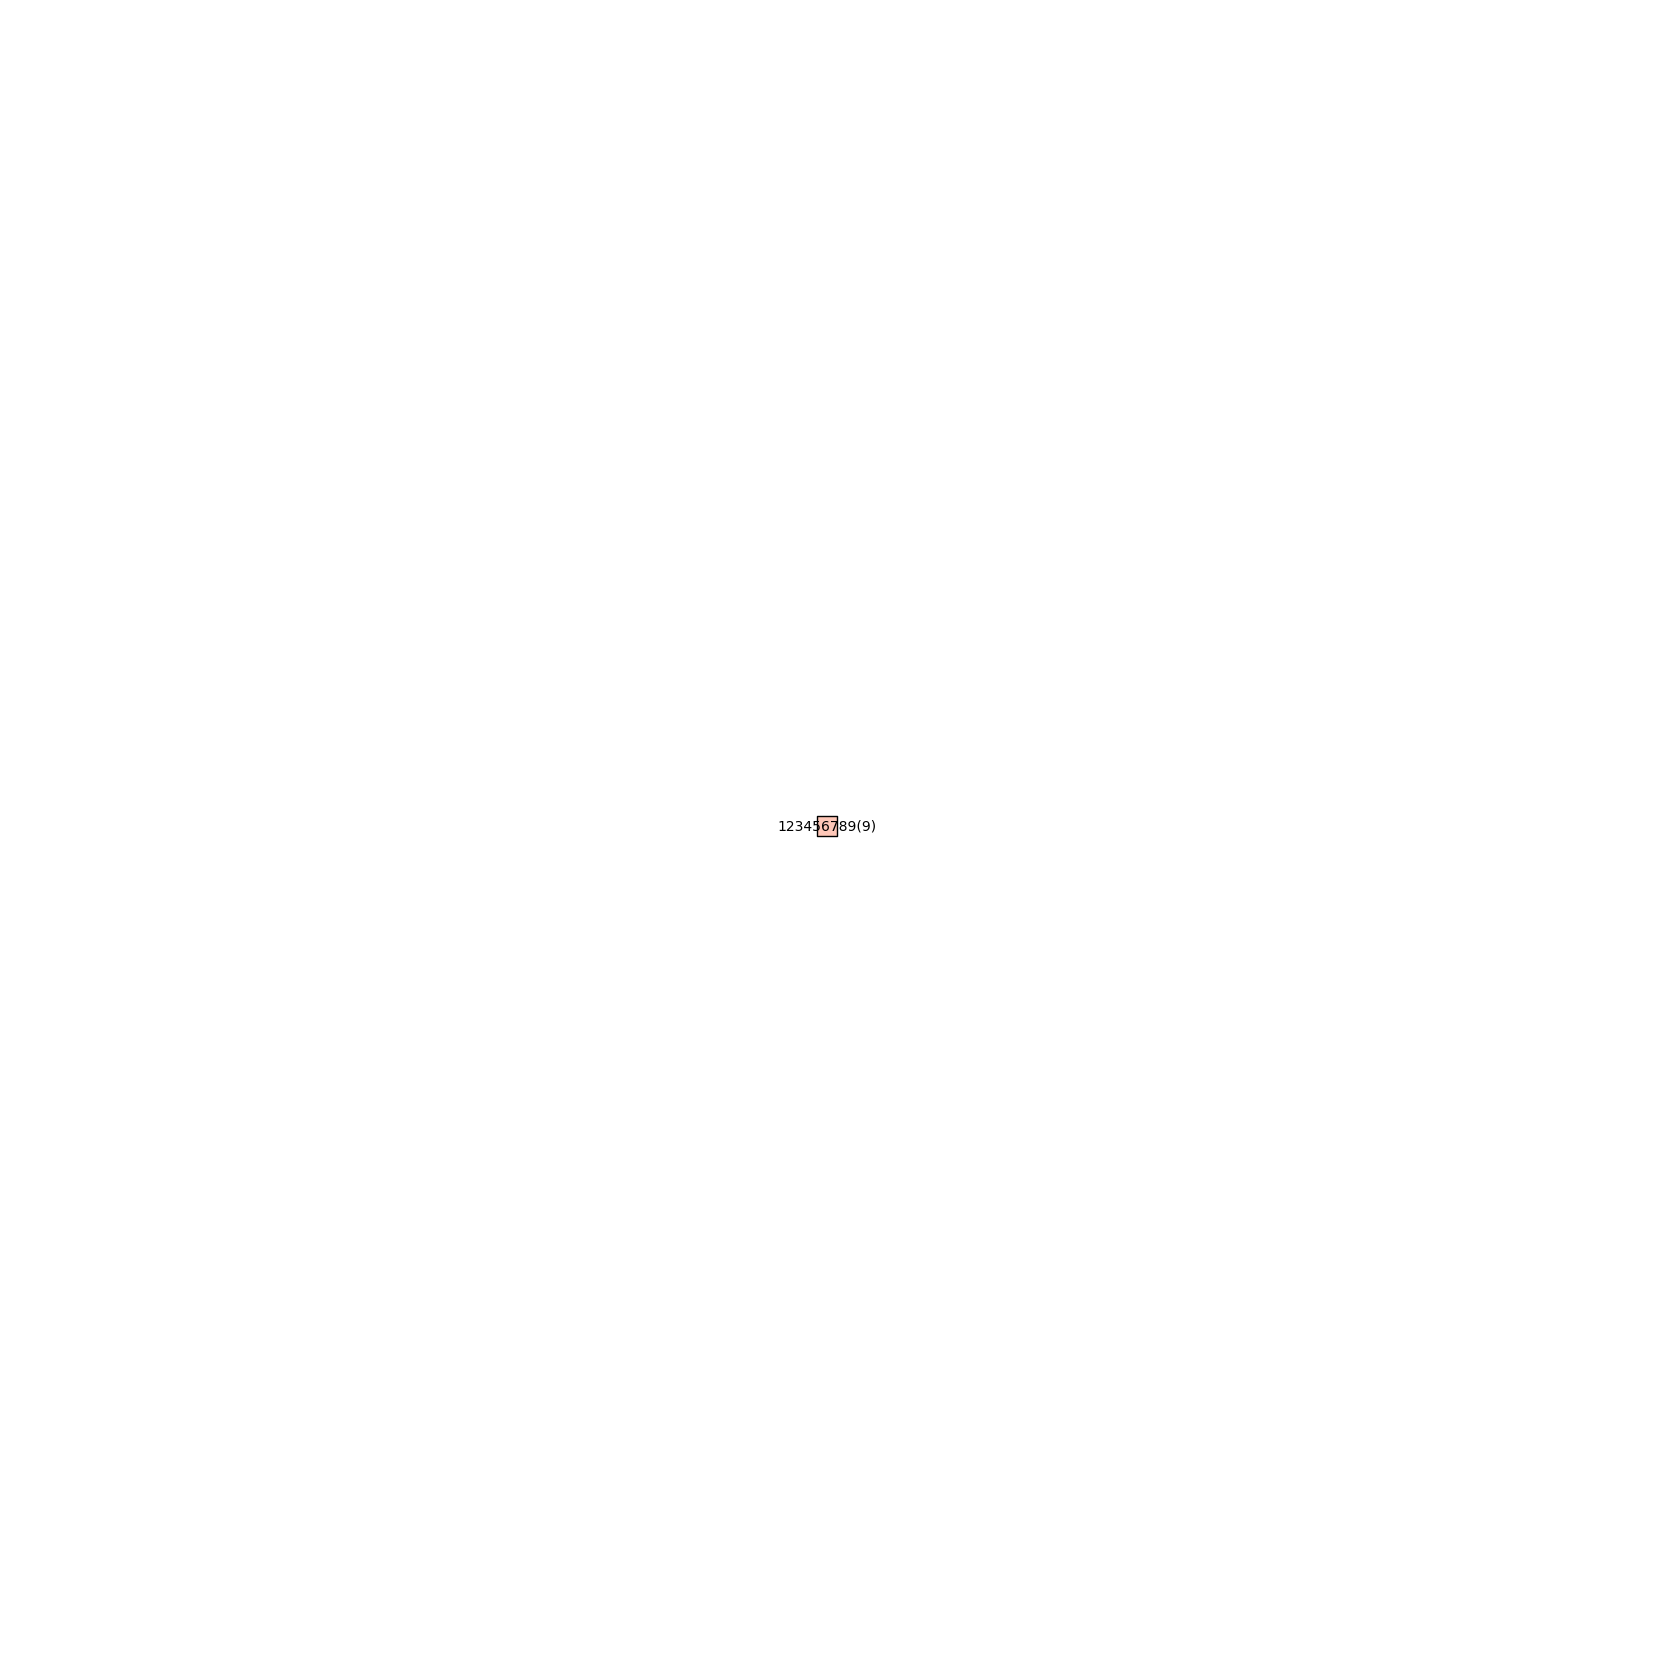

*************************


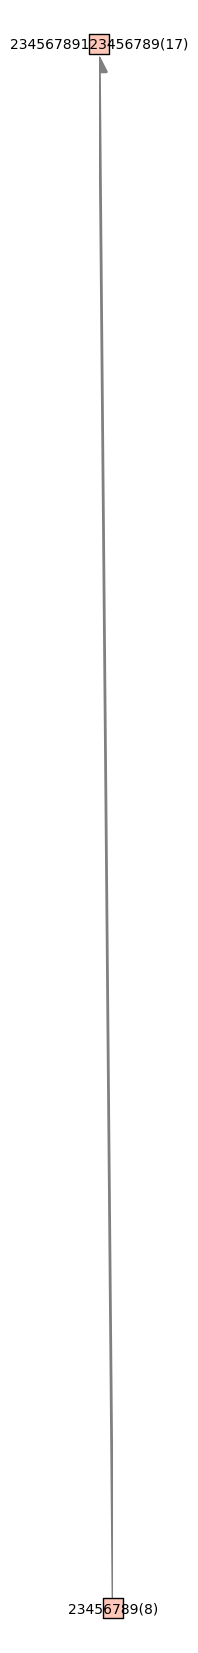

*************************


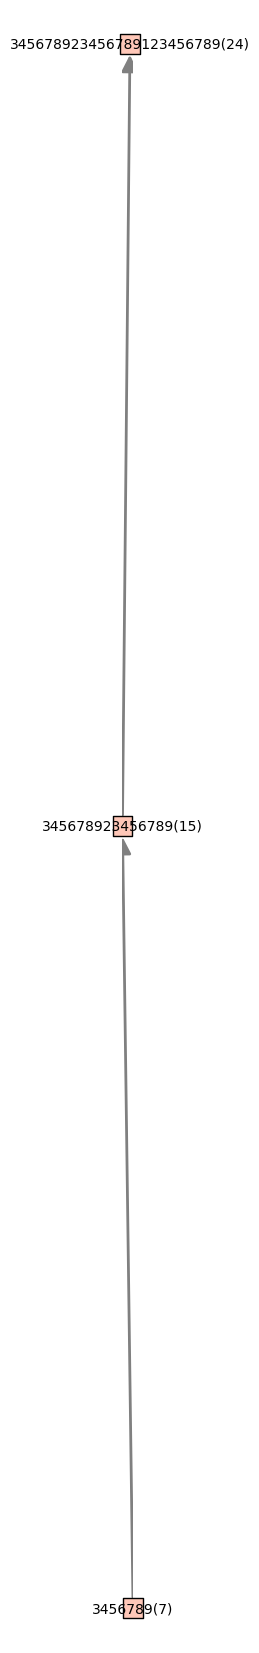

*************************


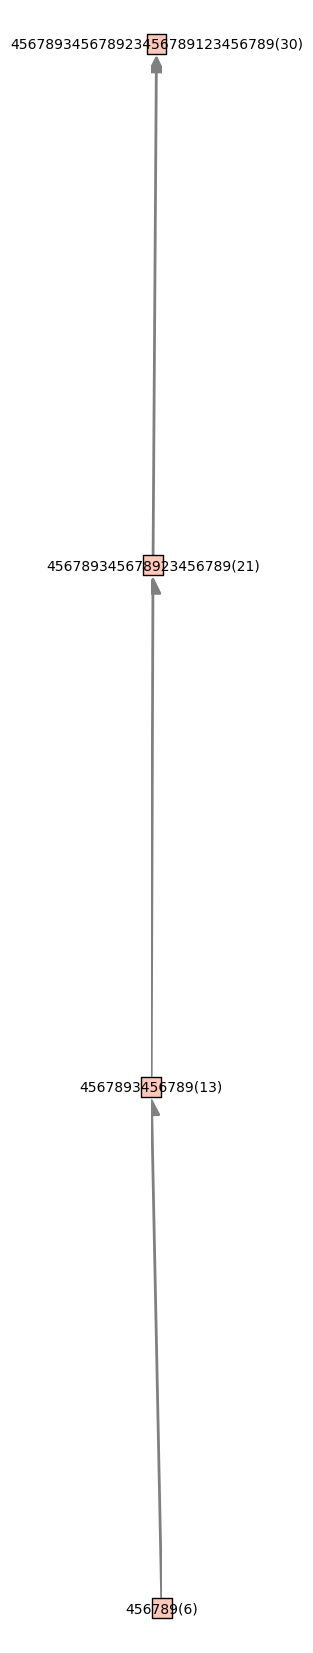

*************************


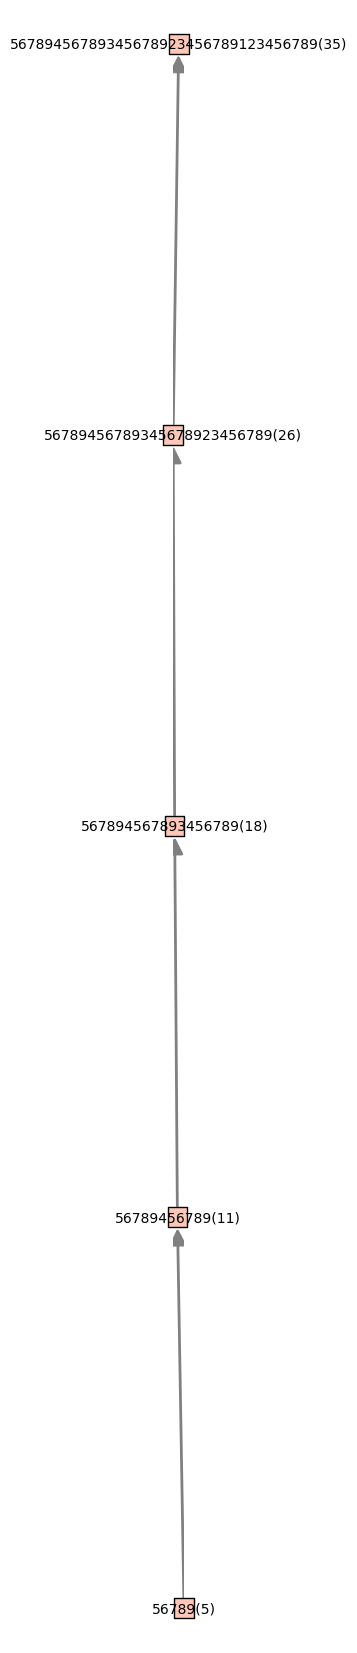

*************************


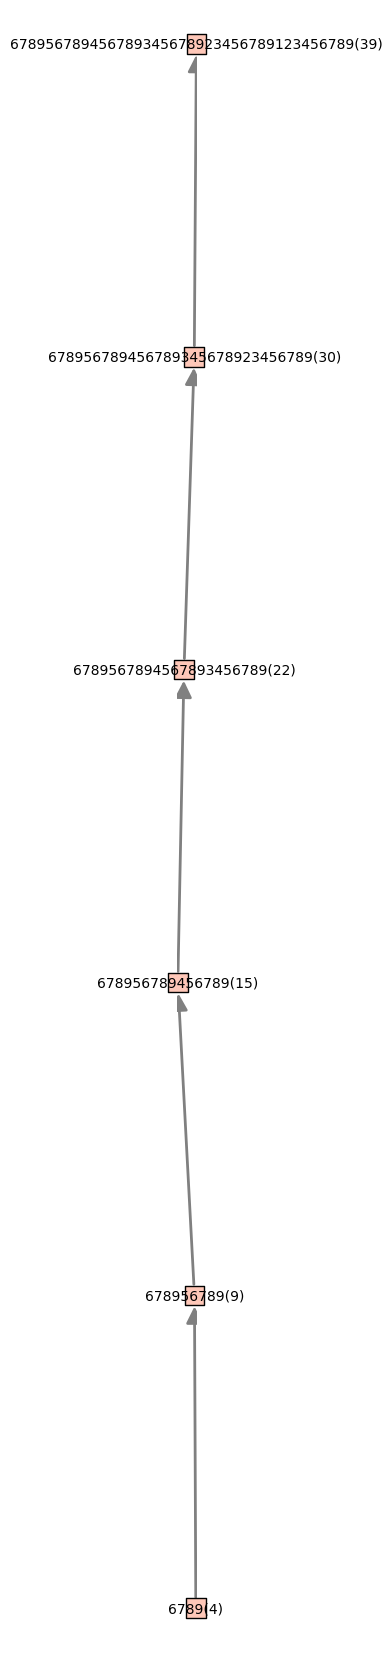

*************************


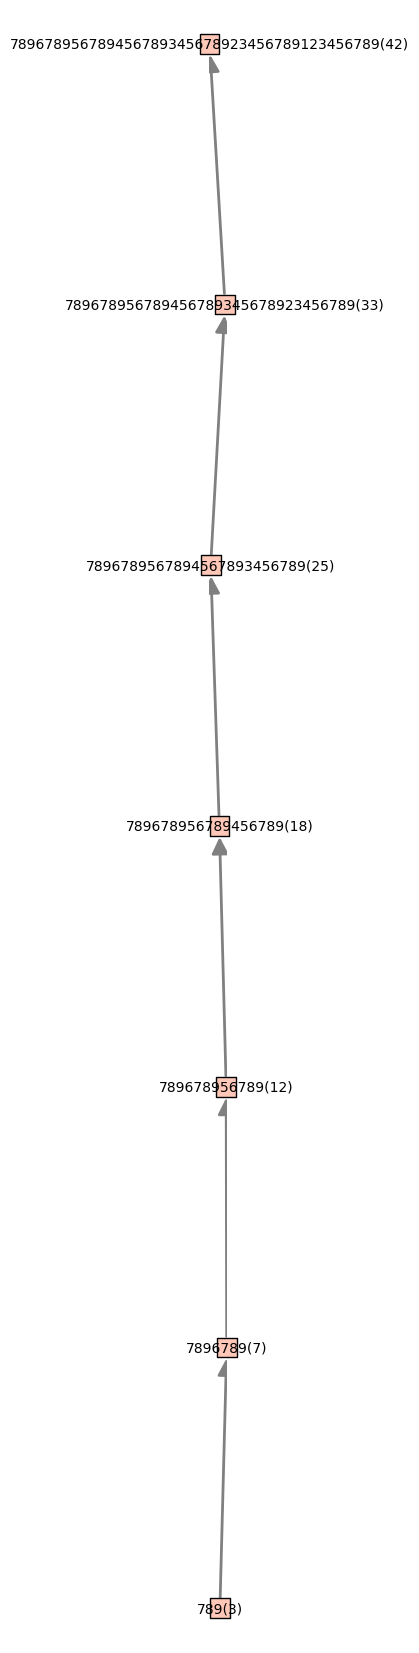

*************************


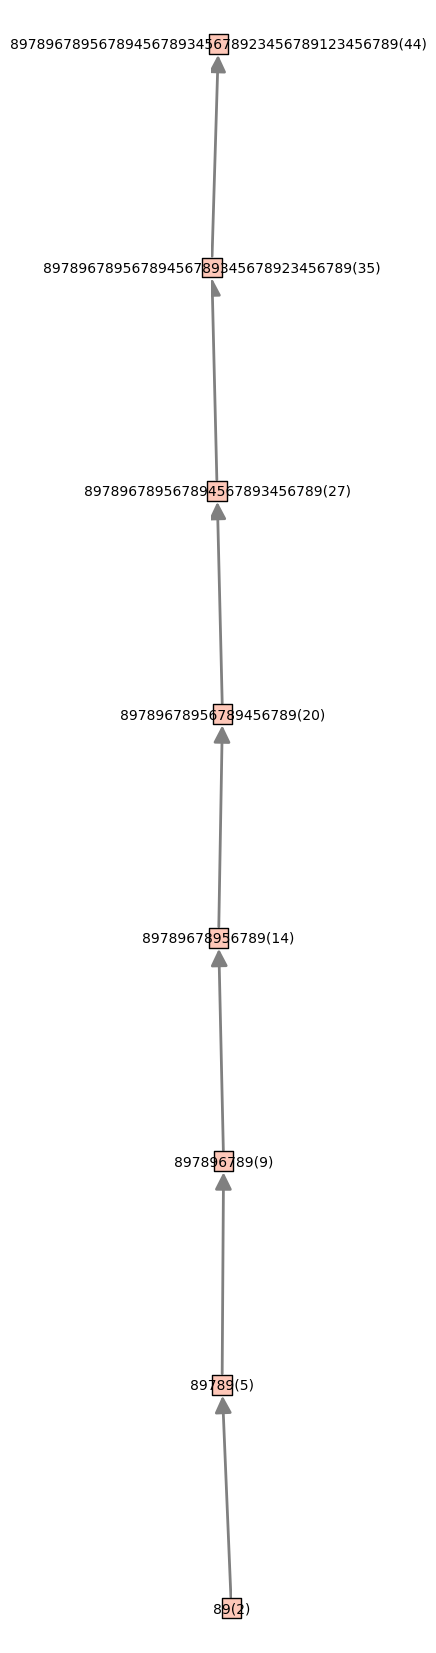

*************************


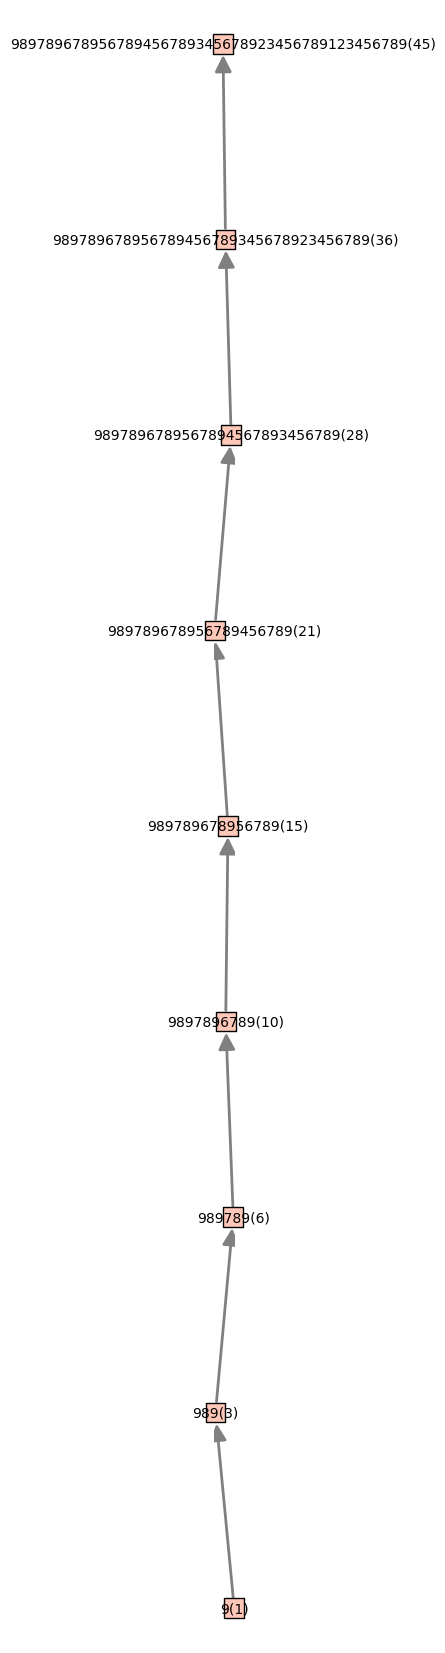

*************************


In [41]:

badpairs = []
B = bigrassmannians
#for i in range(1,n+1):
#    for j in range(1,n+1):
#        B_ij = [x for x in bigrassmannians if DL(x)=={W.simple_reflections()[i]} and DR(x)=={W.simple_reflections()[j]}]
        
#        for x in B_ij:
#            for y in B_ij:
#                inter = W.bruhat_interval(x,y)
#                if len([z for z in inter if z in B_ij])==2:
                    
#                    exists = 0
                    
#                    for w in W:
#                        if ( W.simple_reflections()[i]  not in DL(w) or W.simple_reflections()[j] not in DR(w)) and x.bruhat_le(w) and w.bruhat_le(y):
#                            exists = 1
#                            break
                    

#                    if exists == 0:
#                        badpairs.append((convert_to_123(x)+"(%d)"%x.length(),convert_to_123(y)+"(%d)"%y.length()))
#                        print("%s-%s"%(convert_to_123(x),convert_to_123(y)))
             
            
default_vertex_color = "#fec7b8"
for i in range(1,n+1):
    for j in range(1,n+1):
        bigrassmannians_fixed = [x for x in bigrassmannians if DR(x)=={W.simple_reflections()[i]} and DL(x)=={W.simple_reflections()[j]}]
        if bigrassmannians_fixed != []:
            P = W_subposet(bigrassmannians_fixed)
            if True: #not P.is_chain():
                Q = P.relabel(lambda x: convert_to_123(x)+"(%d)"%x.length())
                colors =  { "yellow" : [ Q(convert_to_123(x)+"(%d)"%x.length()) for x in bigrassmannians_fixed if x not in join_irreducibles]}
                
                cov_lb = []
                for cov in Q.cover_relations():
                    a,b = cov
                    if (str(a),str(b)) in badpairs:
                        cov_lb.append(cov+["N"])
                    else:
                        cov_lb.append(cov+[""])
                
                cov_red = []
                cov_gray = []
                for cov in Q.cover_relations():
                    a,b = cov
                    if (str(a),str(b)) in badpairs or (str(b),str(a)) in badpairs:
                        cov_red.append(cov)
                    else:
                        cov_gray.append(cov)
                
                grap = Q.plot(figsize = 25,cover_color="gray",element_shape = "s", cover_labels = cov_lb,
                              cover_colors = {"red" : cov_red, "gray" : cov_gray}, element_colors = colors )
                show(grap)
                
                if not os.path.isdir("posets"):  
                    os.mkdir("posets") 
                path = "posets/" + CartanType(W)[0]+str(CartanType(W)[1])
                if not os.path.isdir(path): 
                    os.mkdir(path)   
                    
                grap.save(path+'/B_%d%d.png'%(i,j))      
                print("*************************") 

